## Stackoverflow_Survey_Analysis

# Introduction
Stack overflow is a professional community for developers. They conduct developer surveys every year since 2011. The collected data is available open-source on the web. The Dataset would help us to answer real-world questions with the help of proper analysis. The most popular language that developers use can be found through the analysis. We also can find the developer role which pays the highest salary. The aim of our project is to analyze the 2018,2019 and 2020 developer surveys datasets from where we collect valuable insights from them.

In [3409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; 
warnings.simplefilter('ignore')
import pycountry
import plotly.express as px
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
import time
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


## Stackoverflow 2018 Dataset

In [3410]:
df2018 = pd.read_csv(r'Data\survey_results_sample_2018.csv')
df2018.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3411]:
df2018.shape

(99, 129)

In [3412]:
#print(df2018.columns.tolist()      !--> Listing coloumsn in table

In [3413]:
#dropping the columns
#drop_cols = ['Respondent', 'OpenSource', 'Student', 'FormalEducation', 'CompanySize', 'CareerSatisfaction', 'HopeFiveYears', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'CommunicationTools', 'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear', 'IDE', 'NumberMonitors', 'Methodology', 'VersionControl', 'CheckInCode', 'AdBlocker', 'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7', 'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture', 'EthicsChoice', 'EthicsReport', 'EthicsResponsible', 'EthicalImplications', 'StackOverflowRecommend', 'StackOverflowVisit', 'StackOverflowHasAccount', 'StackOverflowParticipate', 'StackOverflowJobs', 'StackOverflowDevStory', 'StackOverflowJobsRecommend', 'StackOverflowConsiderMember', 'HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'ErgonomicDevices', 'Exercise', 'SexualOrientation', 'EducationParents', 'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy']
#df2018.drop(drop_cols, axis=1, inplace=True)

In [3414]:
#df2018.shape #checking rows and col after dropping the table

### Data Filtering - Sorting & Renaming


In [3415]:
col=['Age','ConvertedSalary','Country','Currency','DevType','Employment','RaceEthnicity','Gender','SalaryType','Hobby','JobSatisfaction','JobSearchStatus','OperatingSystem','UndergradMajor','YearsCoding','YearsCodingProf','LanguageDesireNextYear','LanguageWorkedWith','FormalEducation']
df=df2018[col]

In [3416]:
#renaming the colo
# 'ConvertedSalary': 'SalaryUSD'
df.rename(columns={'ConvertedSalary': 'SalaryUSD' }, inplace =True)

In [3417]:
df.sort_index(axis=1).head(2)

,Age,Country,Currency,DevType,Employment,FormalEducation,Gender,Hobby,JobSatisfaction,JobSearchStatus,LanguageDesireNextYear,LanguageWorkedWith,OperatingSystem,RaceEthnicity,SalaryType,SalaryUSD,UndergradMajor,YearsCoding,YearsCodingProf
0,25 - 34 years old,Kenya,NaN,Full-stack developer,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Male,Yes,Extremely satisfied,"I‚Äôm not actively looking, but I am open to n...",JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Linux-based,Black or of African descent,Monthly,NaN,Mathematics or statistics,3-5 years,3-5 years
1,35 - 44 years old,United Kingdom,British pounds sterling (¬£),Database administrator;DevOps specialist;Full-...,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Male,Yes,Moderately dissatisfied,I am actively looking for a job,Go;Python,JavaScript;Python;Bash/Shell,Linux-based,White or of European descent,Yearly,70841.0,"A natural science (ex. biology, chemistry, phy...",30 or more years,18-20 years


In [3418]:
#21 col has been selected rfom 129, compared the shape
df.shape

(99, 19)

In [3419]:
print(df.isnull().sum()) #Finding Null Values

Age                       32
SalaryUSD                 53
Country                    0
Currency                  39
DevType                    1
Employment                 0
RaceEthnicity             38
Gender                    32
SalaryType                50
Hobby                      0
JobSatisfaction           18
JobSearchStatus           16
OperatingSystem           26
UndergradMajor            11
YearsCoding                0
YearsCodingProf           15
LanguageDesireNextYear    29
LanguageWorkedWith        25
FormalEducation            2
dtype: int64


In [3420]:
df.dtypes #data_types

Age                        object
SalaryUSD                 float64
Country                    object
Currency                   object
DevType                    object
Employment                 object
RaceEthnicity              object
Gender                     object
SalaryType                 object
Hobby                      object
JobSatisfaction            object
JobSearchStatus            object
OperatingSystem            object
UndergradMajor             object
YearsCoding                object
YearsCodingProf            object
LanguageDesireNextYear     object
LanguageWorkedWith         object
FormalEducation            object
dtype: object

## Data Validation - Total Cells vs Missing %

In [3421]:
#Find % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1881
Total missing :  387
Missing Percentage:  20.574162679425836 %


## Missing Percentage column-wise

In [3422]:
def missing(df,column,n):
    empty_cells=df[column].isnull().sum()
    return (empty_cells*100.0)/n

In [3423]:
total_cells=df.shape[0]
for column in df.columns:
    res=missing(df,column,total_cells)
    print(column,":","{:.2f}".format(res),"%")

Age : 32.32 %
SalaryUSD : 53.54 %
Country : 0.00 %
Currency : 39.39 %
DevType : 1.01 %
Employment : 0.00 %
RaceEthnicity : 38.38 %
Gender : 32.32 %
SalaryType : 50.51 %
Hobby : 0.00 %
JobSatisfaction : 18.18 %
JobSearchStatus : 16.16 %
OperatingSystem : 26.26 %
UndergradMajor : 11.11 %
YearsCoding : 0.00 %
YearsCodingProf : 15.15 %
LanguageDesireNextYear : 29.29 %
LanguageWorkedWith : 25.25 %
FormalEducation : 2.02 %


## Gender Filtering          
### Data Cleaning Starts

In [3424]:
#Gender: null = 13312 (21.6%)
df['Gender'].unique()
#count number of each gender
df.groupby('Gender')['Gender'].count()

Gender
Female                                                                        5
Female;Male                                                                   1
Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming     1
Male                                                                         59
Male;Non-binary, genderqueer, or gender non-conforming                        1
Name: Gender, dtype: int64

In [3425]:
#replace
df['Gender'] = df['Gender'].fillna('Non-binary, genderqueer, or gender non-conforming')
df['Gender'].replace('Female;Male;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Female', inplace =True)
df['Gender'].replace('Male;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Male;Transgender;Non-binary, genderqueer, or gender non-conforming', 'Male', inplace =True)
df['Gender'].replace('Transgender;Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) ##not sure
df['Gender'].replace('Female;Male', 'Female', inplace =True)
df['Gender'].replace('Female;Male;Transgender', 'Female', inplace =True)
df['Gender'].replace('Female;Transgender', 'Female', inplace =True)
df['Gender'].replace('Male;Transgender', 'Female', inplace =True) 
df['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-conforming', inplace =True) #
df['Gender'].replace('Transgender', 'Male', inplace =True) 

In [3426]:
lst=df.groupby('Gender')['Gender'].count()

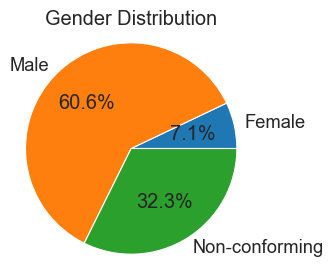

In [3427]:
plt.figure(figsize=(3,3))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Gender Distribution')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [3428]:
df.shape

(99, 19)

In [3429]:
df.isnull().sum()['Gender']

0

## Country

In [3430]:
df.groupby('Country')['Country'].count()

Country
Algeria                1
Argentina              2
Australia              1
Belgium                1
Brazil                 1
Bulgaria               1
Chile                  1
China                  2
Colombia               1
Croatia                1
Denmark                1
Dominican Republic     1
Finland                1
France                 3
Germany                5
Greece                 1
India                 16
Indonesia              2
Ireland                1
Israel                 1
Japan                  1
Kenya                  1
Latvia                 1
Netherlands            1
Nigeria                1
Poland                 3
Romania                1
Russian Federation     4
South Africa           1
Spain                  2
Sweden                 3
Ukraine                1
United Kingdom         7
United States         28
Name: Country, dtype: int64

In [3431]:
df['Country'].isnull().sum()

0

In [3432]:
df['Country'].fillna(method='ffill', inplace=True)

In [3433]:
df['Country'].isnull().sum()

0

In [3434]:
lst=df.groupby('Country')['Country'].count()
lst = lst.sort_values(ascending=False)
lst=lst[:50]

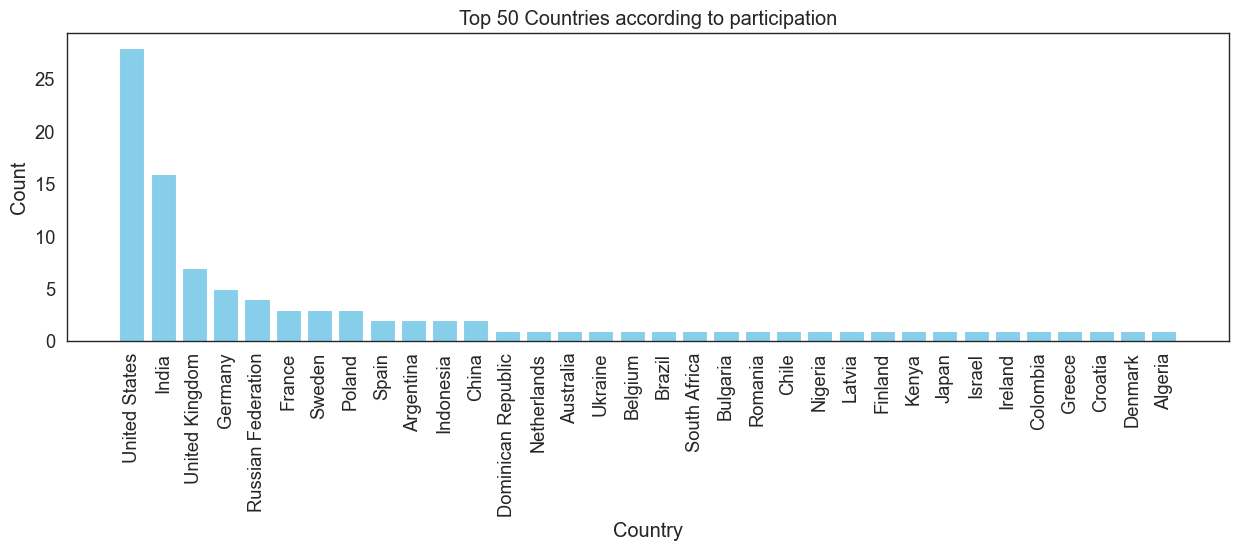

In [3435]:
plt.figure(figsize=(15,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Country')  # Label for x-axis
plt.ylabel('Count')      # Label for y-axis
plt.title('Top 50 Countries according to participation')  # Title of the plot
plt.xticks(rotation=90)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

## Hobby

In [3436]:
df['Hobby'].isnull().sum()

0

In [3437]:
df.groupby('Hobby')['Hobby'].count()

Hobby
No     20
Yes    79
Name: Hobby, dtype: int64

## UndergradMajor

In [3438]:
df['UndergradMajor'].isnull().sum()

11

In [3439]:
df['UndergradMajor'].value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          56
A natural science (ex. biology, chemistry, physics)                       7
Another engineering discipline (ex. civil, electrical, mechanical)        7
A business discipline (ex. accounting, finance, marketing)                5
Fine arts or performing arts (ex. graphic design, music, studio art)      4
Information systems, information technology, or system administration     3
Mathematics or statistics                                                 2
Web development or web design                                             2
A social science (ex. anthropology, psychology, political science)        1
A humanities discipline (ex. literature, history, philosophy)             1
Name: count, dtype: int64

In [3440]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'), 
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'), 
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)') 
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'), 
                        (df['UndergradMajor'] == 'Web development or web design'), 
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'), 
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]
    
    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

df = refactor_major(df)
df['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [3441]:
lst=df['UndergradMajor'].value_counts()

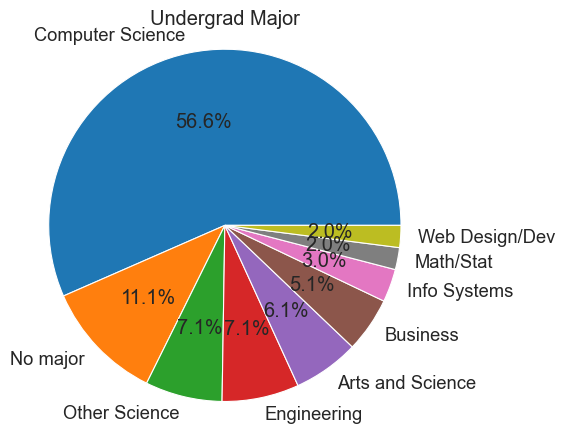

In [3442]:
plt.figure(figsize=(5,5))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Undergrad Major')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [3443]:
df['UndergradMajor'].isnull().sum()

0

In [3444]:
df.dropna(subset=['UndergradMajor'], inplace=True)

In [3445]:
df['UndergradMajor'].isnull().sum()

0

## Job Status

In [3446]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
I‚Äôm not actively looking, but I am open to new opportunities    54
I am not interested in new job opportunities                      18
I am actively looking for a job                                   11
Name: count, dtype: int64

In [3447]:
df.dropna(subset=['JobSearchStatus'], inplace=True)

In [3448]:
# refactoring JobStatus
# changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''
    
    conditions_job = [(df['JobSearchStatus'] == 'I am actively looking for a job'),
                    (df['JobSearchStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobSearchStatus'] == 'I’m not actively looking, but I am open to new opportunities')]
    
    choices_job = ['Seeking', 'Not seeking']
    
    df['JobSearchStatus'] = np.select(conditions_job, choices_job, default=np.nan)
                       
    return df

df = refactor_job(df)

In [3449]:
df['JobSearchStatus'].value_counts()

JobSearchStatus
nan            54
Not seeking    18
Seeking        11
Name: count, dtype: int64

In [3450]:
df['JobSearchStatus'].isnull().sum()

0

## Employment

In [3451]:
df['Employment'].value_counts()

Employment
Employed full-time    77
Employed part-time     6
Name: count, dtype: int64

In [3452]:
df['Employment'].isnull().sum()

0

In [3453]:
df['Employment'].fillna(method='ffill', inplace=True)

In [3454]:
#im not considering the retired person here
#Refactoring the employment
def refactor_emp(df):
    
    conditions_emp = [(df['Employment'] == 'Employed full-time'),
                    (df['Employment'] == 'Independent contractor, freelancer, or self-employed'),
                    (df['Employment'] == 'Not employed, but looking for work'),
                    (df['Employment'] == 'Employed part-time')]
    
    choices_emp = ['Full-time', 'Self-employed', 'Not employed', 'Part-time']
    
    df['Employment'] = np.select(conditions_emp, choices_emp, default=np.nan)
                       
    return df

df = refactor_emp(df)

In [3455]:
lst=df['Employment'].value_counts()

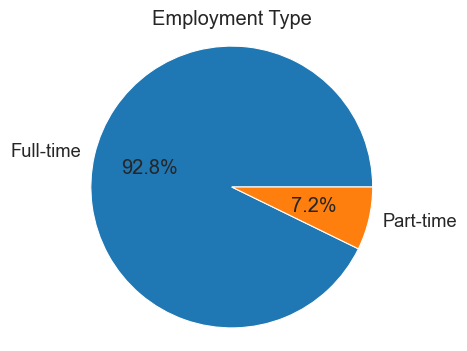

In [3456]:
plt.figure(figsize=(4,4))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Employment Type')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

In [3457]:
df['Employment'].isnull().sum()

0

## JobSatisfaction

In [3458]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
Moderately satisfied                  26
Slightly satisfied                    17
Neither satisfied nor dissatisfied    11
Extremely satisfied                    9
Slightly dissatisfied                  9
Moderately dissatisfied                6
Extremely dissatisfied                 2
Name: count, dtype: int64

In [3459]:
df['JobSatisfaction'].isnull().sum()

3

In [3460]:
df['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [3461]:
df['JobSatisfaction'].isnull().sum()

0

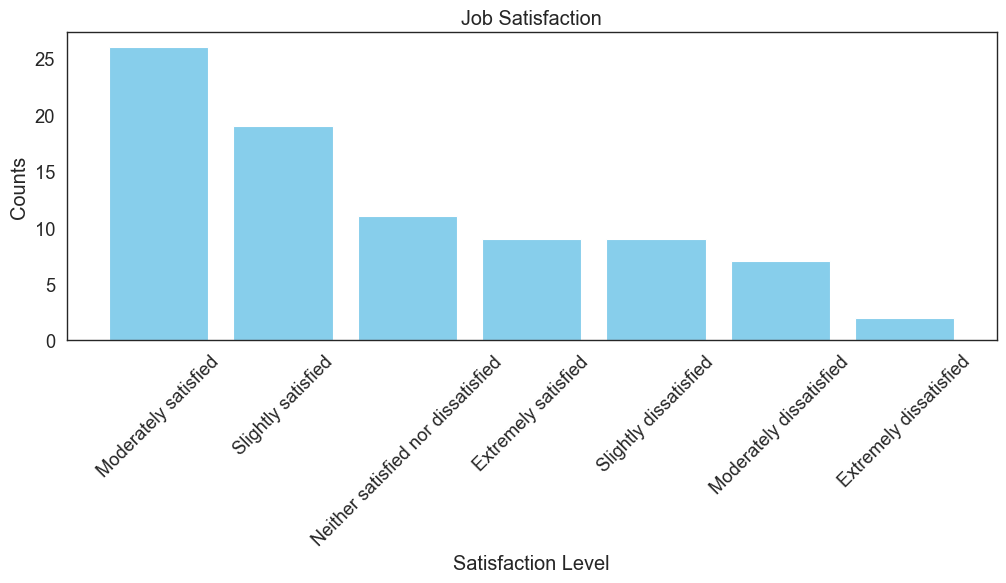

In [3462]:
lst=df['JobSatisfaction'].value_counts()
plt.figure(figsize=(12,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Satisfaction Level')  # Label for x-axis
plt.ylabel('Counts')      # Label for y-axis
plt.title('Job Satisfaction')  # Title of the plot
plt.xticks(rotation=45)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

## Ethnicity

In [3463]:
df['RaceEthnicity'].isnull().sum()

25

In [3464]:
#count number of each Ethnicity
df.groupby('RaceEthnicity')['RaceEthnicity'].count()

RaceEthnicity
Black or of African descent                                                                                                                                                              3
Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent     1
Black or of African descent;Hispanic or Latino/Latina                                                                                                                                    1
East Asian                                                                                                                                                                               2
Hispanic or Latino/Latina                                                                                                                                                                1
Hispanic or Latino/Latina;White or of European desc

In [3465]:
#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df.loc[df['RaceEthnicity'].str.match('Biracial') == True, 'RaceEthnicity'] = 'Biracial'
df.loc[df['RaceEthnicity'].str.match('Black or of African descent') == True, 'RaceEthnicity'] = 'Black or African descent'
df.loc[df['RaceEthnicity'].str.match('East Asian') == True, 'RaceEthnicity'] = 'East Asian'
df.loc[df['RaceEthnicity'].str.match('Hispanic or Latino') == True, 'RaceEthnicity'] = 'Hispanic or Latino'
df.loc[df['RaceEthnicity'].str.match('Indigenous') == True, 'RaceEthnicity'] = 'Indigenous'
df.loc[df['RaceEthnicity'].str.match('Middle Eastern') == True, 'RaceEthnicity'] = 'Middle Eastern'
df.loc[df['RaceEthnicity'].str.match('South') == True, 'RaceEthnicity'] = 'South Asian'
df.loc[df['RaceEthnicity'].str.match('White or of European descent') == True, 'RaceEthnicity'] = 'White or European descent'
df.loc[df['RaceEthnicity'].str.match('Multiracial') == True, 'RaceEthnicity'] = 'Multiracial'
df.loc[df['RaceEthnicity'].str.match('Native American') == True, 'RaceEthnicity'] = 'Native American'

In [3466]:
df.groupby('RaceEthnicity')['RaceEthnicity'].count() #11 groups of Ethnicity after combining

RaceEthnicity
Black or African descent      5
East Asian                    2
Hispanic or Latino            2
South Asian                   8
White or European descent    41
Name: RaceEthnicity, dtype: int64

In [3467]:
df['RaceEthnicity'].isnull().sum()

25

In [3468]:
df['RaceEthnicity']=df.groupby(['Country'])['RaceEthnicity'].bfill().ffill()

In [3469]:
df['RaceEthnicity'].isnull().sum()

0

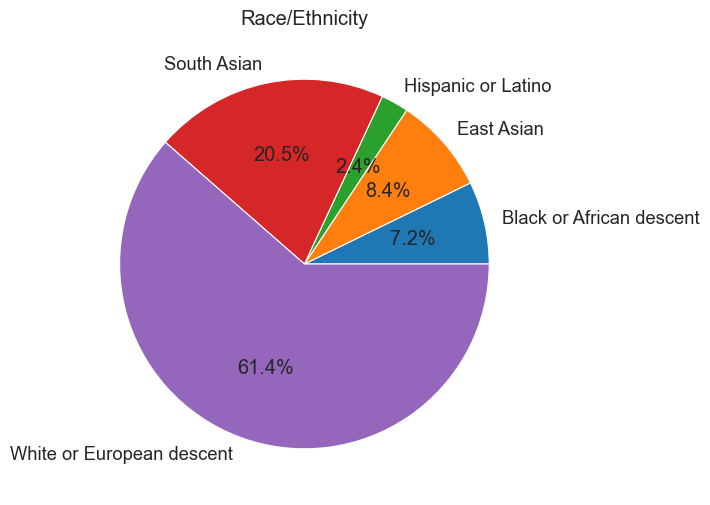

In [3470]:
lst=df.groupby('RaceEthnicity')['RaceEthnicity'].count()
plt.figure(figsize=(6,6))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Race/Ethnicity')  # Add a title
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

## Developer Roles

In [3471]:
df['DevType'].isnull().sum()

0

In [3472]:
df['DevType'].fillna(method='ffill', inplace=True)

In [3473]:
df.groupby('DevType')['DevType'].count()

DevType
Back-end developer                                                                                                                                                                       2
Back-end developer;C-suite executive (CEO, CTO, etc.);Data or business analyst;Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator    1
Back-end developer;C-suite executive (CEO, CTO, etc.);Database administrator;Designer;Front-end developer;Full-stack developer;Mobile developer                                          1
Back-end developer;C-suite executive (CEO, CTO, etc.);Database administrator;DevOps specialist;Engineering manager;Full-stack developer;System administrator                             1
Back-end developer;Data or business analyst;Database administrator;DevOps specialist;Front-end developer;Full-stack developer;System administrator                                       1
Back-end developer;Data or business analyst;Designer;Fron

In [3474]:
#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df.loc[df['DevType'].str.match('Back-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Student') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('QA or test developer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Product manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Mobile developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Marketing or sales professional') == True, 'DevType'] = 'Non developer'

df.loc[df['DevType'].str.match('System administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Game or graphics developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Full-stack developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Front-end developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Engineering manager') == True, 'DevType'] = 'Manager'
df.loc[df['DevType'].str.match('Embedded applications or devices developer') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Educator or academic researcher') == True, 'DevType'] = 'Student'
df.loc[df['DevType'].str.match('DevOps specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Desktop or enterprise applications developer') == True, 'DevType'] = 'Developer'

df.loc[df['DevType'].str.match('Designer') == True, 'DevType'] = 'Non developer'
df.loc[df['DevType'].str.match('Database administrator') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data scientist or machine learning specialist') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('Data or business analyst') == True, 'DevType'] = 'Developer'
df.loc[df['DevType'].str.match('C-suite executive') == True, 'DevType'] = 'Developer'


In [3475]:
df.groupby('DevType')['DevType'].count() #11 groups of Ethnicity after combining

DevType
Developer        74
Manager           2
Non developer     5
Student           2
Name: DevType, dtype: int64

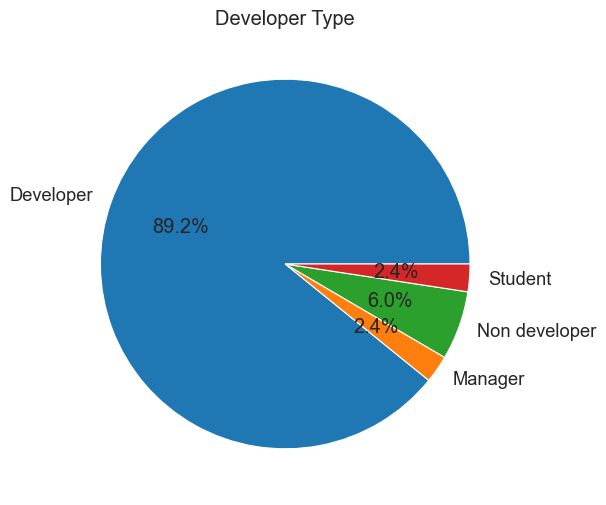

In [3476]:
lst=df.groupby('DevType')['DevType'].count()
plt.figure(figsize=(6,6))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Developer Type')  # Add a title
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

## Language to worked with

In [3477]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS    2
JavaScript;PHP;HTML;CSS                        2
C;F#;Haskell;Python;Scala                      1
Name: count, dtype: int64

In [3478]:
df['LanguageWorkedWith'].isnull().sum()

14

In [3479]:
df['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [3480]:
df['LanguageWorkedWith'].isnull().sum()

0

In [3481]:
df['LanguageWorkedWith'].value_counts().nlargest(3)

LanguageWorkedWith
Java;JavaScript;PHP;VB.NET;HTML;CSS                3
Assembly;C;C++;Java;Python;Delphi/Object Pascal    2
Java;JavaScript;PHP;SQL;TypeScript;HTML;CSS        2
Name: count, dtype: int64

## LanguageDesireNextYear

In [3482]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
C#;JavaScript;PHP;SQL;HTML;CSS    2
JavaScript;Python;HTML;CSS        1
C#;JavaScript;TypeScript          1
Name: count, dtype: int64

In [3483]:
df['LanguageDesireNextYear'].isnull().sum()

18

In [3484]:
df['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [3485]:
df['LanguageDesireNextYear'].isnull().sum()

0

In [3486]:
df['LanguageDesireNextYear'].value_counts().nlargest(3)

LanguageDesireNextYear
Java;Python                                    4
JavaScript;PHP;SQL;Swift;CSS;Bash/Shell        2
C#;Java;JavaScript;Ruby;TypeScript;HTML;CSS    2
Name: count, dtype: int64

## Years of coding (Exp)

In [3487]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years      26
0-2 years      20
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     2
24-26 years     2
15-17 years     1
Name: count, dtype: int64

In [3488]:
df['YearsCodingProf'].isnull().sum()

2

In [3489]:
df['YearsCodingProf'].fillna(method='ffill', inplace=True)

In [3490]:
df['YearsCodingProf'].isnull().sum()

0

In [3491]:
df['YearsCodingProf'].value_counts().nlargest(10)

YearsCodingProf
3-5 years      27
0-2 years      21
6-8 years      12
9-11 years      9
12-14 years     6
18-20 years     3
21-23 years     2
24-26 years     2
15-17 years     1
Name: count, dtype: int64

## Years of coding (Non Exp)

In [3492]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
6-8 years           17
3-5 years           15
9-11 years          15
0-2 years           11
15-17 years          7
12-14 years          6
24-26 years          5
18-20 years          4
30 or more years     3
Name: count, dtype: int64

In [3493]:
df['YearsCoding'].isnull().sum()

0

In [3494]:
df['YearsCoding'].fillna(method='ffill', inplace=True)

In [3495]:
df['YearsCoding'].isnull().sum()

0

In [3496]:
df['YearsCoding'].value_counts().nlargest(10)

YearsCoding
6-8 years           17
3-5 years           15
9-11 years          15
0-2 years           11
15-17 years          7
12-14 years          6
24-26 years          5
18-20 years          4
30 or more years     3
Name: count, dtype: int64

## Operating System

In [3497]:
df['OperatingSystem'].value_counts().nlargest(10)

OperatingSystem
Windows        32
MacOS          20
Linux-based    15
BSD/Unix        1
Name: count, dtype: int64

In [3498]:
df['OperatingSystem'].isnull().sum()

15

In [3499]:
df['OperatingSystem'].fillna(method='ffill', inplace=True)

In [3500]:
df['OperatingSystem'].isnull().sum()

0

In [3501]:
lst=df['OperatingSystem'].value_counts().nlargest(10)

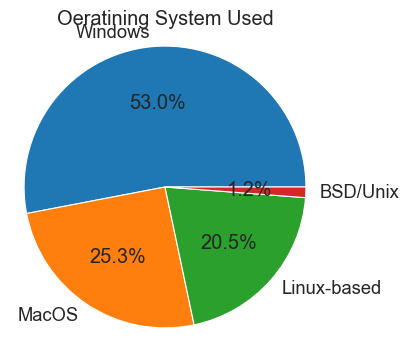

In [3502]:
plt.figure(figsize=(4,4))
plt.pie(list(lst.values), labels=list(lst.keys()), autopct='%1.1f%%')  # Plot the pie chart
plt.title('Oeratining System Used')  # Add a title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()

## Salary Type

In [3503]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    25
Yearly     22
Weekly      1
Name: count, dtype: int64

In [3504]:
df['SalaryType'].isnull().sum()

35

In [3505]:
df['SalaryType'].fillna(method='ffill', inplace=True)

In [3506]:
df['SalaryType'].isnull().sum()

0

In [3507]:
df['SalaryType'].value_counts().nlargest(10)

SalaryType
Monthly    42
Yearly     39
Weekly      2
Name: count, dtype: int64

## Currency

In [3508]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)                20
Euros (‚Ç¨)                     11
British pounds sterling (¬£)     7
Indian rupees (‚Çπ)              7
Swedish kroner (SEK)             3
Russian rubles (‚ÇΩ)             3
Polish z≈Çoty (z≈Ç)              2
Chinese yuan renminbi (¬•)       2
South African rands (R)          1
Australian dollars (A$)          1
Name: count, dtype: int64

In [3509]:
df['Currency'].isnull().sum()

23

In [3510]:
df['Currency'].fillna(method='ffill', inplace=True)

In [3511]:
df['Currency'].isnull().sum()

1

In [3512]:
df.dropna(subset=['Currency'], inplace = True)

In [3513]:
df['Currency'].value_counts().nlargest(10)

Currency
U.S. dollars ($)                27
Euros (‚Ç¨)                     16
British pounds sterling (¬£)    10
Indian rupees (‚Çπ)              8
Chinese yuan renminbi (¬•)       5
Swedish kroner (SEK)             4
Russian rubles (‚ÇΩ)             4
Polish z≈Çoty (z≈Ç)              2
Brazilian reais (R$)             2
South African rands (R)          1
Name: count, dtype: int64

## Salary

In [3514]:
df['SalaryUSD'].value_counts().nlargest(10)

SalaryUSD
120000.0    3
30000.0     2
115000.0    2
70841.0     1
36000.0     1
90000.0     1
73428.0     1
128507.0    1
13212.0     1
48955.0     1
Name: count, dtype: int64

In [3515]:
df['SalaryUSD'].isnull().sum() 

36

In [3516]:
mean_salary = df.groupby(['DevType','Country'])['SalaryUSD'].mean() 
mean_salary.nlargest(10)

DevType        Country       
Developer      United States     146687.5
               Ireland           128507.0
Non developer  India             123984.0
Developer      Australia          95968.0
               Colombia           64116.0
               Germany            61191.5
               Sweden             60257.5
               China              52604.0
               Greece             51408.0
               United Kingdom     48144.8
Name: SalaryUSD, dtype: float64

In [3517]:
means = df.groupby(['YearsCodingProf','DevType', 'Country'])['SalaryUSD'].transform('mean')
df['SalaryUSD'] = df['SalaryUSD'].fillna(means)

In [3518]:
mean_salary = df.groupby(['YearsCodingProf','DevType','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

YearsCodingProf  DevType        Country       
21-23 years      Developer      United States     250000.000000
0-2 years        Developer      United States     244000.000000
15-17 years      Developer      Ireland           128507.000000
0-2 years        Non developer  India             123984.000000
9-11 years       Developer      United States     115000.000000
12-14 years      Developer      Australia          95968.000000
18-20 years      Developer      United States      95000.000000
6-8 years        Developer      United States      91333.333333
3-5 years        Developer      China              85708.000000
9-11 years       Developer      United Kingdom     82648.000000
Name: SalaryUSD, dtype: float64

In [3519]:
df.dropna(subset=['SalaryUSD'], inplace = True)

## Age

In [3520]:
df['Age'].value_counts().nlargest(10)

Age
25 - 34 years old    22
35 - 44 years old    13
18 - 24 years old    13
45 - 54 years old     1
Name: count, dtype: int64

In [3521]:
df['Age'].isnull().sum()

10

In [3522]:
df['Age'].fillna(method='ffill', inplace=True)

In [3523]:
df['Age'].isnull().sum()

0

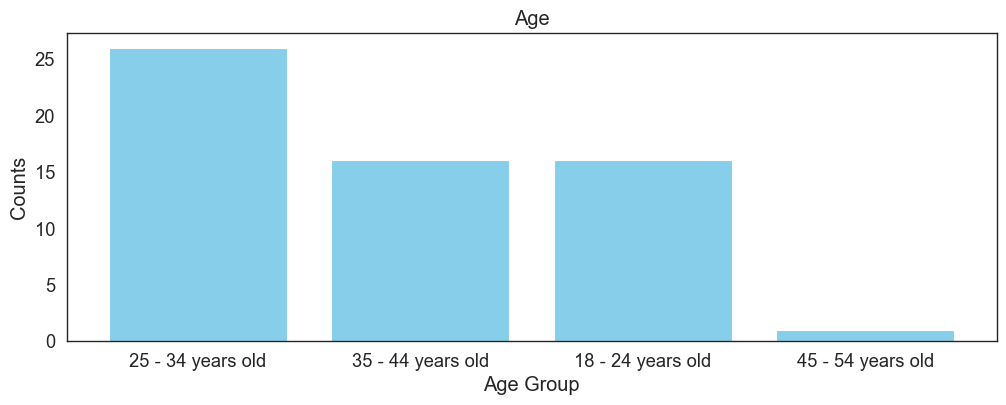

In [3524]:
lst=df['Age'].value_counts().nlargest(10)
plt.figure(figsize=(12,4))
plt.bar(list(lst.keys()), lst.values, color='skyblue')  # Plotting the bars

# Adding labels and title
plt.xlabel('Age Group')  # Label for x-axis
plt.ylabel('Counts')      # Label for y-axis
plt.title('Age')  # Title of the plot
#plt.xticks(rotation=45)  # Rotate labels by 90 degrees

# Display the plot
plt.show()

In [3525]:
print(df.isnull().sum())

Age                       0
SalaryUSD                 0
Country                   0
Currency                  0
DevType                   0
Employment                0
RaceEthnicity             0
Gender                    0
SalaryType                0
Hobby                     0
JobSatisfaction           0
JobSearchStatus           0
OperatingSystem           0
UndergradMajor            0
YearsCoding               0
YearsCodingProf           0
LanguageDesireNextYear    0
LanguageWorkedWith        0
FormalEducation           0
dtype: int64


In [3526]:
df['FormalEducation'].isnull().sum()

0

In [3527]:
df['FormalEducation'].value_counts()

FormalEducation
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)                                            25
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)                                         17
Some college/university study without earning a degree                                12
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3
Associate degree                                                                       2
Name: count, dtype: int64

In [3528]:
#Changing column's name
df.rename(columns={'FormalEducation':'EdLevel'}, inplace =True)
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree'),
                    (df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df = refactor_ed(df)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df['EdLevel'].replace('nan', 'Bachelors', inplace=True)

df['EdLevel'].value_counts()

EdLevel
Bachelors    42
No Degree    15
Associate     2
Name: count, dtype: int64

## Cleaned Dataset : 2018_Survey

In [3529]:
cleaned_2018 = df[df.notnull()]
cleaned_2018.shape

(59, 19)

In [3530]:
cleaned_2018.head(10)

,Age,SalaryUSD,Country,Currency,DevType,Employment,RaceEthnicity,Gender,SalaryType,Hobby,JobSatisfaction,JobSearchStatus,OperatingSystem,UndergradMajor,YearsCoding,YearsCodingProf,LanguageDesireNextYear,LanguageWorkedWith,EdLevel
1,35 - 44 years old,70841.0,United Kingdom,British pounds sterling (¬£),Developer,Full-time,White or European descent,Male,Yearly,Yes,Moderately dissatisfied,Seeking,Linux-based,Other Science,30 or more years,18-20 years,Go;Python,JavaScript;Python;Bash/Shell,Bachelors
4,18 - 24 years old,21426.0,South Africa,South African rands (R),Developer,Full-time,White or European descent,Male,Yearly,Yes,Slightly satisfied,nan,Windows,Computer Science,6-8 years,0-2 years,Assembly;C;C++;Matlab;SQL;Bash/Shell,C;C++;Java;Matlab;R;SQL;Bash/Shell,No Degree
5,18 - 24 years old,41671.0,United Kingdom,British pounds sterling (¬£),Developer,Full-time,White or European descent,Male,Yearly,Yes,Moderately satisfied,Seeking,Linux-based,Computer Science,6-8 years,3-5 years,C#;Go;Java;JavaScript;Python;SQL;TypeScript;HT...,Java;JavaScript;Python;TypeScript;HTML;CSS,Bachelors
6,18 - 24 years old,120000.0,United States,U.S. dollars ($),Developer,Full-time,White or European descent,Male,Yearly,Yes,Slightly satisfied,nan,MacOS,Computer Science,9-11 years,0-2 years,C;Go;JavaScript;Python;HTML;CSS,JavaScript;HTML;CSS,No Degree
8,35 - 44 years old,250000.0,United States,U.S. dollars ($),Developer,Full-time,White or European descent,Male,Yearly,Yes,Moderately satisfied,nan,MacOS,Arts and Science,30 or more years,21-23 years,Erlang;Go;Python;Rust;SQL,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,No Degree
13,35 - 44 years old,8767.0,India,U.S. dollars ($),Developer,Full-time,South Asian,Non-conforming,Yearly,No,Extremely satisfied,nan,Linux-based,Engineering,3-5 years,3-5 years,Java;Python,Java,Bachelors
14,18 - 24 years old,0.0,Netherlands,Euros (‚Ç¨),Developer,Full-time,White or European descent,Male,Monthly,No,Neither satisfied nor dissatisfied,nan,Windows,No major,0-2 years,0-2 years,Java;Python,Java;JavaScript;PHP;VB.NET;HTML;CSS,No Degree
17,35 - 44 years old,47904.0,Sweden,Swedish kroner (SEK),Developer,Full-time,White or European descent,Male,Monthly,Yes,Moderately satisfied,nan,Windows,Business,6-8 years,0-2 years,C#;F#;Haskell;SQL;Ocaml,C#;SQL;HTML;CSS;Bash/Shell,Bachelors
18,35 - 44 years old,8767.0,India,Swedish kroner (SEK),Developer,Full-time,South Asian,Female,Monthly,Yes,Slightly satisfied,nan,Windows,No major,0-2 years,3-5 years,Python;R,C;C++;C#,Bachelors
20,35 - 44 years old,95968.0,Australia,Australian dollars (A$),Developer,Full-time,South Asian,Male,Yearly,Yes,Slightly satisfied,nan,MacOS,Engineering,15-17 years,12-14 years,C;C++;Go;Python;SQL;Swift;Kotlin,C;C++;Go;Python;SQL;Swift,Bachelors


## After Cleaning Dataset 2018

In [3531]:
#Find % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1121
Total missing :  0
Missing Percentage:  0.0 %


## Stackoverflow 2019 Dataset

In [3532]:
na_vals = ['NA', 'Missing']
survey_main_df = pd.read_csv(r"Data\survey_results_sample_2019.csv", na_values=na_vals)
schema_df = pd.read_csv(r"Data\survey_results_sample_2019.csv")

## Data Cleaning

In [3533]:
#Selecting only the required columns for analysis
survey_df_2019 = survey_main_df[['Age', 'CareerSat', 'ConvertedComp', 'Country', 'Dependents', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist', 'ImpSyn', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MainBranch',
 'UndergradMajor', 'YearsCodePro', 'DevType']]

In [3534]:

#changing the name of columns for easier understanding
# 'MainBranch': 'Profession'
# 'ConvertedComp': 'SalaryUSD'
# 'CareerSat': 'JobSatisfaction'
# 'ImpSyn' : 'CompetenceLevel'
# 'JobSat' : 'CurrentJobSatis'
# 'JobSeek' : 'JobStatus'


survey_df_2019.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD',  'CareerSat': 'JobSatisfaction', 'ImpSyn' : 'CompetenceLevel', 'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' }, inplace =True)

In [3535]:
#sorting the columns alphabetically
survey_df_2019.sort_index(axis=1).head(3)

,Age,CompetenceLevel,Country,CurrentJobSatis,Dependents,DevType,EdLevel,Employment,Ethnicity,Gender,Hobbyist,JobSatisfaction,JobStatus,LanguageDesireNextYear,LanguageWorkedWith,Profession,SalaryUSD,UndergradMajor,YearsCodePro
0,14.0,NaN,United Kingdom,NaN,No,NaN,Primary/elementary school,"Not employed, and not looking for work",NaN,Man,Yes,NaN,NaN,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python,I am a student who is learning to code,NaN,NaN,NaN
1,19.0,NaN,Bosnia and Herzegovina,NaN,No,"Developer, desktop or enterprise applications;...","Secondary school (e.g. American high school, G...","Not employed, but looking for work",NaN,Man,No,NaN,I am actively looking for a job,C++;HTML/CSS;JavaScript;SQL,C++;HTML/CSS;Python,I am a student who is learning to code,NaN,NaN,NaN
2,28.0,Average,Thailand,Slightly satisfied,Yes,"Designer;Developer, back-end;Developer, front-...","Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Employed full-time,NaN,Man,Yes,Slightly satisfied,"I‚Äôm not actively looking, but I am open to n...",Elixir;HTML/CSS,HTML/CSS,"I am not primarily a developer, but I write co...",8820.0,Web development or web design,1


In [3536]:
#datatype of survey data
survey_df_2019.dtypes

Age                       float64
JobSatisfaction            object
SalaryUSD                 float64
Country                    object
Dependents                 object
EdLevel                    object
Employment                 object
Ethnicity                  object
Gender                     object
Hobbyist                   object
CompetenceLevel            object
CurrentJobSatis            object
JobStatus                  object
LanguageDesireNextYear     object
LanguageWorkedWith         object
Profession                 object
UndergradMajor             object
YearsCodePro               object
DevType                    object
dtype: object

## Data Validation - Total Cells vs Missing %

In [3537]:
#Find % of missing data
missing_count = survey_df_2019.isnull().sum() #number of missing
total_cells = np.product(survey_df_2019.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1881
Total missing :  201
Missing Percentage:  10.685805422647528 %


## Cleaning and Refactoring column values

### Gender

In [3538]:
survey_df_2019['Gender'].value_counts()

Gender
Man                                                  87
Woman                                                 7
Non-binary, genderqueer, or gender non-conforming     1
Name: count, dtype: int64

In [3539]:
#lets refactor Gender values to Male, female and Non binary
#For the purpose of our data analysis we are considering three gender category. This not to defame any gender.
#refactoring Gender

def refactor_gender(df):
    '''function to change gender category to Male, Female, Non binary'''
    conditions = [(df['Gender'] == 'Man') | (df['Gender'] == 'Man;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Woman') | (df['Gender'] == 'Woman;Non-binary, genderqueer, or gender non-conforming'),
                  (df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming') 
                  | (df['Gender'] == 'Woman;Man') 
                  | (df['Gender'] == 'Woman;Man;Non-binary, genderqueer, or gender non-conforming')]

    values = ['Man', 'Woman', 'Non-binary']

    df['Gender'] = np.select(conditions, values, default = np.NaN)
    
    return df
            
survey_df_2019 = refactor_gender(survey_df_2019)
survey_df_2019['Gender'].replace('nan', 'Non-binary', inplace =True)

In [3540]:
survey_df_2019['Gender'] = survey_df_2019['Gender'].fillna('Non-binary')

In [3541]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
survey_df_2019.isnull().sum()['Gender']

0

In [3542]:
survey_df_2019.groupby('Gender')['Gender'].count()

Gender
Man           87
Non-binary     5
Woman          7
Name: Gender, dtype: int64

## Age

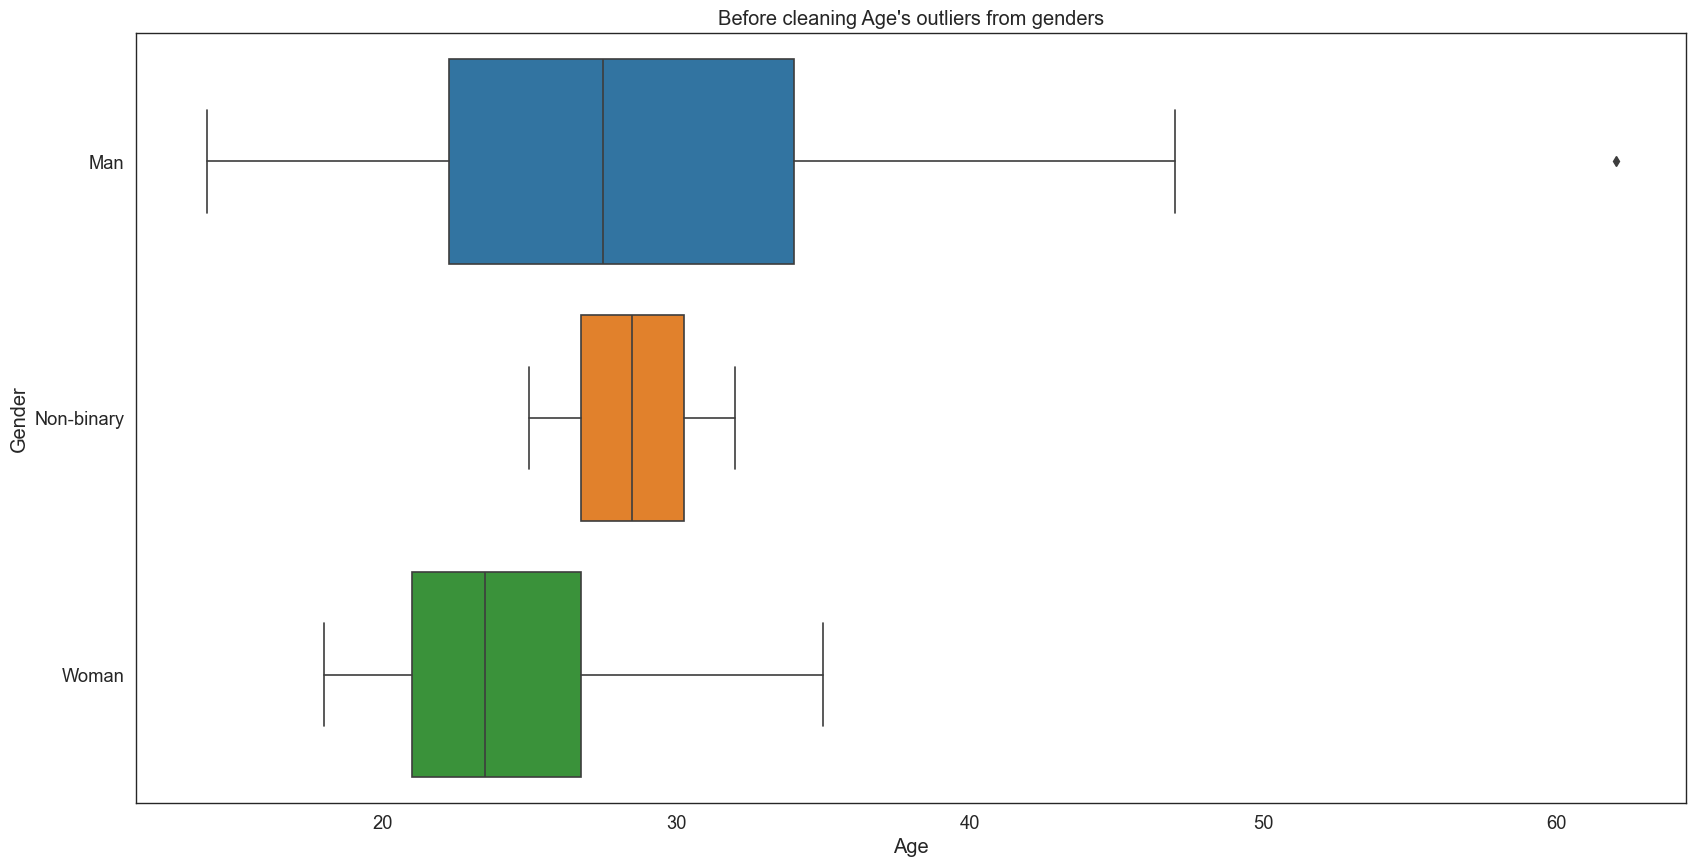

In [3543]:
sns.boxplot(x='Age', y= 'Gender', data=survey_df_2019)
plt.title("Before cleaning Age's outliers from genders")
plt.show()

In [3544]:
#We are considering developes of age 15 to 60
filt = (survey_df_2019['Age'] >= 15) & (survey_df_2019['Age'] <= 60)
survey_df_2019 = survey_df_2019[filt]

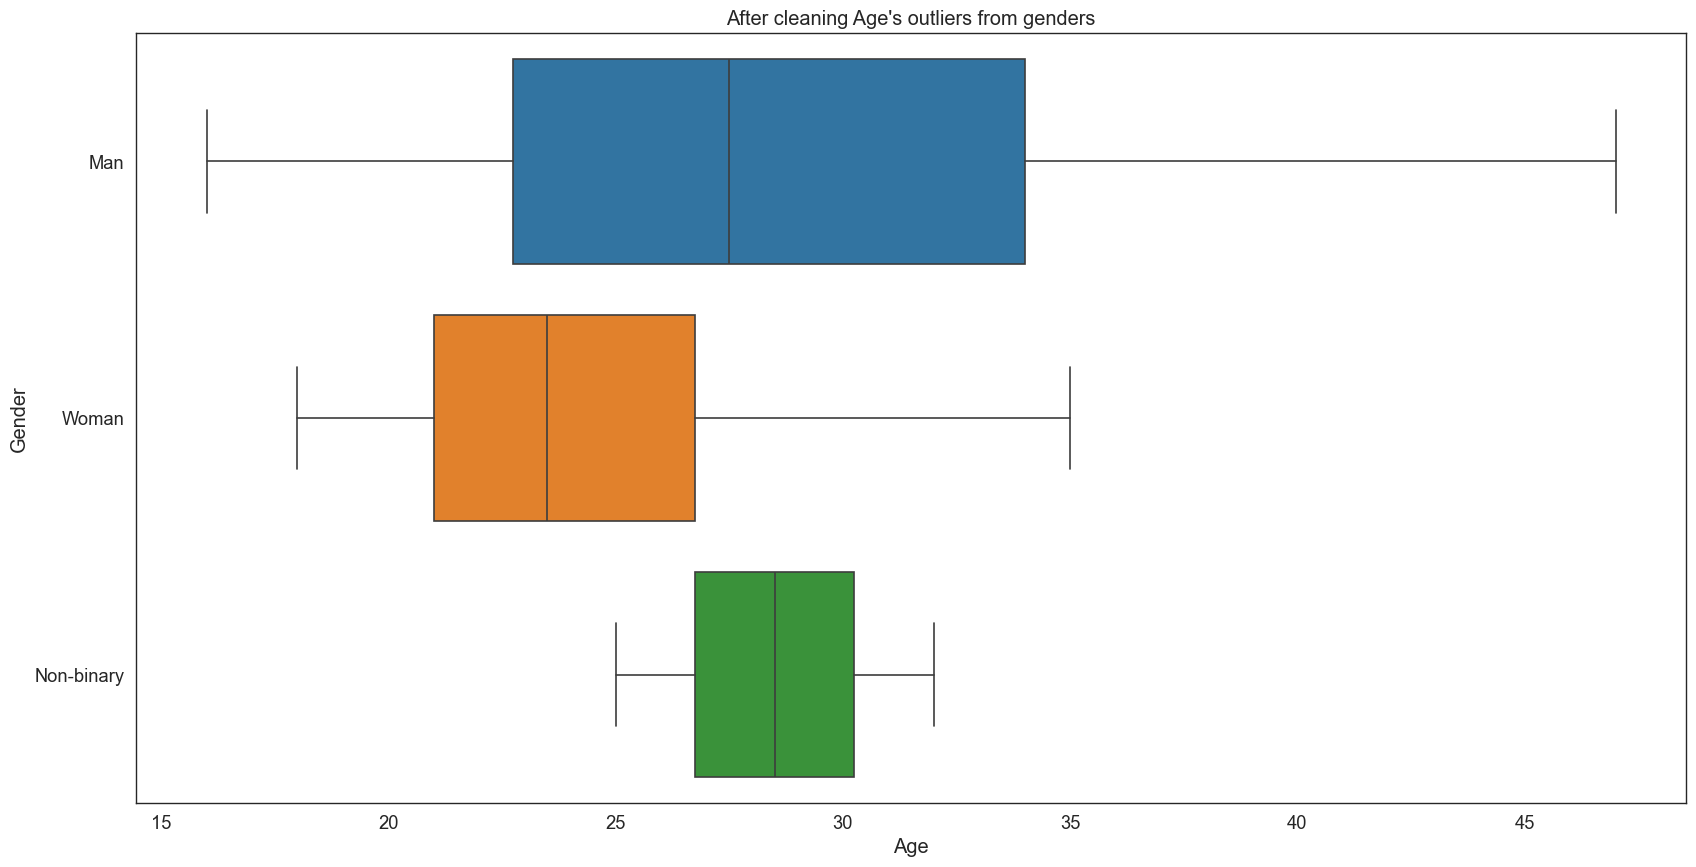

In [3545]:
sns.boxplot(x='Age', y= 'Gender', data=survey_df_2019)
plt.title("After cleaning Age's outliers from genders")
plt.show()

In [3546]:
survey_df_2019['Age'].isnull().sum()

0

## Profession column (Mainbranch)

In [3547]:
survey_df_2019['Profession'].value_counts()

Profession
I am a developer by profession                                                   62
I am not primarily a developer, but I write code sometimes as part of my work    10
I am a student who is learning to code                                            8
I code primarily as a hobby                                                       6
I used to be a developer by profession, but no longer am                          2
Name: count, dtype: int64

In [3548]:
survey_df_2019['Profession'].isnull().sum()

0

In [3549]:
survey_df_2019['Profession'].fillna(method='ffill', inplace=True)

In [3550]:
survey_df_2019['Profession'].value_counts()

Profession
I am a developer by profession                                                   62
I am not primarily a developer, but I write code sometimes as part of my work    10
I am a student who is learning to code                                            8
I code primarily as a hobby                                                       6
I used to be a developer by profession, but no longer am                          2
Name: count, dtype: int64

In [3551]:

#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]
    
    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)
                       
    return df

survey_df_2019 = refactor_prof(survey_df_2019)

In [3552]:
survey_df_2019['Profession'].value_counts()

Profession
Developer        62
Non developer    10
Student           8
Novoice           6
Ex-Developer      2
Name: count, dtype: int64

## EdLevel

In [3553]:
survey_df_2019['EdLevel'].value_counts()

EdLevel
Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)                                            42
Some college/university study without earning a degree                                15
Master‚Äôs degree (MA, MS, M.Eng., MBA, etc.)                                         10
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9
Associate degree                                                                       5
Primary/elementary school                                                              3
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2
Professional degree (JD, MD, etc.)                                                     1
Name: count, dtype: int64

In [3554]:
survey_df_2019['EdLevel'].isnull().sum()

1

In [3555]:
#  Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Bachelor’s degree (BA, BS, B.Eng., etc.)'),
                     (df['EdLevel'] == 'Master’s degree (MA, MS, M.Eng., MBA, etc.)'),
                     (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                     (df['EdLevel'] == 'Associate degree'),
                     (df['EdLevel'] == 'Other doctoral degree (Ph.D, Ed.D., etc.)'),
                     (df['EdLevel'] == 'Some college/university study without earning a degree') 
                     | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                     | (df['EdLevel'] == 'Primary/elementary school')
                     | (df['EdLevel'] == 'I never completed any formal education')]

    choices_ed = ['Bachelors', 'Masters', 'Professional', 'Associate', 'Doctorate', 'No Degree']

    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    
    return df

# applying function to subsets
survey_df_2019 = refactor_ed(survey_df_2019)
survey_df_2019['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [3556]:
survey_df_2019['EdLevel'].value_counts()

EdLevel
Bachelors       53
No Degree       27
Associate        5
Doctorate        2
Professional     1
Name: count, dtype: int64

In [3557]:
survey_df_2019.isnull().sum()['EdLevel']

0

## Undergrad Major

In [3558]:
survey_df_2019['UndergradMajor'].value_counts().nlargest(10)

UndergradMajor
Computer science, computer engineering, or software engineering          36
Information systems, information technology, or system administration    15
Web development or web design                                             5
Mathematics or statistics                                                 4
Another engineering discipline (ex. civil, electrical, mechanical)        4
A business discipline (ex. accounting, finance, marketing)                3
A natural science (ex. biology, chemistry, physics)                       2
A social science (ex. anthropology, psychology, political science)        2
A humanities discipline (ex. literature, history, philosophy)             1
Fine arts or performing arts (ex. graphic design, music, studio art)      1
Name: count, dtype: int64

In [3559]:
survey_df_2019['UndergradMajor'].isnull().sum()

15

In [3560]:
survey_df_2019['UndergradMajor'].fillna(method='ffill', inplace=True)

In [3561]:
survey_df_2019['UndergradMajor'].value_counts().nlargest(15)

UndergradMajor
Computer science, computer engineering, or software engineering          43
Information systems, information technology, or system administration    19
Web development or web design                                             6
Another engineering discipline (ex. civil, electrical, mechanical)        5
Mathematics or statistics                                                 4
A natural science (ex. biology, chemistry, physics)                       3
A business discipline (ex. accounting, finance, marketing)                3
A social science (ex. anthropology, psychology, political science)        2
A humanities discipline (ex. literature, history, philosophy)             1
Fine arts or performing arts (ex. graphic design, music, studio art)      1
Name: count, dtype: int64

In [3562]:
survey_df_2019['UndergradMajor'].isnull().sum()

1

In [3563]:
survey_df_2019.dropna(subset=['UndergradMajor'], inplace=True)

In [3564]:
survey_df_2019['UndergradMajor'].isnull().sum()

0

In [3565]:

# Refactoring UndergradMajor
def refactor_major(df):
    '''function to change undergrad major category to Computer Science, Engineering, Info Systems, Math/Stat, 
        Other Science, Web Design/Dev, Business, Arts and Science'''
    
    
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'),
                        (df['UndergradMajor'] == 'Another engineering discipline (ex. civil, electrical, mechanical)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'),
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'I never declared a major'),
                        (df['UndergradMajor'] == 'A natural science (ex. biology, chemistry, physics)')
                        |(df['UndergradMajor'] == 'A health science (ex. nursing, pharmacy, radiology)'),
                        (df['UndergradMajor'] == 'Web development or web design'),
                        (df['UndergradMajor'] == 'A business discipline (ex. accounting, finance, marketing)'),
                        (df['UndergradMajor'] == 'A humanities discipline (ex. literature, history, philosophy)')
                        | (df['UndergradMajor'] == 'A social science (ex. anthropology, psychology, political science)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (ex. graphic design, music, studio art)')]

    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'No Major', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science']

    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    
    return df

# applying function to subsets
survey_df_2019 = refactor_major(survey_df_2019)

In [3566]:
survey_df_2019['UndergradMajor'].value_counts()

UndergradMajor
Computer Science    43
Info Systems        19
Web Design/Dev       6
Engineering          5
Math/Stat            4
Arts and Science     4
Other Science        3
Business             3
Name: count, dtype: int64

## Job Status

In [3567]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
I‚Äôm not actively looking, but I am open to new opportunities    44
I am not interested in new job opportunities                      23
I am actively looking for a job                                   12
Name: count, dtype: int64

In [3568]:
survey_df_2019['JobStatus'].isnull().sum()

8

In [3569]:
survey_df_2019['JobStatus'].fillna(method='ffill', inplace=True)

In [3570]:
survey_df_2019['JobStatus'].isnull().sum()

0

In [3571]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
I‚Äôm not actively looking, but I am open to new opportunities    50
I am not interested in new job opportunities                      24
I am actively looking for a job                                   13
Name: count, dtype: int64

In [3572]:
survey_df_2019.dropna(subset=['JobStatus'], inplace=True)

In [3573]:

# refactoring JobStatus
# changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''
    
    conditions_job = [(df['JobStatus'] == 'I am actively looking for a job'),
                    (df['JobStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobStatus'] == 'I’m not actively looking, but I am open to new opportunities')]
    
    choices_job = ['Seeking', 'Not seeking']
    
    df['JobStatus'] = np.select(conditions_job, choices_job, default=np.nan)
                       
    return df

survey_df_2019 = refactor_job(survey_df_2019)

In [3574]:
survey_df_2019['JobStatus'].value_counts()

JobStatus
nan            50
Not seeking    24
Seeking        13
Name: count, dtype: int64

## JobSatisfaction

In [3575]:
survey_df_2019['JobSatisfaction'].value_counts()

JobSatisfaction
Very satisfied                        33
Slightly satisfied                    21
Slightly dissatisfied                  8
Neither satisfied nor dissatisfied     6
Very dissatisfied                      4
Name: count, dtype: int64

In [3576]:
survey_df_2019['JobSatisfaction'].isnull().sum()

15

In [3577]:
survey_df_2019['JobSatisfaction'].fillna(method='ffill', inplace=True)

In [3578]:
survey_df_2019['JobSatisfaction'].isnull().sum()

0

In [3579]:
survey_df_2019['JobSatisfaction'].value_counts()

JobSatisfaction
Very satisfied                        41
Slightly satisfied                    26
Slightly dissatisfied                 10
Neither satisfied nor dissatisfied     6
Very dissatisfied                      4
Name: count, dtype: int64

## Employment

In [3580]:
survey_df_2019['Employment'].value_counts()

Employment
Employed full-time                                      64
Independent contractor, freelancer, or self-employed    12
Employed part-time                                       5
Not employed, but looking for work                       4
Not employed, and not looking for work                   1
Name: count, dtype: int64

In [3581]:
survey_df_2019['Employment'].isnull().sum()

1

In [3582]:
survey_df_2019['Employment'].fillna(method='ffill', inplace=True)

In [3583]:
survey_df_2019['Employment'].isnull().sum()

0

In [3584]:
survey_df_2019['Employment'].value_counts()

Employment
Employed full-time                                      65
Independent contractor, freelancer, or self-employed    12
Employed part-time                                       5
Not employed, but looking for work                       4
Not employed, and not looking for work                   1
Name: count, dtype: int64

In [3585]:
#Refactoring the employment
def refactor_emp(df):
    '''function to change Employment category to Full-time, Self-employed, Not employed, Part-time '''
    conditions_emp = [(df['Employment'] == 'Employed full-time'),
                    (df['Employment'] == 'Independent contractor, freelancer, or self-employed'),
                    (df['Employment'] == 'Not employed, but looking for work')
                    | (df['Employment'] == 'Not employed, and not looking for work')
                    | (df['Employment'] == 'Retired'),
                    (df['Employment'] == 'Employed part-time')]
    
    choices_emp = ['Full-time', 'Self-employed', 'Not employed', 'Part-time']
    
    df['Employment'] = np.select(conditions_emp, choices_emp, default=np.nan)
                       
    return df


survey_df_2019 = refactor_emp(survey_df_2019)

In [3586]:
survey_df_2019['Employment'].value_counts()

Employment
Full-time        65
Self-employed    12
Not employed      5
Part-time         5
Name: count, dtype: int64

## Ethnicity

In [3587]:
ethnicity_list = survey_df_2019['Ethnicity'].unique().tolist()

In [3588]:
#here, you can see that we have long list of values. lets refactor them
ethnicity_list

[nan,
 'White or of European descent',
 'White or of European descent;Multiracial',
 'East Asian',
 'Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent;Biracial;Multiracial',
 'Black or of African descent',
 'Hispanic or Latino/Latina;Multiracial',
 'Hispanic or Latino/Latina',
 'Middle Eastern',
 'South Asian',
 'Multiracial',
 'East Asian;South Asian',
 'Biracial']

In [3589]:
len(ethnicity_list)

13

In [3590]:
#refactoring long list of values into categories.
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Biracial', na=False), 'Ethnicity'] = 'Biracial'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Black or of African descent', na=False), 'Ethnicity'] = 'Black or of African descent'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('East Asian', na=False), 'Ethnicity'] = 'East Asian'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Hispanic or Latino', na=False), 'Ethnicity'] = 'Hispanic or Latino'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Indigenous', na=False), 'Ethnicity'] = 'Indigenous'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Middle Eastern', na=False), 'Ethnicity'] = 'Middle Eastern'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('South Asian', na=False), 'Ethnicity'] = 'South Asian'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('White or of European descent', na=False), 'Ethnicity'] = 'White or of European descent'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Multiracial', na=False), 'Ethnicity'] = 'Multiracial'
survey_df_2019.loc[survey_df_2019['Ethnicity'].str.match('Native American', na=False), 'Ethnicity'] = 'Native American'

In [3591]:
survey_df_2019['Ethnicity'].isnull().sum()

15

In [3592]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    45
South Asian                      8
Hispanic or Latino               6
East Asian                       4
Black or of African descent      4
Middle Eastern                   3
Multiracial                      1
Biracial                         1
Name: count, dtype: int64

In [3593]:
survey_df_2019['Ethnicity']=survey_df_2019.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [3594]:
survey_df_2019['Ethnicity'].isnull().sum()

1

In [3595]:
survey_df_2019['Ethnicity'].value_counts()

Ethnicity
White or of European descent    52
South Asian                     14
Hispanic or Latino               6
East Asian                       5
Black or of African descent      4
Middle Eastern                   3
Multiracial                      1
Biracial                         1
Name: count, dtype: int64

## Dependents

In [3596]:
survey_df_2019["Dependents"].value_counts()

Dependents
No     55
Yes    27
Name: count, dtype: int64

In [3597]:
survey_df_2019["Dependents"].isnull().sum()

5

In [3598]:
#Lets consider that people who didnt respond has no dependents for the purpose of analysis
survey_df_2019["Dependents"].fillna(method='ffill', inplace=True)

In [3599]:
survey_df_2019["Dependents"].isnull().sum()

0

In [3600]:
survey_df_2019["Dependents"].value_counts()

Dependents
No     58
Yes    29
Name: count, dtype: int64

## DevType

In [3601]:
survey_df_2019['DevType'].isnull().sum()

3

In [3602]:
survey_df_2019['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                      12
Developer, front-end                                                        4
Developer, back-end;DevOps specialist                                       3
Designer;Developer, back-end;Developer, front-end;Developer, full-stack     2
Student                                                                     2
Developer, full-stack;Engineer, data                                        2
Developer, desktop or enterprise applications                               2
System administrator                                                        1
Developer, front-end;Developer, mobile                                      1
Developer, full-stack;Student                                               1
Name: count, dtype: int64

In [3603]:
survey_df_2019['DevType'].fillna(method='ffill', inplace=True)

In [3604]:
survey_df_2019['DevType'].isnull().sum()

0

In [3605]:
survey_df_2019['DevType'].value_counts().nlargest()

DevType
Developer, full-stack                                                      12
Developer, front-end                                                        4
Developer, desktop or enterprise applications                               3
Developer, back-end;DevOps specialist                                       3
Designer;Developer, back-end;Developer, front-end;Developer, full-stack     2
Name: count, dtype: int64

## LanguageWorkedWith

In [3606]:
survey_df_2019['LanguageWorkedWith'].isnull().sum()

1

In [3607]:
survey_df_2019['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript                                       5
C#;HTML/CSS;JavaScript;SQL                                3
HTML/CSS;JavaScript;PHP;TypeScript                        2
HTML/CSS;JavaScript;PHP;SQL                               2
HTML/CSS                                                  1
C;C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL;VBA          1
SQL                                                       1
C#;HTML/CSS;JavaScript;PHP;SQL;TypeScript                 1
HTML/CSS;JavaScript;PHP;Python;SQL;VBA                    1
C#;HTML/CSS;Java;JavaScript;Objective-C;SQL;TypeScript    1
Name: count, dtype: int64

In [3608]:
survey_df_2019['LanguageWorkedWith'].fillna(method='ffill', inplace=True)

In [3609]:
survey_df_2019['LanguageWorkedWith'].isnull().sum()

0

In [3610]:
survey_df_2019['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript                                 5
C#;HTML/CSS;JavaScript;SQL                          3
HTML/CSS;JavaScript;PHP;TypeScript                  2
HTML/CSS;JavaScript;PHP;SQL                         2
Bash/Shell/PowerShell;JavaScript;SQL                2
HTML/CSS                                            1
C;C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL;VBA    1
SQL                                                 1
C#;HTML/CSS;JavaScript;PHP;SQL;TypeScript           1
HTML/CSS;JavaScript;PHP;Python;SQL;VBA              1
Name: count, dtype: int64

## CompetenceLevel

In [3611]:
survey_df_2019['CompetenceLevel'].value_counts()

CompetenceLevel
A little above average    30
Average                   21
Far above average         16
A little below average     5
Name: count, dtype: int64

In [3612]:
survey_df_2019['CompetenceLevel'].isnull().sum()

15

In [3613]:
#Assign the null values based on forward fill.
survey_df_2019['CompetenceLevel'].fillna(method='ffill', inplace=True)

In [3614]:
survey_df_2019['CompetenceLevel'].isnull().sum()

0

In [3615]:
survey_df_2019['CompetenceLevel'].value_counts()

CompetenceLevel
A little above average    38
Average                   24
Far above average         20
A little below average     5
Name: count, dtype: int64

## Current Job Satisfaction

In [3616]:
survey_df_2019['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        31
Slightly satisfied                    19
Slightly dissatisfied                 12
Neither satisfied nor dissatisfied     6
Very dissatisfied                      4
Name: count, dtype: int64

In [3617]:
survey_df_2019['CurrentJobSatis'].isnull().sum()

15

In [3618]:
#Assign the null values based on forward fill.
survey_df_2019['CurrentJobSatis'].fillna(method='ffill', inplace=True)

In [3619]:
survey_df_2019['CurrentJobSatis'].isnull().sum()

0

In [3620]:
survey_df_2019['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        39
Slightly satisfied                    25
Slightly dissatisfied                 12
Neither satisfied nor dissatisfied     7
Very dissatisfied                      4
Name: count, dtype: int64

## LanguageDesireNextYear

In [3621]:
survey_df_2019['LanguageDesireNextYear'].value_counts().nlargest(20)

LanguageDesireNextYear
HTML/CSS;JavaScript                                                                  3
Go                                                                                   2
C#                                                                                   2
Elixir;HTML/CSS                                                                      1
Elixir;Go;HTML/CSS;Java;JavaScript;Kotlin;Python;R;Scala;TypeScript;WebAssembly      1
Java;Kotlin;Python                                                                   1
SQL                                                                                  1
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                1
C#;HTML/CSS;JavaScript;PHP;Ruby;SQL                                                  1
C#;HTML/CSS;JavaScript;Python;SQL;TypeScript                                         1
C++;C#;Java;SQL                                                                      1
C#;HTML/CSS;R;Rust;T

In [3622]:
survey_df_2019['LanguageDesireNextYear'].isnull().sum()

4

In [3623]:
#Assign the null values based on forward fill.
survey_df_2019['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)

In [3624]:
survey_df_2019['LanguageDesireNextYear'].isnull().sum()

0

In [3625]:
survey_df_2019['LanguageDesireNextYear'].value_counts().nlargest(20)

LanguageDesireNextYear
HTML/CSS;JavaScript                                                                  3
Bash/Shell/PowerShell;Clojure;JavaScript;Python;R;TypeScript                         2
Bash/Shell/PowerShell;C#;JavaScript;Objective-C;Ruby;SQL;Swift;TypeScript            2
Go                                                                                   2
C#                                                                                   2
Erlang;Go;Scala;TypeScript                                                           2
HTML/CSS;JavaScript;PHP;Python;Ruby;SQL;WebAssembly                                  2
Kotlin                                                                               1
C#;HTML/CSS;R;Rust;TypeScript                                                        1
Elixir;Go;HTML/CSS;Java;JavaScript;Kotlin;Python;R;Scala;TypeScript;WebAssembly      1
Bash/Shell/PowerShell;C++;C#;Rust;SQL                                                1
Python              

## YearsCodePro

In [3626]:
survey_df_2019['YearsCodePro'].value_counts

<bound method IndexOpsMixin.value_counts of 2                    1
3     Less than 1 year
4                    9
5                    3
6                    4
            ...       
94                   8
95                  19
96                   6
97                 NaN
98                 NaN
Name: YearsCodePro, Length: 87, dtype: object>

In [3627]:
#changing the dtype to float
survey_df_2019['YearsCodePro'] = survey_df_2019['YearsCodePro'].apply(pd.to_numeric, errors='coerce')

In [3628]:
survey_df_2019['YearsCodePro'].value_counts().head(10)

YearsCodePro
2.0     16
1.0      8
3.0      8
8.0      6
5.0      4
4.0      3
13.0     3
14.0     3
9.0      3
23.0     3
Name: count, dtype: int64

In [3629]:
survey_df_2019['YearsCodePro'].isnull().sum()

18

In [3630]:
survey_df_2019['YearsCodePro'].fillna(method='ffill', inplace=True)

In [3631]:
survey_df_2019['YearsCodePro'].isnull().sum()

0

In [3632]:
survey_df_2019.dropna(subset=['YearsCodePro'], inplace=True)

In [3633]:
survey_df_2019['YearsCodePro'].isnull().sum()

0

In [3634]:
survey_df_2019['YearsCodePro'].value_counts().head(10)

YearsCodePro
2.0     18
1.0      9
3.0      9
8.0      7
4.0      6
23.0     5
14.0     5
5.0      5
10.0     4
20.0     3
Name: count, dtype: int64

## Country

In [3635]:
survey_df_2019['Country'].value_counts().nlargest(15)

Country
United States     21
India             10
Canada             5
Germany            5
United Kingdom     4
New Zealand        3
Czech Republic     2
Poland             2
Argentina          2
Switzerland        2
Australia          2
Brazil             2
China              2
Ukraine            2
Sri Lanka          2
Name: count, dtype: int64

In [3636]:
survey_df_2019['Country'].isnull().sum()

0

In [3637]:
survey_df_2019['Country'].fillna(method='ffill', inplace=True)

In [3638]:
survey_df_2019['Country'].isnull().sum()

0

In [3639]:
survey_df_2019['Country'].value_counts().nlargest(15)

Country
United States     21
India             10
Canada             5
Germany            5
United Kingdom     4
New Zealand        3
Czech Republic     2
Poland             2
Argentina          2
Switzerland        2
Australia          2
Brazil             2
China              2
Ukraine            2
Sri Lanka          2
Name: count, dtype: int64

## SalaryUSD

In [3640]:
survey_df_2019['SalaryUSD'].value_counts().nlargest()

SalaryUSD
100000.0     2
51150.0      1
2000000.0    1
648.0        1
107000.0     1
Name: count, dtype: int64

In [3641]:
survey_df_2019['SalaryUSD'].isnull().sum()

26

In [3642]:
survey_df_2019['SalaryUSD'] = survey_df_2019.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [3643]:
survey_df_2019['SalaryUSD'].isnull().sum()

25

In [3644]:

survey_df_2019['SalaryUSD'].value_counts().nlargest()

SalaryUSD
100000.0     2
47300.0      2
114575.0     1
2000000.0    1
648.0        1
Name: count, dtype: int64

In [3645]:
country_mean_salary = survey_df_2019.groupby('Country')['SalaryUSD'].mean()

In [3646]:
country_mean_salary.nlargest(10)

Country
Canada            366420.000000
United States     246281.578947
United Kingdom    179262.000000
Ireland           114575.000000
New Zealand       102765.500000
France             97389.000000
Netherlands        87994.000000
Sweden             68268.000000
Serbia             60000.000000
Austria            57287.000000
Name: SalaryUSD, dtype: float64

In [3647]:
survey_df_2019.dropna(subset=['SalaryUSD'], inplace=True)

## Cleaned Dataset:2019_Survey

In [3648]:
#handle all the null value
survey_df_2019.isnull().sum()

Age                       0
JobSatisfaction           0
SalaryUSD                 0
Country                   0
Dependents                0
EdLevel                   0
Employment                0
Ethnicity                 1
Gender                    0
Hobbyist                  0
CompetenceLevel           0
CurrentJobSatis           0
JobStatus                 0
LanguageDesireNextYear    0
LanguageWorkedWith        0
Profession                0
UndergradMajor            0
YearsCodePro              0
DevType                   0
dtype: int64

In [3649]:
#resetting the index values
survey_df_2019 = survey_df_2019.reset_index(drop=True)

In [3650]:
cleaned_df_2019 = survey_df_2019[survey_df_2019.notnull()]

print(f"Number of rows before cleaning the data is {survey_main_df.shape[0]}")
print(f"Number of rows after cleaning the data is {cleaned_df_2019.shape[0]}")

Number of rows before cleaning the data is 99
Number of rows after cleaning the data is 62


In [3651]:
cleaned_df_2019['Age']=cleaned_df_2019['Age'].astype(int)

In [3652]:

cleaned_df_2019.head(5)

,Age,JobSatisfaction,SalaryUSD,Country,Dependents,EdLevel,Employment,Ethnicity,Gender,Hobbyist,CompetenceLevel,CurrentJobSatis,JobStatus,LanguageDesireNextYear,LanguageWorkedWith,Profession,UndergradMajor,YearsCodePro,DevType
0,28,Slightly satisfied,8820.0,Thailand,Yes,Bachelors,Full-time,NaN,Man,Yes,Average,Slightly satisfied,nan,Elixir;HTML/CSS,HTML/CSS,Non developer,Web Design/Dev,1.0,"Designer;Developer, back-end;Developer, front-..."
1,22,Very satisfied,61000.0,United States,No,Bachelors,Full-time,White or of European descent,Man,No,A little below average,Slightly satisfied,Not seeking,C;C#;JavaScript;SQL,C;C++;C#;Python;SQL,Developer,Computer Science,1.0,"Developer, full-stack"
2,28,Very satisfied,366420.0,Canada,No,Bachelors,Full-time,East Asian,Man,Yes,A little above average,Slightly satisfied,Not seeking,Python;Scala;SQL,Java;R;SQL,Non developer,Math/Stat,3.0,Data or business analyst;Data scientist or mac...
3,23,Slightly satisfied,95179.0,New Zealand,No,No Degree,Full-time,White or of European descent,Man,Yes,A little above average,Slightly satisfied,nan,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Ru...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Developer,Computer Science,4.0,"Database administrator;Developer, back-end;Dev..."
4,28,Very satisfied,90000.0,United States,Yes,Bachelors,Full-time,White or of European descent,Man,Yes,A little above average,Very satisfied,Not seeking,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Developer,Computer Science,8.0,Data or business analyst;Database administrato...


## After Cleaning  Dataset 2019

In [3653]:
#Find % of missing data
missing_count = survey_df_2019.isnull().sum() #number of missing
total_cells = np.product(survey_df_2019.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  1178
Total missing :  1
Missing Percentage:  0.08488964346349745 %


## Stackoverflow Survey Analysis 2020

In [3654]:
df = pd.read_csv(r"Data\survey_results_sample_2020.csv")
#df2020.head(10)

In [3655]:
#drop unnecessary columns
drop_cols = [  'Age1stCode', 'CompFreq', 'CompTotal', 'CurrencyDesc', 'CurrencySymbol', 'NEWJobHunt','NEWJobHuntResearch', 'NEWLearn', 
             'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 
             'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith',
             'PurchaseWhat', 'Respondent', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Sexuality', 'SurveyEase', 
             'SurveyLength', 'Trans', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode']
df.drop(drop_cols, axis=1, inplace=True)

In [3656]:
#Selecting only the required columns for analysis
cols =['Age','Gender', 'ConvertedComp', 'Country', 'DevType', 'Hobbyist', 'EdLevel', 'Employment', 
       'Ethnicity', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MainBranch',
        'UndergradMajor', 'YearsCodePro']
df2020 = df[cols]
#df2020.head()
#df2020.dtypes

In [3657]:
#changing the name of columns for easier understanding
# 'MainBranch': 'Profession'
# 'ConvertedComp': 'SalaryUSD'
# 'JobSat' : 'CurrentJobSatis'
# 'JobSeek' : 'JobStatus'

df2020.rename(columns={'MainBranch': 'Profession', 'ConvertedComp': 'SalaryUSD', 
                                'JobSat' : 'CurrentJobSatis', 'JobSeek' : 'JobStatus' }, 
                      inplace =True)

In [3658]:
print(df2020.isnull().sum())

Age                       24
Gender                    11
SalaryUSD                 46
Country                    0
DevType                   20
Hobbyist                   0
EdLevel                    6
Employment                 2
Ethnicity                 17
CurrentJobSatis           21
JobStatus                  4
LanguageDesireNextYear     9
LanguageWorkedWith         1
Profession                 0
UndergradMajor            13
YearsCodePro              21
dtype: int64


## Data Validation - Total Cells vs Missing %

In [3659]:
#Finding % of missing data
missing_count = df.isnull().sum() #number of missing
total_cells = np.product(df2020.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total cell: ', total_cells)
print('Total missing values: ', total_missing)
print('Missing: ', missing_percent, '%')

Total cell:  1584
Total missing values:  446
Missing:  28.156565656565657 %


## Gender

In [3660]:
df2020['Gender'].isnull().sum()

11

In [3661]:
#Counting number of each gender
df2020.groupby('Gender')['Gender'].count()

Gender
Man                                                      79
Man;Non-binary, genderqueer, or gender non-conforming     1
Woman                                                     8
Name: Gender, dtype: int64

In [3662]:
#Assigining the surveyors who havent mentioned their gender to Non-Binary category
df2020['Gender'] = df['Gender'].fillna('Non-binary') 

#Grouping genders into 3 groups Man, Womanand Non-binary
df2020['Gender'].replace('Man;Non-binary, genderqueer, or gender non-conforming', 'Man', inplace =True)
df2020['Gender'].replace('Woman;Non-binary, genderqueer, or gender non-conforming', 'Woman', inplace =True)
df2020['Gender'].replace('Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)
df2020['Gender'].replace('Woman;Man', 'Non-binary', inplace =True)
df2020['Gender'].replace('Non-binary, genderqueer, or gender non-conforming', 'Non-binary', inplace =True)

In [3663]:
#Counting number of each gender after
df2020.groupby('Gender')['Gender'].count()

Gender
Man           80
Non-binary    11
Woman          8
Name: Gender, dtype: int64

In [3664]:

print('df shape after clean Gender: ', df2020.shape)

df shape after clean Gender:  (99, 16)


## Age

In [3665]:
df2020['Age'].isnull().sum()

24

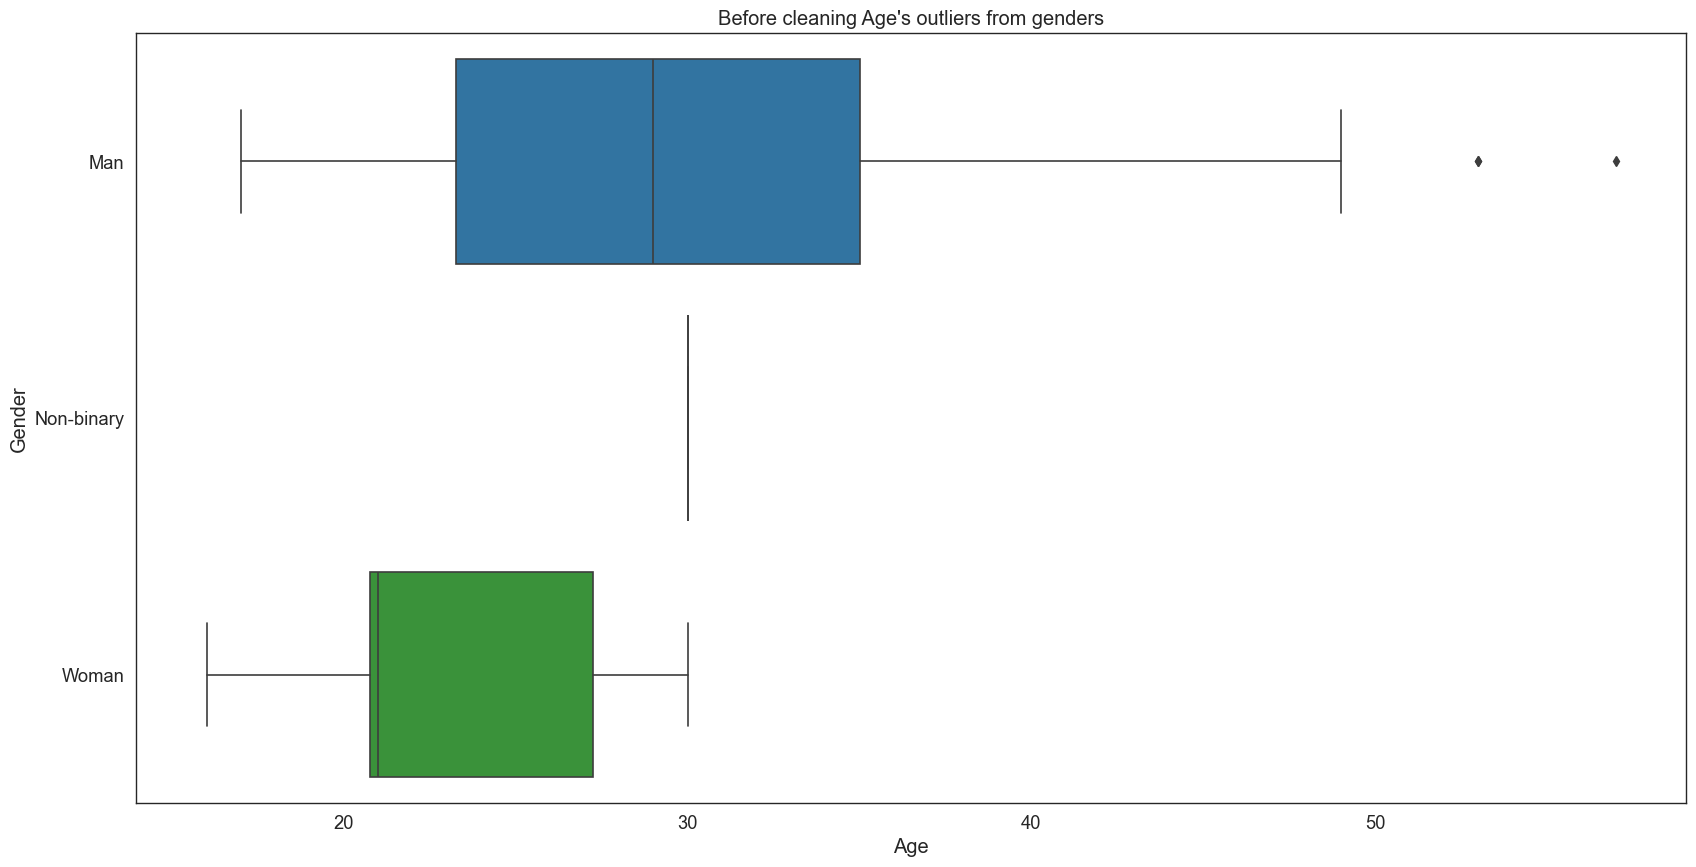

In [3666]:
#Plottig boxplot to check outliers
sns.boxplot(x='Age', y= 'Gender', data=df2020)
plt.title("Before cleaning Age's outliers from genders")
plt.show()

In [3667]:
#Cleaning Age's outliers from each gender)
df2020 = df2020[(df['Age'] >= 15) & (df2020['Age'] <= 60)]

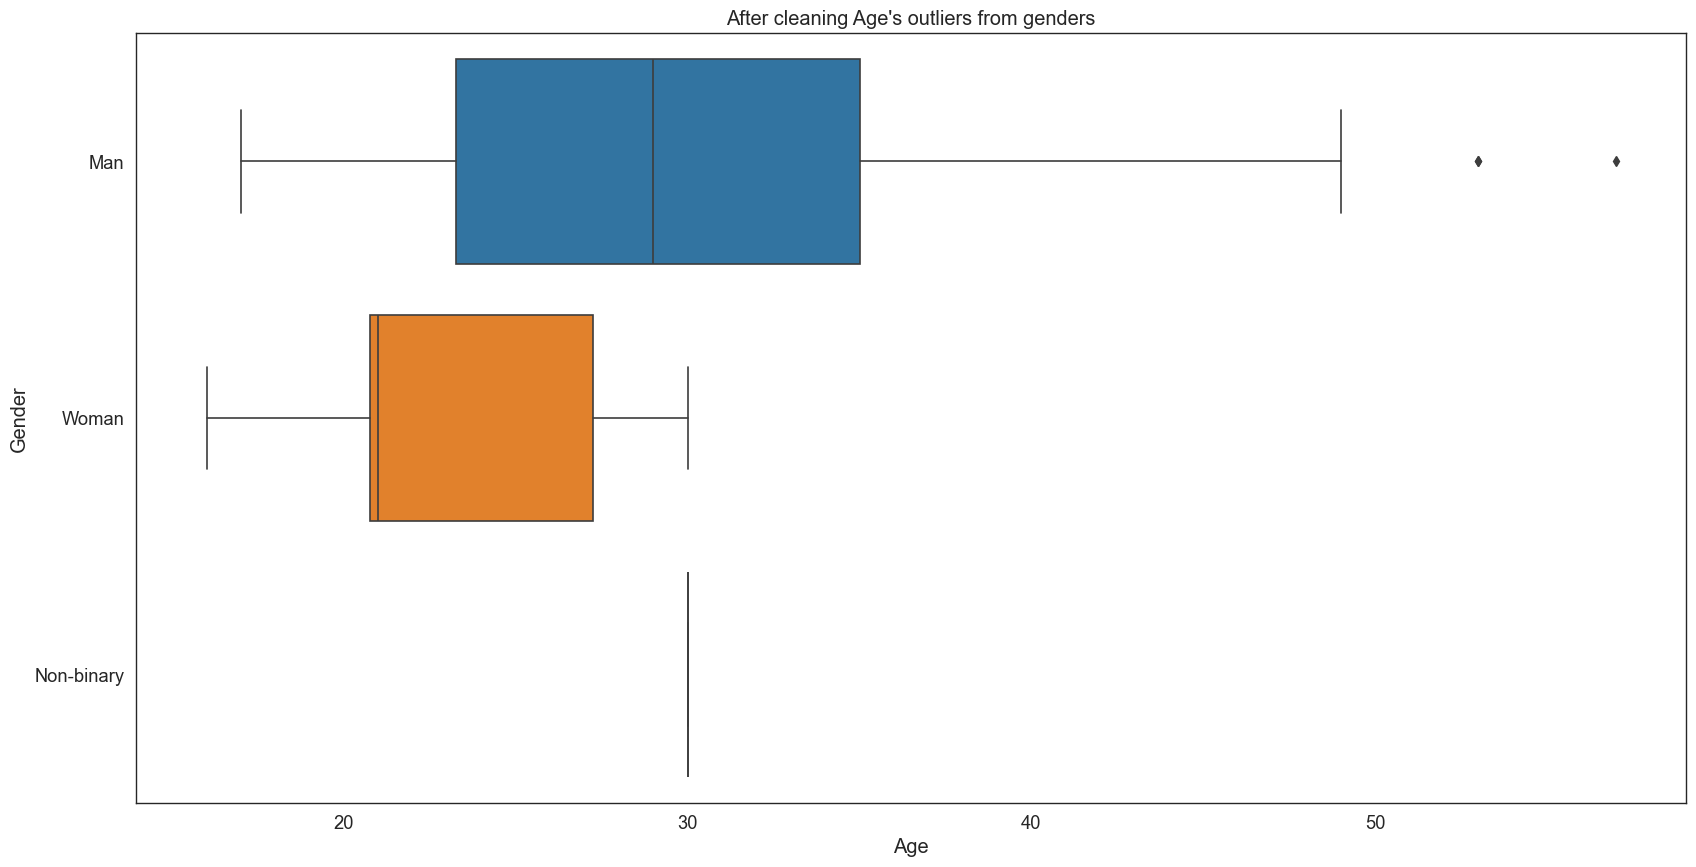

In [3668]:
#Plottig boxplot to check outliers after cleaning some outliers
sns.boxplot(x='Age', y= 'Gender', data=df2020)
plt.title("After cleaning Age's outliers from genders")
plt.show()

In [3669]:
#fill Age's null values with mean of each gender
means = df2020.groupby('Gender')['Age'].transform('mean')
df2020['Age'] = df2020['Age'].fillna(means)

#convert from float to int
df2020['Age'] = df2020['Age'].apply(str).str[:2]
df2020['Age'] = df2020['Age'].apply(int)

In [3670]:
#df before 64461
print('df shape after clean Age: ', df2020.shape) #no. of Ages' outliners = 64461-44709=19752 (30.6%)

df shape after clean Age:  (75, 16)


## EdLevel

In [3671]:
df2020['EdLevel'].isnull().sum()

3

In [3672]:
df2020['EdLevel'].value_counts()

EdLevel
Bachelor‚Äôs degree (B.A., B.S., B.Eng., etc.)                                        34
Some college/university study without earning a degree                                11
Master‚Äôs degree (M.A., M.S., M.Eng., MBA, etc.)                                     10
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7
Associate degree (A.A., A.S., etc.)                                                    5
Professional degree (JD, MD, etc.)                                                     3
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2
Name: count, dtype: int64

In [3673]:
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df2020 = refactor_ed(df2020)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df2020['EdLevel'].replace('nan', 'Bachelors', inplace=True)

In [3674]:
df2020['EdLevel'].value_counts()

EdLevel
Bachelors       47
No Degree       18
Associate        5
Professional     3
Doctorate        2
Name: count, dtype: int64

## JobSat (CurrentJobSatis)

In [3675]:
df2020['CurrentJobSatis'].isnull().sum()

15

In [3676]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        27
Slightly satisfied                    12
Slightly dissatisfied                  9
Very dissatisfied                      7
Neither satisfied nor dissatisfied     5
Name: count, dtype: int64

In [3677]:
df2020['CurrentJobSatis'].fillna(method='ffill', inplace=True)

In [3678]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        32
Slightly satisfied                    13
Slightly dissatisfied                 12
Neither satisfied nor dissatisfied    10
Very dissatisfied                      8
Name: count, dtype: int64

## JobSeek (JobStatus)

In [3679]:
df2020['JobStatus'].isnull().sum()

2

In [3680]:
df2020.groupby('JobStatus')['JobStatus'].count()

JobStatus
I am actively looking for a job                                   12
I am not interested in new job opportunities                      23
I‚Äôm not actively looking, but I am open to new opportunities    38
Name: JobStatus, dtype: int64

In [3681]:
df2020['JobStatus'].fillna(method='ffill', inplace=True)

In [3682]:
#Refactoring JobStatus
#Changing the jobstatus to seeking and non seeking
def refactor_job(df):
    '''function to change JobStatus category to Seeking and Non Seeking'''
    
    conditions_job = [(df['JobStatus'] == 'I am actively looking for a job'),
                    (df['JobStatus'] == 'I am not interested in new job opportunities')
                    | (df['JobStatus'] == 'I’m not actively looking, but I am open to new opportunities')]
    
    choices_job = ['Seeking', 'Not seeking']
    df['JobSeek'] = np.select(conditions_job, choices_job, default=np.nan)                      
    return df

df2020 = refactor_job(df2020)

In [3683]:
df2020.groupby('JobSeek')['JobSeek'].count()

JobSeek
Not seeking    24
Seeking        12
nan            39
Name: JobSeek, dtype: int64

In [3684]:
df2020['JobStatus'].isnull().sum()

0

## DevType

In [3685]:
df2020['DevType'].isnull().sum()

14

In [3686]:
df2020['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                                                                                                                                                                                                        9
Developer, back-end                                                                                                                                                                                                                                                                          5
Designer;Developer, front-end                                                                                                                                                                                                                                                                2
Developer, back-end;Developer, front-end;Developer, full-stack                                                                     

In [3687]:
df2020['DevType'] = df2020['DevType'].bfill().ffill()

In [3688]:
df2020['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                                                                                                                 12
Developer, back-end                                                                                                                    5
Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics                                          3
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, QA or test     2
Developer, back-end;Developer, front-end;Developer, full-stack                                                                         2
Developer, full-stack;Product manager;Senior executive/VP                                                                              2
Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, full-stack;Engineer, data          2
Developer, back-end;Developer, de

In [3689]:
df.shape

(99, 26)

In [3690]:

df2020['DevType'].isnull().sum()

0

In [3691]:
df2020[df2020['DevType'].isnull()]

,Age,Gender,SalaryUSD,Country,DevType,Hobbyist,EdLevel,Employment,Ethnicity,CurrentJobSatis,JobStatus,LanguageDesireNextYear,LanguageWorkedWith,Profession,UndergradMajor,YearsCodePro,JobSeek


## Ethnicity

In [3692]:

df2020['Ethnicity'].isnull().sum()

6

In [3693]:
#count number of each Ethnicity
df2020.groupby('Ethnicity')['Ethnicity'].count()
df2020['Ethnicity'].value_counts().nlargest(10)

Ethnicity
White or of European descent                                                                                     56
Hispanic or Latino/a/x                                                                                            5
East Asian                                                                                                        2
Middle Eastern                                                                                                    1
White or of European descent;Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)     1
South Asian                                                                                                       1
Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)                                  1
Hispanic or Latino/a/x;White or of European descent                                                               1
Multiracial                                                   

In [3694]:

#combine Ethnicity by str.match(if each string starts with a match of a regular expression pattern)
df2020.loc[df['Ethnicity'].str.match('Biracial') == True, 'Ethnicity'] = 'Biracial'
df2020.loc[df['Ethnicity'].str.match('Black or of African descent') == True, 'Ethnicity'] = 'Black or of African descent'
df2020.loc[df['Ethnicity'].str.match('East Asian') == True, 'Ethnicity'] = 'East Asian'
df2020.loc[df['Ethnicity'].str.match('Hispanic or Latino') == True, 'Ethnicity'] = 'Hispanic or Latino'
df2020.loc[df['Ethnicity'].str.match('Indigenous') == True, 'Ethnicity'] = 'Indigenous'
df2020.loc[df['Ethnicity'].str.match('Middle Eastern') == True, 'Ethnicity'] = 'Middle Eastern'
df2020.loc[df['Ethnicity'].str.match('South Asian') == True, 'Ethnicity'] = 'South Asian'
df2020.loc[df['Ethnicity'].str.match('White or of European descent') == True, 'Ethnicity'] = 'White or of European descent'
df2020.loc[df['Ethnicity'].str.match('Multiracial') == True, 'Ethnicity'] = 'Multiracial'

In [3695]:

df2020.groupby('Ethnicity')['Ethnicity'].count() #11 groups of Ethnicity after combining 
df2020['Ethnicity'].value_counts()

Ethnicity
White or of European descent    57
Hispanic or Latino               6
East Asian                       2
Middle Eastern                   1
South Asian                      1
Indigenous                       1
Multiracial                      1
Name: count, dtype: int64

In [3696]:

df2020['Ethnicity']=df2020.groupby(['Country'])['Ethnicity'].bfill().ffill()

In [3697]:
#count number of each Ethnicity
df2020.groupby('Ethnicity')['Ethnicity'].count()
df2020['Ethnicity'].value_counts()

Ethnicity
White or of European descent    63
Hispanic or Latino               6
East Asian                       2
Middle Eastern                   1
South Asian                      1
Indigenous                       1
Multiracial                      1
Name: count, dtype: int64

In [3698]:
df2020['Ethnicity'].isnull().sum()

0

In [3699]:

print(df2020.isnull().sum())

Age                        0
Gender                     0
SalaryUSD                 28
Country                    0
DevType                    0
Hobbyist                   0
EdLevel                    0
Employment                 1
Ethnicity                  0
CurrentJobSatis            0
JobStatus                  0
LanguageDesireNextYear     5
LanguageWorkedWith         1
Profession                 0
UndergradMajor             9
YearsCodePro              14
JobSeek                    0
dtype: int64


## LanguageDesireNextYear

In [3700]:
df2020['LanguageDesireNextYear'].isnull().sum()

5

In [3701]:
df2020['LanguageDesireNextYear'].value_counts().nlargest(10)

LanguageDesireNextYear
Python;TypeScript                                                                        2
C#                                                                                       2
HTML/CSS;Java;JavaScript;Python;R;SQL                                                    2
C++;Python                                                                               2
Go;Kotlin;TypeScript                                                                     2
Go                                                                                       2
Assembly;Bash/Shell/PowerShell;C;C#;C++;Go;Haskell;Java;JavaScript;Kotlin;Python;Rust    1
Kotlin;Python;Swift                                                                      1
Julia;Python;Rust;Swift                                                                  1
HTML/CSS;JavaScript;PHP;TypeScript                                                       1
Name: count, dtype: int64

In [3702]:
#df2020['LanguageDesireNextYear'].fillna(method='ffill', inplace=True)
df2020['LanguageDesireNextYear']=df2020['LanguageDesireNextYear'].bfill().ffill()

In [3703]:
df2020['LanguageDesireNextYear'].value_counts().nlargest(10)

LanguageDesireNextYear
Java;Ruby;Scala                                2
JavaScript;Swift                               2
Python;TypeScript                              2
Java;Kotlin                                    2
Go;Kotlin;TypeScript                           2
Julia;Python;Rust;Swift                        2
Bash/Shell/PowerShell;C#;Dart;Go;TypeScript    2
C++;Python                                     2
C#                                             2
Go                                             2
Name: count, dtype: int64

In [3704]:
df2020['LanguageDesireNextYear'].isnull().sum()

0

## LanguageWorkedWith

In [3705]:
df2020['LanguageWorkedWith'].isnull().sum()

1

In [3706]:
df2020['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                                      5
C#;HTML/CSS;JavaScript;SQL                                                       2
Bash/Shell/PowerShell;C#;C++                                                     2
Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaScript;PHP;Python          1
Assembly;Bash/Shell/PowerShell;C;C++;Python                                      1
Assembly;Bash/Shell/PowerShell;C;C#;C++;Go;HTML/CSS;JavaScript;SQL;TypeScript    1
Bash/Shell/PowerShell;JavaScript;Python;Swift                                    1
C#;HTML/CSS;Java;JavaScript;PHP;Ruby;TypeScript                                  1
HTML/CSS;Python                                                                  1
HTML/CSS;JavaScript;Ruby                                                         1
Name: count, dtype: int64

In [3707]:
#df2020['LanguageWorkedWith'].fillna(method='ffill', inplace=True)
df2020['LanguageWorkedWith']=df2020['LanguageWorkedWith'].bfill().ffill()

In [3708]:
df2020['LanguageWorkedWith'].value_counts().nlargest(10)

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                    5
HTML/CSS;Ruby;SQL                              2
Bash/Shell/PowerShell;C#;C++                   2
C#;HTML/CSS;JavaScript;SQL                     2
Bash/Shell/PowerShell;HTML/CSS;JavaScript      1
Assembly;Bash/Shell/PowerShell;C;C++;Python    1
C#;HTML/CSS;JavaScript;PHP;Ruby                1
C#;C++;HTML/CSS;Java;Python;Ruby;SQL;Swift     1
C++;Python                                     1
C;C++;HTML/CSS;Java;JavaScript;Python          1
Name: count, dtype: int64

In [3709]:
df2020['LanguageWorkedWith'].isnull().sum()

0

## MainBranch (Profession)

In [3710]:
df2020['Profession'].isnull().sum()

0

In [3711]:
df2020.groupby('Profession')['Profession'].count()

Profession
I am a developer by profession                                                   59
I am a student who is learning to code                                           10
I am not primarily a developer, but I write code sometimes as part of my work     4
I code primarily as a hobby                                                       1
I used to be a developer by profession, but no longer am                          1
Name: Profession, dtype: int64

In [3712]:
df2020.dropna(subset=['Profession'], inplace = True)

In [3713]:
#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]
    
    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)          
    return df

df2020 = refactor_prof(df2020)

In [3714]:
df2020['Profession'].value_counts()

Profession
Developer        59
Student          10
Non developer     4
Ex-Developer      1
Novoice           1
Name: count, dtype: int64

In [3715]:
df2020['Profession'].isnull().sum()

0

## UndergradMajor

In [3716]:

df2020['UndergradMajor'].isnull().sum()

9

In [3717]:
df2020.groupby('UndergradMajor')['UndergradMajor'].count()

UndergradMajor
A health science (such as nursing, pharmacy, radiology, etc.)                      1
A humanities discipline (such as literature, history, philosophy, etc.)            1
A natural science (such as biology, chemistry, physics, etc.)                      3
A social science (such as anthropology, psychology, political science, etc.)       1
Another engineering discipline (such as civil, electrical, mechanical, etc.)       5
Computer science, computer engineering, or software engineering                   43
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     2
I never declared a major                                                           1
Information systems, information technology, or system administration              3
Mathematics or statistics                                                          3
Web development or web design                                                      3
Name: UndergradMajor, dtype: int64

In [3718]:
def refactor_major(df):
    conditions_major = [(df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'), 
                        (df['UndergradMajor'] == 'Another engineering discipline (such as civil, electrical, mechanical, etc.)'),
                        (df['UndergradMajor'] == 'Information systems, information technology, or system administration'), 
                        (df['UndergradMajor'] == 'Mathematics or statistics'),
                        (df['UndergradMajor'] == 'A natural science (such as biology, chemistry, physics, etc.)') 
                        |(df['UndergradMajor'] == 'A health science (such as nursing, pharmacy, radiology, etc.)'), 
                        (df['UndergradMajor'] == 'Web development or web design'), 
                        (df['UndergradMajor'] == 'A business discipline (such as accounting, finance, marketing, etc.)'), 
                        (df['UndergradMajor'] == 'A humanities discipline (such as literature, history, philosophy, etc.)')
                        | (df['UndergradMajor'] == 'A social science (such as anthropology, psychology, political science, etc.)')
                        | (df['UndergradMajor'] == 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'),
                        (df['UndergradMajor'] == 'I never declared a major') ]
    
    choices_major = ['Computer Science', 'Engineering', 'Info Systems', 'Math/Stat', 'Other Science',
                     'Web Design/Dev', 'Business', 'Arts and Science', 'No major']
    df['UndergradMajor'] = np.select(conditions_major, choices_major, default = np.NaN)
    return df

df2020 = refactor_major(df2020)
df2020['UndergradMajor'].replace('nan', 'No major', inplace=True)

In [3719]:
df2020.groupby('UndergradMajor')['UndergradMajor'].count()

UndergradMajor
Arts and Science     4
Computer Science    43
Engineering          5
Info Systems         3
Math/Stat            3
No major            10
Other Science        4
Web Design/Dev       3
Name: UndergradMajor, dtype: int64

In [3720]:
df2020['UndergradMajor'].isnull().sum()

0

## Employment

In [3721]:
df2020['Employment'].isnull().sum()

1

In [3722]:

df2020.groupby('Employment')['Employment'].count()

Employment
Employed full-time                                      52
Employed part-time                                       2
Independent contractor, freelancer, or self-employed     6
Not employed, but looking for work                       4
Student                                                 10
Name: Employment, dtype: int64

In [3723]:
df2020.dropna(subset=['Employment'], inplace = True)

In [3724]:
#Refactoring Employment
df2020['Employment'].replace('Employed full-time', 'Full-time', inplace =True)
df2020['Employment'].replace('Employed part-time', 'Part-time',inplace =True)
df2020['Employment'].replace('Independent contractor, freelancer, or self-employed', 'Self-employed', inplace =True)
df2020['Employment'].replace('Not employed, but looking for work', 'Not employed', inplace =True)

In [3725]:
df2020.groupby('Employment')['Employment'].count()

Employment
Full-time        52
Not employed      4
Part-time         2
Self-employed     6
Student          10
Name: Employment, dtype: int64

In [3726]:
df2020['Employment'].isnull().sum()

0

## Country

In [3727]:
df2020['Country'].isnull().sum()

0

In [3728]:

df2020.groupby('Country')['Country'].count()

Country
Austria            1
Belgium            2
Brazil             2
Canada             8
Czech Republic     1
France             7
Germany            3
Greece             1
India              1
Indonesia          1
Israel             1
Italy              1
Mexico             2
Netherlands        1
Poland             1
Spain              2
Tunisia            1
Ukraine            1
United Kingdom    10
United States     27
Name: Country, dtype: int64

## YearsCodePro

In [3729]:
df2020['YearsCodePro'].isnull().sum()

14

In [3730]:
df2020.dtypes

Age                         int64
Gender                     object
SalaryUSD                 float64
Country                    object
DevType                    object
Hobbyist                   object
EdLevel                    object
Employment                 object
Ethnicity                  object
CurrentJobSatis            object
JobStatus                  object
LanguageDesireNextYear     object
LanguageWorkedWith         object
Profession                 object
UndergradMajor             object
YearsCodePro               object
JobSeek                    object
dtype: object

In [3731]:
#convert YearsCodePro data type from obj to int
df2020["YearsCodePro"]=pd.to_numeric(df2020["YearsCodePro"],errors='coerce')

#fill YearsCodePro's null values with mean
means = df2020['YearsCodePro'].mean() #means 8.673142457693764
df2020['YearsCodePro'] = df2020['YearsCodePro'].fillna(means)
df2020['YearsCodePro'] = df2020['YearsCodePro'].round(2)

In [3732]:
df2020['YearsCodePro'].isnull().sum()

0

## Hobbyist

In [3733]:
df2020['Hobbyist'].isnull().sum()

0

In [3734]:
df2020.groupby('Hobbyist')['Hobbyist'].count()

Hobbyist
No     17
Yes    57
Name: Hobbyist, dtype: int64

In [3735]:
print(df2020.isnull().sum())

Age                        0
Gender                     0
SalaryUSD                 27
Country                    0
DevType                    0
Hobbyist                   0
EdLevel                    0
Employment                 0
Ethnicity                  0
CurrentJobSatis            0
JobStatus                  0
LanguageDesireNextYear     0
LanguageWorkedWith         0
Profession                 0
UndergradMajor             0
YearsCodePro               0
JobSeek                    0
dtype: int64


## ConvertedComp (SalaryUSD)

In [3736]:
df2020['SalaryUSD'].isnull().sum()

27

In [3737]:
df2020['SalaryUSD'].value_counts().nlargest()

SalaryUSD
130000.0    2
37816.0     2
116000.0    1
94500.0     1
16488.0     1
Name: count, dtype: int64

mean_salary = df2020.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

In [3738]:
#df2020['SalaryUSD'] = df2020.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform(lambda grp: grp.fillna(np.mean(grp)))

means = df2020.groupby(['Age', 'EdLevel', 'Country'])['SalaryUSD'].transform('mean')
df2020['SalaryUSD'] = df2020['SalaryUSD'].fillna(means)

In [3739]:

mean_salary = df2020.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

Age  EdLevel       Country       
34   Bachelors     United States     1.176000e+06
44   Bachelors     United States     8.900000e+05
25   Bachelors     France            5.945390e+05
32   Bachelors     United States     4.948333e+05
35   Professional  United States     2.500000e+05
28   Bachelors     United States     1.300000e+05
38   Bachelors     United States     1.250000e+05
34   Bachelors     United Kingdom    1.240920e+05
48   Associate     United States     1.170000e+05
36   Bachelors     United States     1.160000e+05
Name: SalaryUSD, dtype: float64

In [3740]:

df2020['SalaryUSD'].value_counts().nlargest()

SalaryUSD
79000.0     3
37816.0     3
130000.0    2
116000.0    1
117000.0    1
Name: count, dtype: int64

In [3741]:

df2020['SalaryUSD'].isnull().sum() #2952 out of 64461 -> 4.6%

24

In [3742]:
df2020.dropna(subset=['SalaryUSD'], inplace = True)

In [3743]:
df2020['SalaryUSD'].isnull().sum()

0

## Cleaned Dataset:2020_Survey

In [3744]:
print(df2020.isnull().sum())

Age                       0
Gender                    0
SalaryUSD                 0
Country                   0
DevType                   0
Hobbyist                  0
EdLevel                   0
Employment                0
Ethnicity                 0
CurrentJobSatis           0
JobStatus                 0
LanguageDesireNextYear    0
LanguageWorkedWith        0
Profession                0
UndergradMajor            0
YearsCodePro              0
JobSeek                   0
dtype: int64


In [3745]:
#resetting the index values
df2020 = df2020.reset_index(drop=True)

In [3746]:
df2020.head(5)

,Age,Gender,SalaryUSD,Country,DevType,Hobbyist,EdLevel,Employment,Ethnicity,CurrentJobSatis,JobStatus,LanguageDesireNextYear,LanguageWorkedWith,Profession,UndergradMajor,YearsCodePro,JobSeek
0,36,Man,116000.0,United States,"Developer, back-end;Developer, desktop or ente...",Yes,Bachelors,Full-time,White or of European descent,Slightly dissatisfied,"I‚Äôm not actively looking, but I am open to n...",JavaScript,Python;SQL,Developer,Computer Science,13.0,nan
1,22,Man,32315.0,United Kingdom,"Database administrator;Developer, full-stack;D...",Yes,Bachelors,Full-time,White or of European descent,Very satisfied,"I‚Äôm not actively looking, but I am open to n...",HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Developer,Math/Stat,4.0,nan
2,23,Man,40070.0,United Kingdom,"Developer, back-end;Developer, desktop or ente...",Yes,Bachelors,Full-time,White or of European descent,Slightly dissatisfied,I am actively looking for a job,Go;JavaScript;Swift;TypeScript,C#;JavaScript;Swift,Developer,Computer Science,2.0,Seeking
3,49,Man,14268.0,Spain,"Designer;Developer, front-end",No,No Degree,Full-time,White or of European descent,Very dissatisfied,"I‚Äôm not actively looking, but I am open to n...",HTML/CSS;JavaScript,HTML/CSS;JavaScript,Developer,Math/Stat,7.0,nan
4,53,Man,38916.0,Netherlands,"Designer;Developer, back-end",Yes,No Degree,Full-time,White or of European descent,Very satisfied,I am not interested in new job opportunities,Python,C;JavaScript;Python,Non developer,No major,20.0,Not seeking


In [3747]:
df2020.info()#after cleaning the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     50 non-null     int64  
 1   Gender                  50 non-null     object 
 2   SalaryUSD               50 non-null     float64
 3   Country                 50 non-null     object 
 4   DevType                 50 non-null     object 
 5   Hobbyist                50 non-null     object 
 6   EdLevel                 50 non-null     object 
 7   Employment              50 non-null     object 
 8   Ethnicity               50 non-null     object 
 9   CurrentJobSatis         50 non-null     object 
 10  JobStatus               50 non-null     object 
 11  LanguageDesireNextYear  50 non-null     object 
 12  LanguageWorkedWith      50 non-null     object 
 13  Profession              50 non-null     object 
 14  UndergradMajor          50 non-null     obje

### After Cleaning Dataset 2020

In [3748]:
#Find % of missing data
missing_count = df2020.isnull().sum() #number of missing
total_cells = np.product(df2020.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  850
Total missing :  0
Missing Percentage:  0.0 %


# Visualization
After cleaning the datasets, we started visualizations to analyze the datasets.

## To find whether there is any difference between men and women's income from latest stack overflow survey (2020)

In [3749]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3750]:
import seaborn as sns
sns.set_style('darkgrid')

In [3751]:
plt.rcParams["figure.figsize"] = (20,10)

In [3752]:
#sns.boxplot('SalaryUSD', data=df2020, width=0.3) 
#Cleaning SalaryUSD's outliers
df2020 = df2020[(df2020['SalaryUSD'] < 200000)]

Text(0.5, 1.0, 'Income vs Gender')

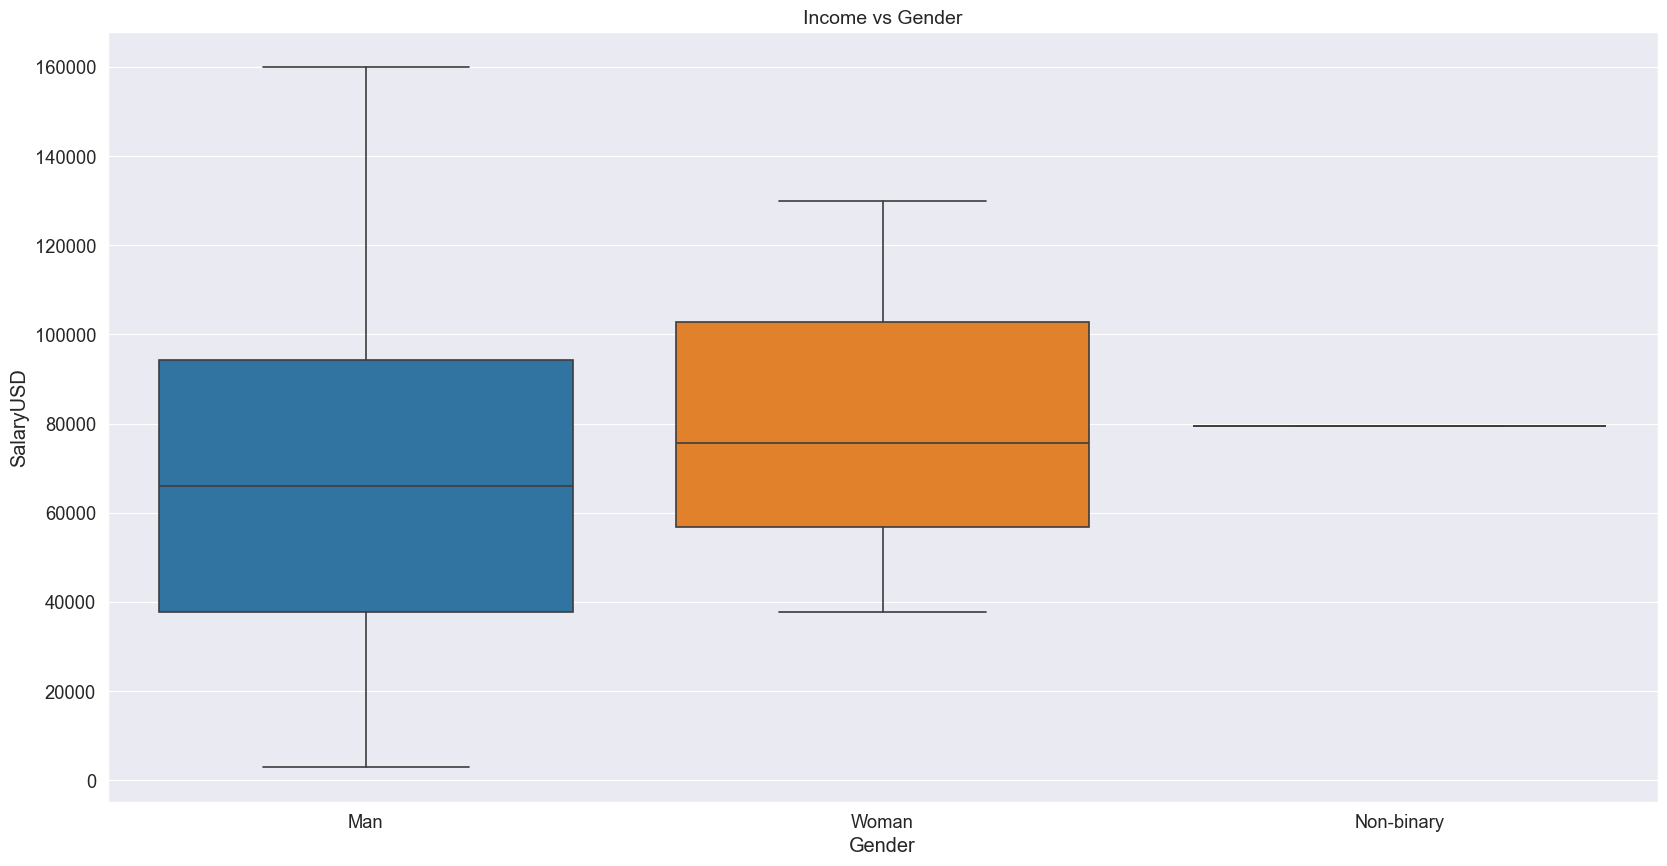

In [3753]:
sns.boxplot(x ='Gender', y='SalaryUSD', data=df2020)
plt.title('Income vs Gender', fontsize = 14)

### **Analysis**<br>
There is a little bit of difference between Gender and income they received respectively. Men tend to receive more salary than women from the above analysis.

## Impact on participation rate due to different ethnicity based on country.

In [3754]:
participation_rate = df2020['Ethnicity'].value_counts().keys().tolist()
print(participation_rate)
count = df2020['Ethnicity'].value_counts().tolist()
print(count)

['White or of European descent', 'Hispanic or Latino', 'Indigenous', 'East Asian', 'Multiracial']
[40, 2, 1, 1, 1]


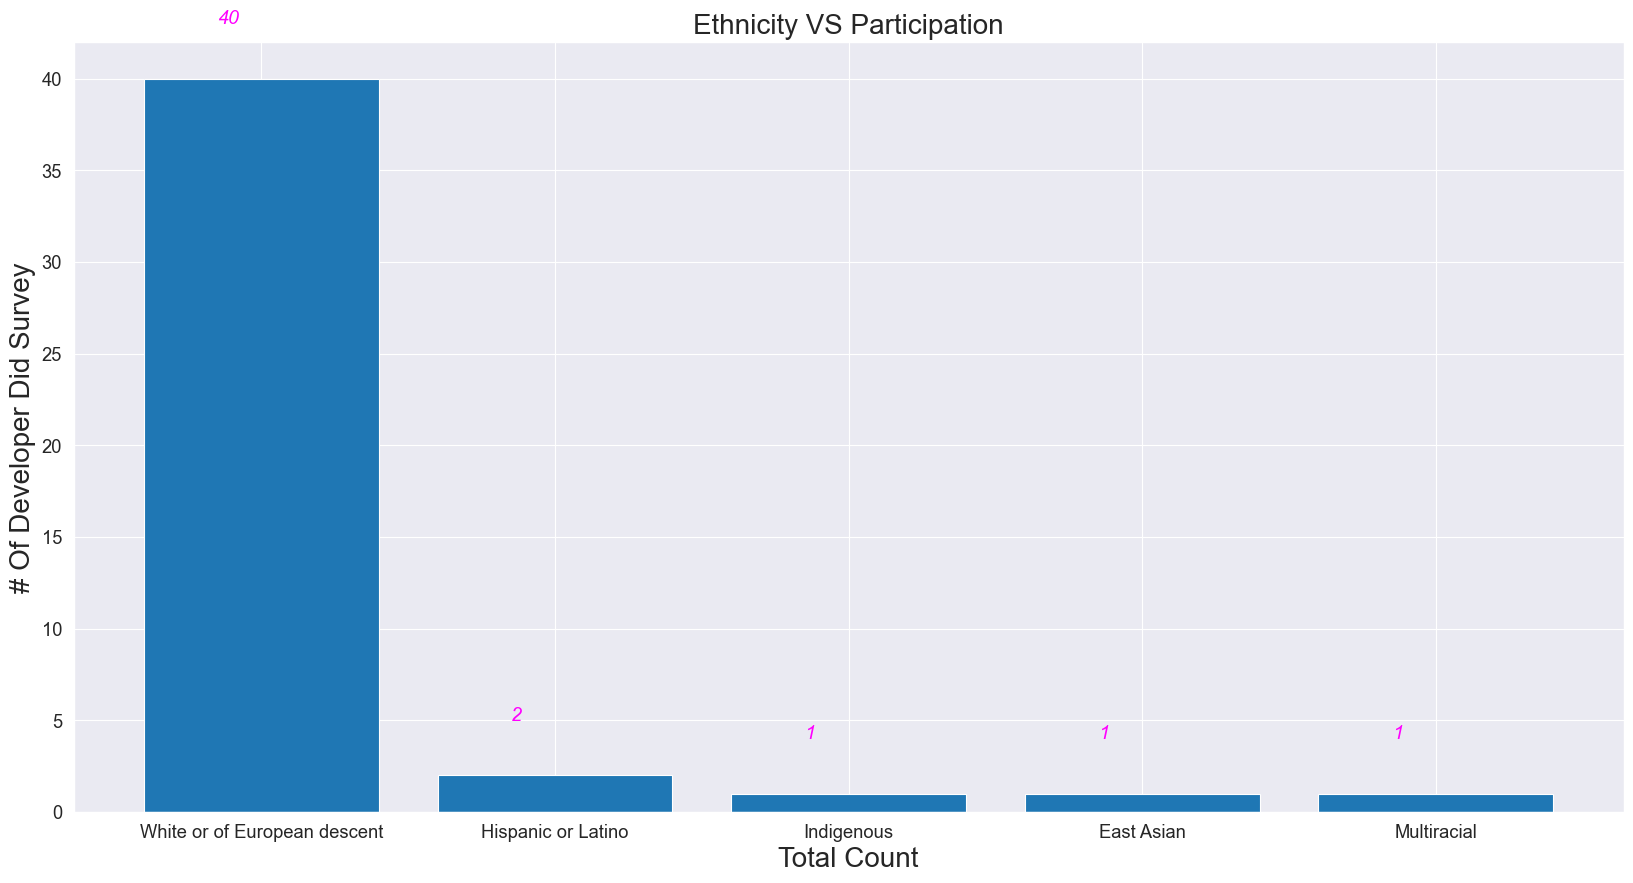

In [3755]:
fig, ax = plt.subplots()    
 
ax.bar(participation_rate,count)
plt.title('Ethnicity VS Participation',size=20)
plt.xlabel('Total Count',size = 20)
plt.ylabel('# Of Developer Did Survey',size = 20) 
for i, v in enumerate(count):
    ax.text(i-.15, 
              v+3,
              count[i],
              style = 'italic',
              fontsize=14,
              color = 'magenta')
ax.grid(True)

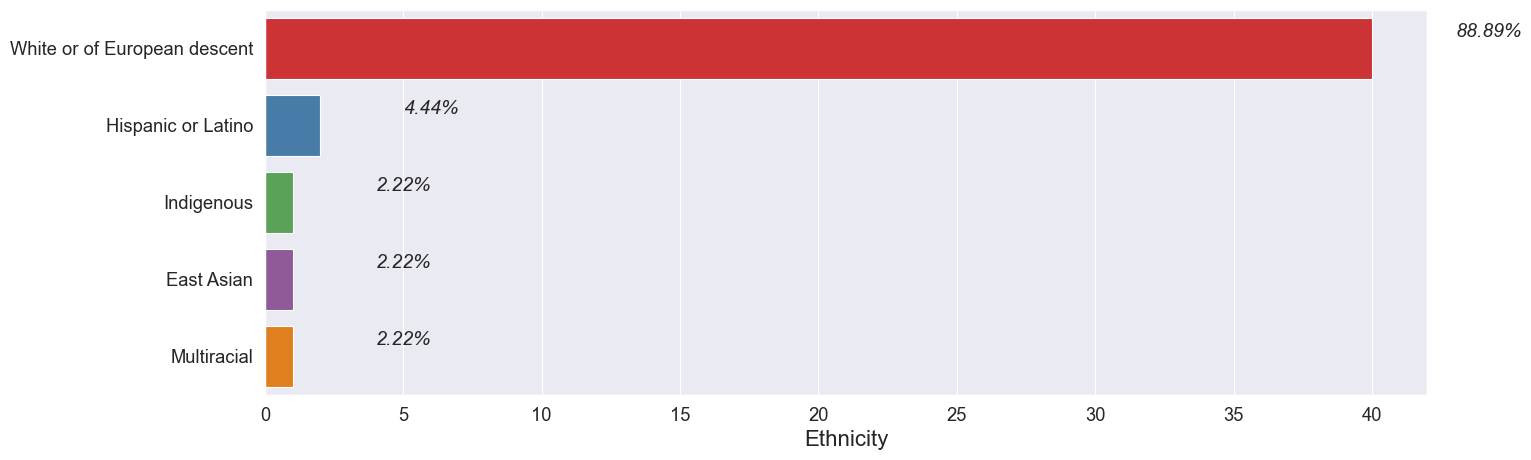

In [3756]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x = count, y = participation_rate, palette = 'Set1')
plt.xlabel('Ethnicity', size = 16)
for i, v in enumerate(count):
    ax.text(  v+3,
              i-.15,
              f'{count[i]*100/sum(count):.2f}%',
              style = 'italic',
              fontsize=14,
              )

**From the Survey Analysis, more particpation has been happened from White or of European Ethnicity which is 24573 participation which is very high comparing to others.<br>
The least has been recorded as only 0.16% from Indigenous.<br>
The second top survey contributors are from South Asians which is 11.93% of the respondents.**

# Geographical plot to show number of respondents in each country in 2019

In [3757]:
#geoplot_2019=cleaned_df_2019.groupby('Country').agg('count')
geoplot_2019=cleaned_df_2019.groupby('Country').size()
geoplot_2019=geoplot_2019.to_frame('Respondents')

In [3758]:
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

In [3759]:
geoplot_2019['Country'] = geoplot_2019.index
geoplot_2019['Country_code'] = geoplot_2019['Country'].apply(get_country_code)

In [3760]:
fig = px.choropleth(geoplot_2019,                        
                     locations="Country_code",           
                     color="Respondents",               
                     hover_name="Country",              
                     projection="natural earth",        
                     color_continuous_scale = 'Peach',  
                     range_color=[0,10000]     
                     )        
fig.show()

# Analysing salary distribution among top ten countries

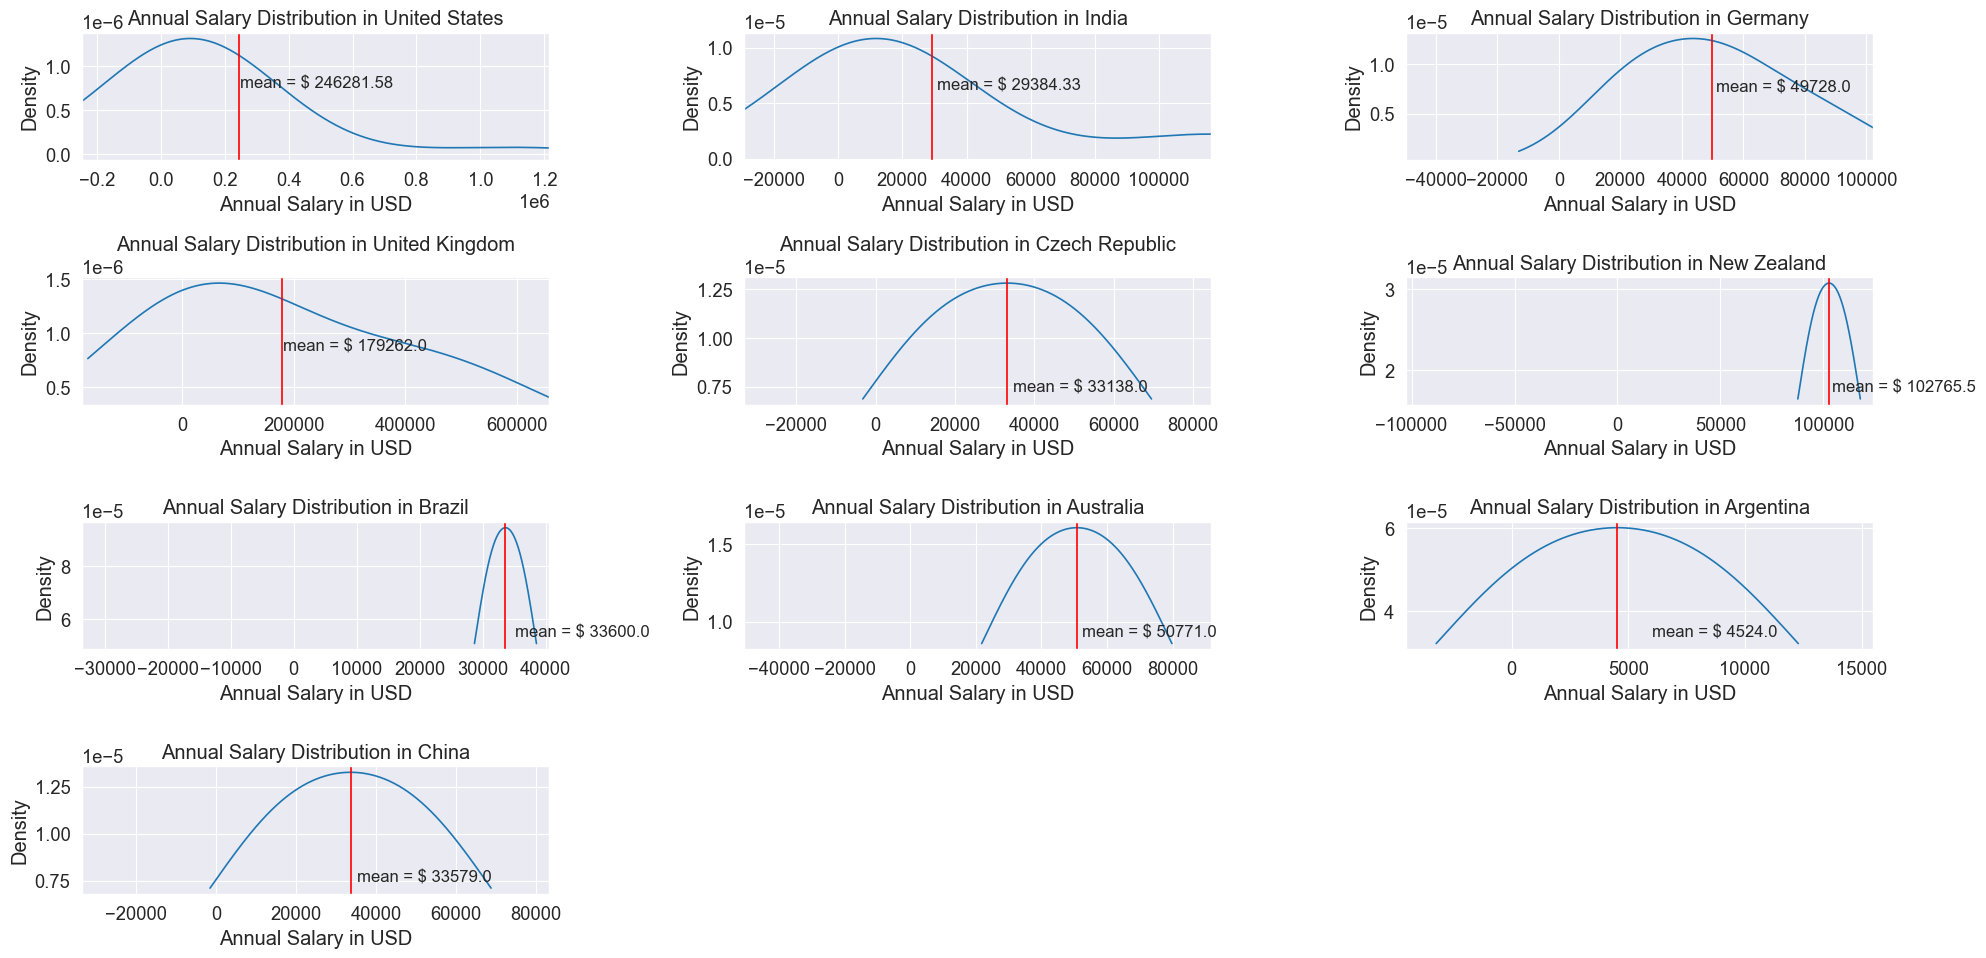

In [3761]:
fig = plt.figure(figsize = (20, 10))

countries = cleaned_df_2019['Country'].value_counts().sort_values(ascending = False)[:10].index.tolist()

for i, country in enumerate(countries):
    plt.subplot(4, 3, i + 1)
    temp_salaries = cleaned_df_2019.loc[cleaned_df_2019['Country'] == country, 'SalaryUSD']

    ax = temp_salaries.plot(kind = 'kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1]) * 0.55), 'mean = $ ' + str(round(temp_salaries.mean(),2)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(), temp_salaries.mean() + 2 * temp_salaries.std())
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.show()

### Analysis

Overall, the country which has the highest mean annual salary is the United States of America(240,000) Dollars. The second highest country which provides the highest mean salary is Australia(164,926) Dollars. Though India has a higher number of respondents, it has the lowest mean salary of $25,213.We can understand that the mean salary of a developed country is much higher than that of a developing country.

# Analysing impact of education level on salary

In [3762]:
salary_edu = cleaned_df_2019.groupby(['EdLevel'])
associate_group = salary_edu.get_group('Associate')
associate_mean = associate_group['SalaryUSD'].mean()
filt = (salary_edu.get_group('Associate')['SalaryUSD'] > associate_mean).to_frame()
filt = filt[filt['SalaryUSD'] == False]
cleaned_df_2019.drop(index=filt.index, inplace=True)

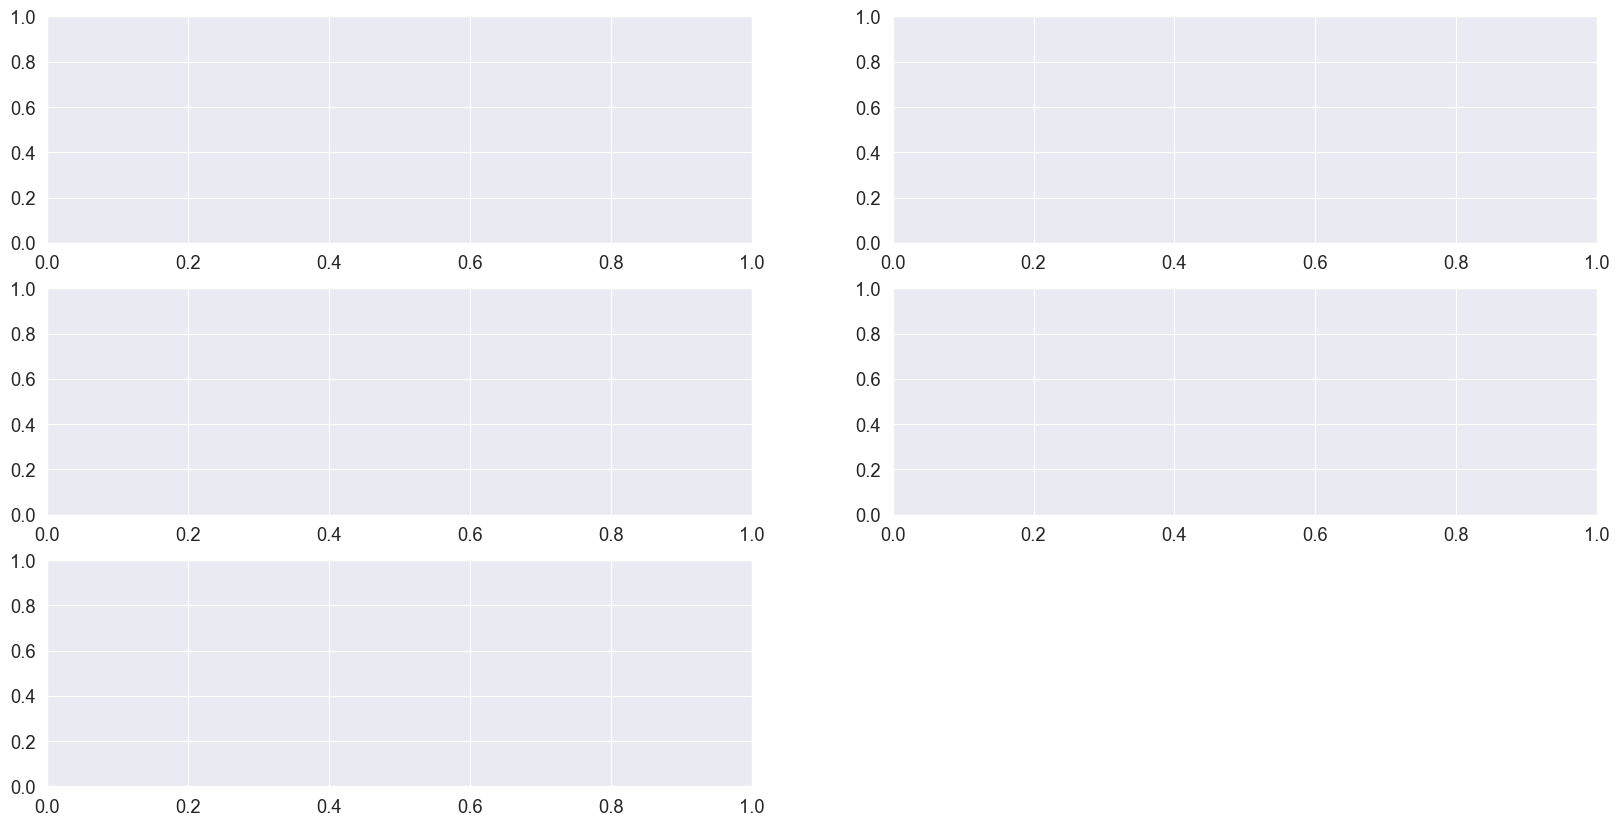

In [3763]:
fig = plt.figure(figsize = (20, 10))

education_2019 = cleaned_df_2019['EdLevel'].value_counts().sort_values(ascending = False).index.tolist()

for i, edu in enumerate(education_2019):
    plt.subplot(3, 2, i + 1)
    temp_salaries = cleaned_df_2019.loc[cleaned_df_2019['EdLevel'] == edu, 'SalaryUSD']



### Analysis

As we can see, the respondents who have done Doctorate have the highest mean salary among all other education levels. Secondly, the respondents who have done Bachelors degree have more salary than that of Masters degree holders. This may be due to years of professional coding experience and due to the higher number of respondents in that category than that of Masters degree(No of respondents in Bachelor degree is 35659 and number of respondents in masters degree is 16940)

The most interesting is that the respondents who do not have any degree have a mean salary of $90k. This shows the improvement in online learning and advancement of technology that is shifting the company from relying on University degrees.

# Distribution of respondents based on age

In [3764]:
col =['Age', 'Country']
df_2020= cleaned_df_2019[col]

In [3765]:

df_2020['Age_range'] = 0
df_2020['Age_range']= np.where((df_2020['Age']>=15) & (df_2020['Age']<=19), '15 - 19 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=20) & (df_2020['Age']<=24), '20 - 24 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=25) & (df_2020['Age']<=29), '25 - 29 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=30) & (df_2020['Age']<=34), '30 - 34 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=35) & (df_2020['Age']<=39), '35 - 39 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=40) & (df_2020['Age']<=45), '40 - 45 years', df_2020.Age_range)
df_2020['Age_range']= np.where((df_2020['Age']>=46), '46 and above years', df_2020.Age_range)

In [3766]:
df_2020_age = df_2020.groupby(['Age_range']).size().reset_index(name='Count')
df_2020_age.sort_values(by=['Count'], ascending=False, inplace=True)

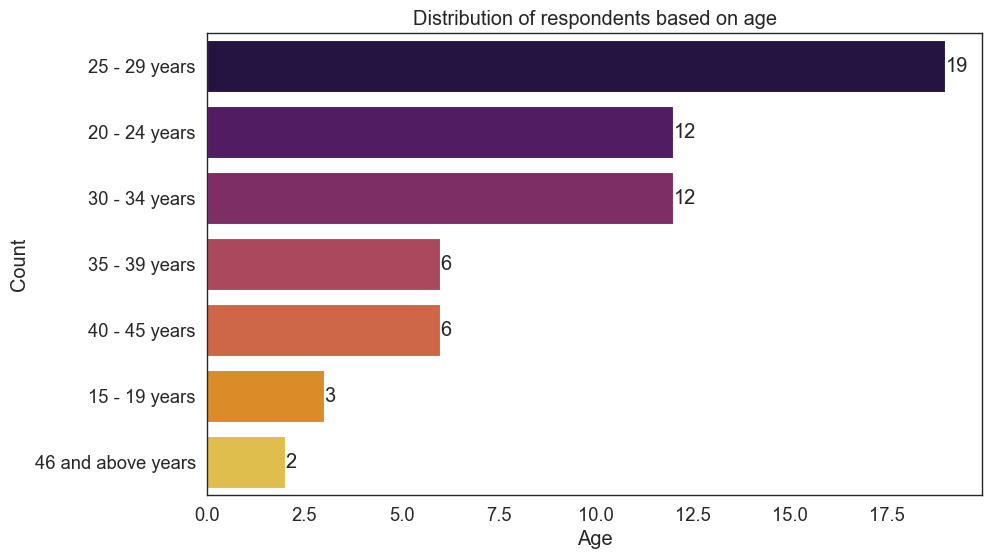

In [3767]:
plt.figure(figsize = (10, 6))
sns.set_style('white')
sns.set_context('paper', font_scale=1.5)
sns.barplot(x="Count",  y="Age_range", palette='inferno', data=df_2020_age).set(xlabel="Age", ylabel = "Count")
plt.title('Distribution of respondents based on age')

for y, x in enumerate(df_2020_age['Count']):
    label = "{:,}".format(int(x))
    plt.annotate(label, xy=(x, y), va='center')

### Impact on the increase in popularity of a language in the current-year due to developer’s interest in the previous year.(Based on 2019 and 2020 dataset)

In [3768]:
#seperate language for getting individual one
cols = ['LanguageWorkedWith']
df_19 = survey_df_2019[cols]
df_20 = df2020[cols]

In [3769]:
#splitting 'LanguageWorkedWith' and sort_values(by=['Count'], ascending=False, inplace=True)
language_2019= df_19['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
language_2019['Language'] = language_2019.index
language_2019.reset_index(drop=True, inplace=True)
language_2019 = language_2019[['Language', '2019']]

In [3770]:
language_2020= df_20['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
language_2020['Language'] = language_2020.index
language_2020.reset_index(drop=True, inplace=True)
language_2020 = language_2020[['Language', '2020']]

In [3771]:
language_all= pd.merge(language_2019, language_2020,on = ['Language'], how = 'outer')
language_all.fillna(0, inplace=True)
language_all['2019'] = language_all['2019']. astype(int)
language_all['2020'] = language_all['2020']. astype(int)
language_all.set_index('Language', inplace=True)
#language_all

In [3772]:
language19_20=(language_all/language_all.sum())
language19_20.head(5)

,2019,2020
Language,,
JavaScript,0.139205,0.155963
HTML/CSS,0.127841,0.128440
SQL,0.122159,0.105505
Python,0.085227,0.087156
Bash/Shell/PowerShell,0.076705,0.077982


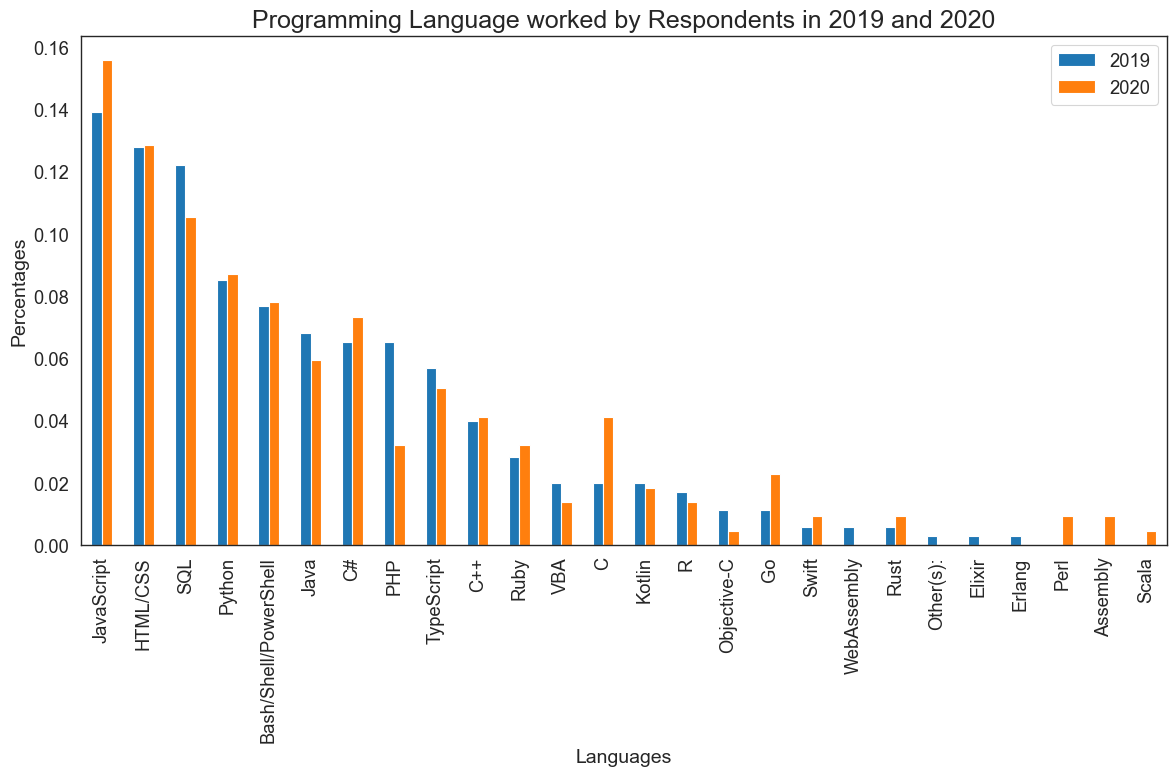

In [3773]:
language19_20.plot(kind='bar', figsize=(12,8))
plt.title('Programming Language worked by Respondents in 2019 and 2020', fontsize = 18)
plt.xlabel('Languages', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)
plt.tight_layout()

### Analysis


The most language that worked in 2019 and 2020 is JavaScript.In 2020, people worked slightly in javascript compare to 2019. The 2nd highest working language is HTML/CSS. For HTML/CSS the percentage is slightly low in 2020. There are some language people worked in only one year. Elixir, Clojure, F#, Web assembly are those languages that people used in 2019. Respondent started to use Perl, Haskell, Julia in 2020 on a small scale.

## Programming language desired to work

In [3774]:

#language desire net year
cols_1 = ['LanguageDesireNextYear']
df_19 = survey_df_2019[cols_1]
df_20 = df2020[cols_1]

In [3775]:
languagedesire_2019= df_19['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
languagedesire_2019['Language'] = languagedesire_2019.index
languagedesire_2019.reset_index(drop=True, inplace=True)
languagedesire_2019 = languagedesire_2019[['Language', '2019']]

In [3776]:

languagedesire_2020= df_20['LanguageDesireNextYear'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
languagedesire_2020['Language'] = languagedesire_2020.index
languagedesire_2020.reset_index(drop=True, inplace=True)
languagedesire_2020= languagedesire_2020[['Language','2020']]

In [3777]:

languagedesire_all = pd.merge(languagedesire_2019, languagedesire_2020,on = ['Language'], how = 'outer')
languagedesire_all.fillna(0, inplace=True)
languagedesire_all['2019'] = languagedesire_all['2019']. astype(int)
languagedesire_all['2020'] = languagedesire_all['2020']. astype(int)
languagedesire_all.set_index('Language', inplace=True)

In [3778]:
languagedesire19_20=(languagedesire_all/languagedesire_all.sum())
languagedesire19_20.head(5)

,2019,2020
Language,,
JavaScript,0.126183,0.135593
HTML/CSS,0.113565,0.096045
SQL,0.091483,0.079096
Python,0.091483,0.112994
TypeScript,0.082019,0.079096


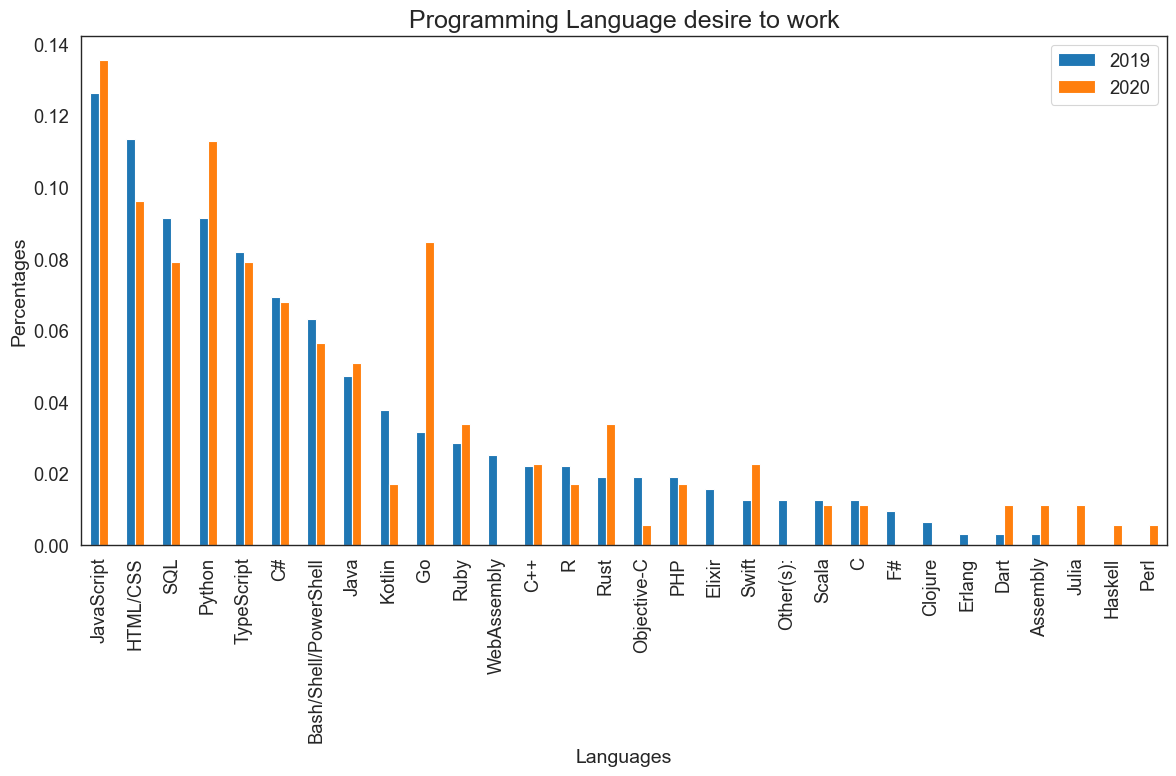

In [3779]:
languagedesire19_20.plot(kind='bar', figsize=(12,8))
plt.title('Programming Language desire to work', fontsize = 18)
plt.xlabel('Languages', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)
plt.tight_layout()

### Analysis

In 2019, respondents said that they wanted to work in javascript is around more than 10 % and the fewer respond have a desire to work on VBA next year. People started to work in Haskell, Julia, and pearl in 2019 though the amount was less around 5% of people have the desire to work in those languages in 2021. Here, phyton is the 2nd one in which people have the desire to work in both 2019 and 2020.

## Distribution of surveyors based on their developer role.

In [3780]:
col = ['DevType']
dev_18=df[col]
dev_19 = survey_df_2019[col]
dev_20= df2020[col]

In [3781]:

dev_2018= dev_18['DevType'].str.split(';', expand=True).stack().value_counts().to_frame('2018')
dev_2018['Developer'] = dev_2018.index
dev_2018.reset_index(drop=True, inplace=True)
dev_2018 = dev_2018[['Developer', '2018']]

In [3782]:
dev_2019= dev_19['DevType'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
dev_2019['Developer'] = dev_2019.index
dev_2019.reset_index(drop=True, inplace=True)
dev_2019 = dev_2019[['Developer', '2019']]

In [3783]:
dev_2020= dev_20['DevType'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
dev_2020['Developer'] = dev_2020.index
dev_2020.reset_index(drop=True, inplace=True)
dev_2020 = dev_2020[['Developer', '2020']]

In [3784]:
df18_19 = pd.merge(dev_2018, dev_2019,on = ['Developer'], how = 'outer')
devtype_all = pd.merge(df18_19,dev_2020, on=["Developer"], how="outer")
devtype_all.fillna(0, inplace=True)
devtype_all['2018'] = devtype_all['2018']. astype(int)
devtype_all['2019'] = devtype_all['2019']. astype(int)
devtype_all['2020'] =devtype_all['2020'].astype(int)
devtype_all.set_index('Developer', inplace=True)
devtype_all

,2018,2019,2020
Developer,,,
"Developer, full-stack",49,33,27
"Developer, back-end",41,26,26
"Developer, front-end",28,25,17
"Developer, desktop or enterprise applications",18,13,12
"Developer, mobile",10,8,7
Designer,9,12,5
Database administrator,8,11,4
DevOps specialist,8,14,5
"Developer, QA or test",7,3,4


In [3785]:

devtype_all.describe()

,2018,2019,2020
count,24.000000,24.000000,24.000000
mean,9.541667,9.041667,5.750000
std,12.500362,8.548985,7.449832
min,0.000000,1.000000,0.000000
25%,3.750000,3.000000,1.750000
50%,5.000000,7.500000,4.000000
75%,8.250000,12.000000,5.000000
max,49.000000,33.000000,27.000000


In [3786]:
dt_all=devtype_all/devtype_all.sum()
dt_all.head(5)

,2018,2019,2020
Developer,,,
"Developer, full-stack",0.213974,0.152074,0.195652
"Developer, back-end",0.179039,0.119816,0.188406
"Developer, front-end",0.122271,0.115207,0.123188
"Developer, desktop or enterprise applications",0.078603,0.059908,0.086957
"Developer, mobile",0.043668,0.036866,0.050725


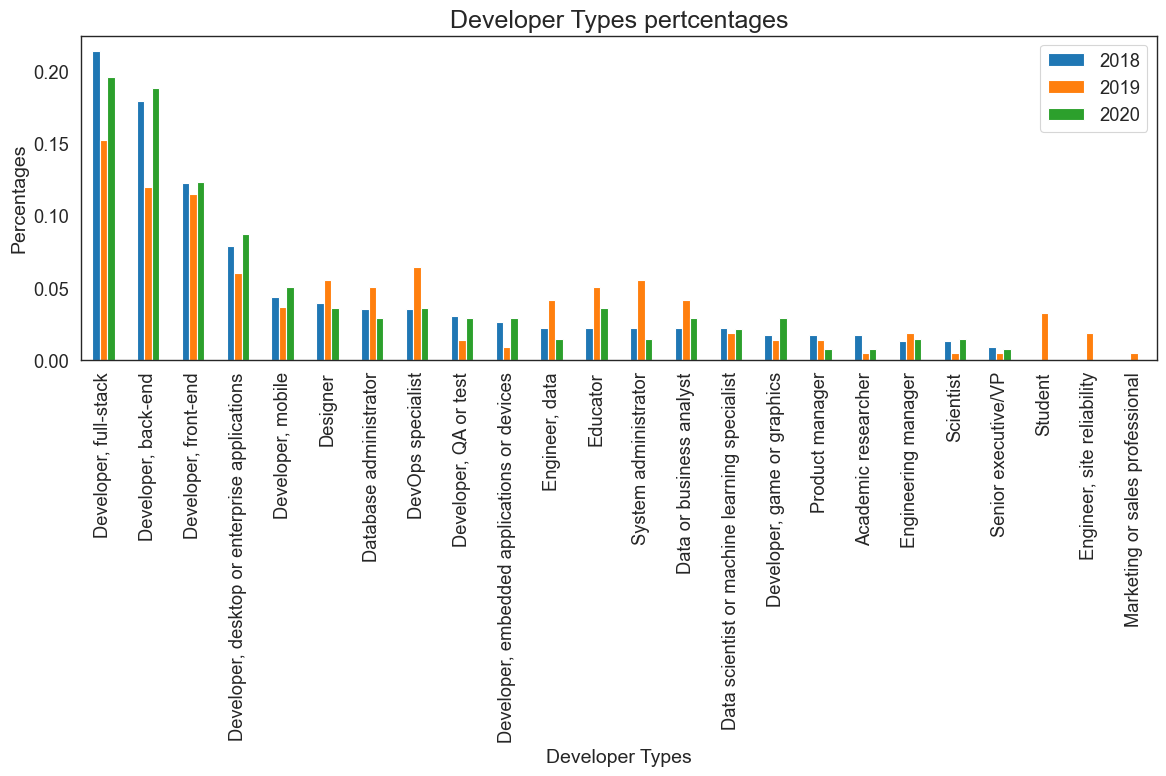

In [3787]:
(devtype_all/devtype_all.sum()).plot(kind='bar', figsize=(12,8))
plt.title('Developer Types pertcentages', fontsize = 18)
plt.xlabel('Developer Types', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)
plt.tight_layout()

### Analysis

In developer types, developers who are full stack and working backends are the most in the three years. There is a presence of student developers only in 2019 the percentage is 7.5%. Those who are working back end and full stack their percentages increased throughout the three years. For those who are working as marketing and sales professionals, their percentage is lowest compare to others.

##  Impact of education/experience/responsibilities on gender inequalities.(Based on 2019 dataset)

In [3788]:
cols = ['Gender','EdLevel', 'Dependents', 'SalaryUSD', 'YearsCodePro', 'Age', 'Country']
df2019 = survey_df_2019[cols]
df2019 = df2019[df2019.Gender != "Non-binary"]

In [3789]:
df2019['exp_range'] = 0
df2019['exp_range'] = np.where((df2019.YearsCodePro >= 0) & (df2019.YearsCodePro <= 5), '0 - 5 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 5) & (df2019.YearsCodePro <= 10), '6 - 10 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 10) & (df2019.YearsCodePro <= 15), '11 - 15 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 15) & (df2019.YearsCodePro <= 20), '16 - 20 years', df2019.exp_range)
df2019['exp_range'] = np.where((df2019.YearsCodePro > 20), 'more that 20 years', df2019.exp_range)
#df2019

### **Analysis**<br>


After exploring the 2019 dataset, we have found that we cannot answer this question since male and female observations are significantly unbalanced.

## What is the gender distribution among top 5 countries of respondents in 2019?

In [3790]:
all = df2019.groupby(['Country','Gender']).size().reset_index(name ='Count')
all['Total'] = all.groupby(['Country'])['Count'].transform('sum')
all = all.sort_values(by=['Total'], ascending=False)
#all.set_index('Total')
Top = all[:10].sort_values(by=['Total'], ascending=False)
Top

,Country,Gender,Count,Total
28,United States,Woman,2,18
27,United States,Man,16,18
11,India,Woman,1,6
10,India,Man,5,6
9,Germany,Man,4,4
26,United Kingdom,Man,3,3
24,Switzerland,Man,2,2
16,New Zealand,Man,2,2
1,Australia,Man,2,2
0,Argentina,Man,2,2


In [3791]:

# from raw value to percentage
total = Top.groupby(['Country'])['Count'].sum().reset_index()
total['Percentage'] = [i / j * 100 for i,j in zip(total['Count'], total['Count'])]

woman = Top[Top.Gender=='Woman'].groupby(['Country'])['Count'].sum().reset_index()
woman['Percentage'] = [i / j * 100 for i,j in zip(woman['Count'], total['Count'])]
woman.sort_values(by=['Percentage'], ascending=False, inplace=True)

In [3792]:
woman

,Country,Count,Percentage
1,United States,2,100.0
0,India,1,50.0


In [3793]:
total

,Country,Count,Percentage
0,Argentina,2,100.0
1,Australia,2,100.0
2,Germany,4,100.0
3,India,6,100.0
4,New Zealand,2,100.0
5,Switzerland,2,100.0
6,United Kingdom,3,100.0
7,United States,18,100.0


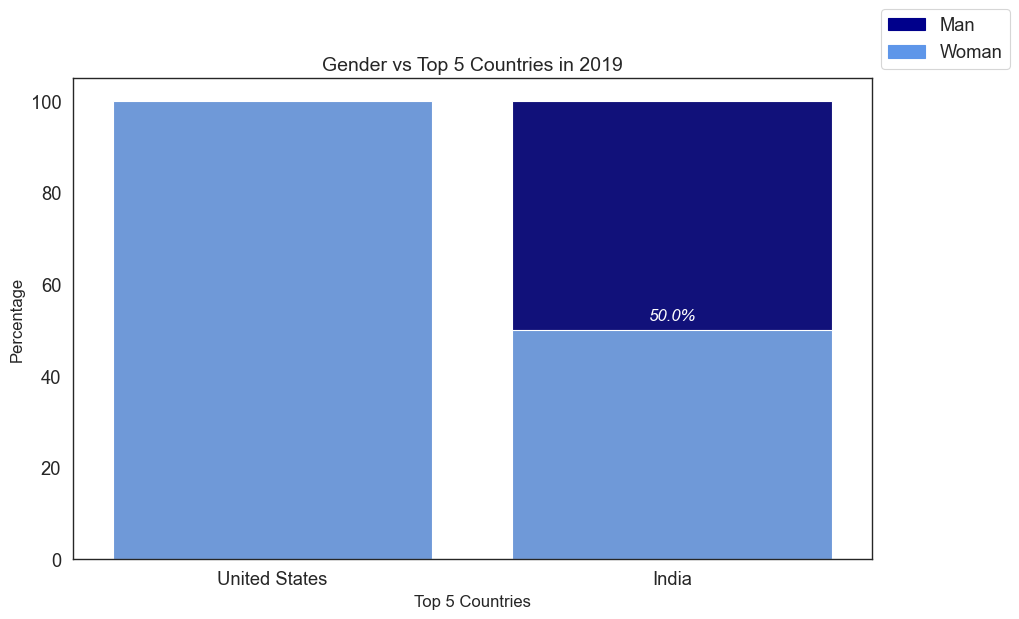

In [3794]:
fig, ax = plt.subplots(figsize = (10, 6))

# bar chart 1 -> top bars (group of 'Man')
bar1 = sns.barplot(x="Country",  y="Percentage", data=total, color='darkblue')
# bar chart 2 -> bottom bars (group of 'Woman')
bar2 = sns.barplot(x="Country", y="Percentage", data=woman, color='#5E96E9')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Man')
bottom_bar = mpatches.Patch(color='#5E96E9', label='Woman')
plt.legend(handles=[top_bar, bottom_bar])

# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))

ax.set_ylabel('Percentage', fontsize = 12)
ax.set_xlabel('Top 5 Countries', fontsize = 12)
plt.title('Gender vs Top 5 Countries in 2019', fontsize = 14)

def add_value_labels(bar2, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in bar2.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing  # Number of points between bar and label. Change to your liking.
        va = 'bottom' # Vertical alignment for positive values
        label = "{:.1f}%".format(y_value) # Use Y value as label and format number with one decimal place

        # Create annotation
        bar2.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,                      # Vertically align label differently for
            color='white', fontsize=12, style='italic')       

#Add value bar
add_value_labels(bar2)

plt.tight_layout(pad=0., w_pad=-16.5, h_pad=0.0)  
plt.show()

### **Analysis**<br>


In terms of male and female statistics, it can be seen that the US has the relatively largest female percentage at about 10.9%. Follow by Canada, the UK at 9.6% and 8.0% respectively. India and Germany have the fewest female respondents among the top 5 at around 5%.

## Where are the most data scientist come from in 2019?

In [3795]:
#creating data scientist scientist df
ds = survey_df_2019[survey_df_2019['DevType'].str.contains('Data scientist') == True ]
ds = ds.reset_index(drop=True)
len(ds)

4

In [3796]:
ds_country = ds.groupby(['Country']).size().reset_index(name ='Count')
ds_country.sort_values(by=['Count'], ascending=False, inplace=True)
top_ds_country = ds_country[:10]
top_ds_country

,Country,Count
0,Argentina,1
1,Canada,1
2,Netherlands,1
3,United States,1


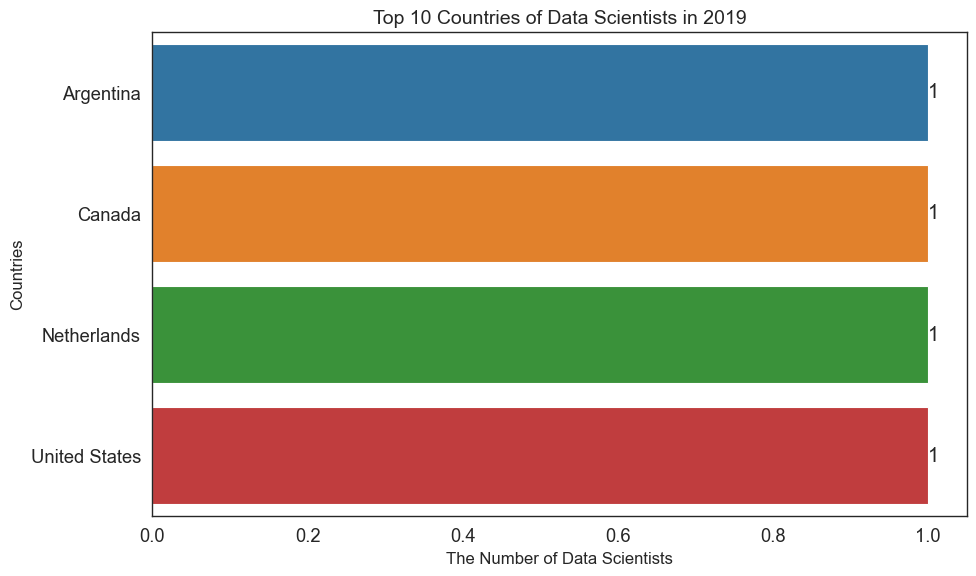

In [3797]:
fig, ax = plt.subplots(figsize = (10, 6))
ax=sns.barplot(x="Count",  y="Country", data=top_ds_country )
ax.set_ylabel('Countries', fontsize = 12)
ax.set_xlabel('The Number of Data Scientists', fontsize = 12)
plt.title('Top 10 Countries of Data Scientists in 2019', fontsize = 14)

for y, x in enumerate(top_ds_country['Count']):
    label = "{:,}".format(int(x))
    plt.annotate(label, xy=(x, y), va='center')

plt.tight_layout()  
plt.show()

### Analysis


There are 5,788 data scientists who responded to the Stackoverflow survey in 2019. Most data scientists are from the US with 1,550 people and it is 3 times higher than data scientists from India. Followed by Germany and the UK with 427 and 339 people respectively. The rest are Canada, France, Netherlands, Brazil, Russia, and Australia which have less than 200 data scientists.

#  Which countries pay the most to Data Scientists in 2019?

In [3798]:
ds_mean_salary = ds.groupby('Country')['SalaryUSD'].mean().reset_index(name ='Mean')
ds_mean_salary.sort_values(by=['Mean'], ascending=False, inplace=True)
ds_mean_salary

,Country,Mean
1,Canada,366420.0
2,Netherlands,87994.0
3,United States,66750.0
0,Argentina,8400.0


In [3799]:
#Cleaning Age's outliers from each gender)
ds_mean_salary = ds_mean_salary[(ds_mean_salary['Mean'] <= 280000)]

In [3800]:
Top_mean_salary = ds_mean_salary[:10]
Top_mean_salary

,Country,Mean
2,Netherlands,87994.0
3,United States,66750.0
0,Argentina,8400.0


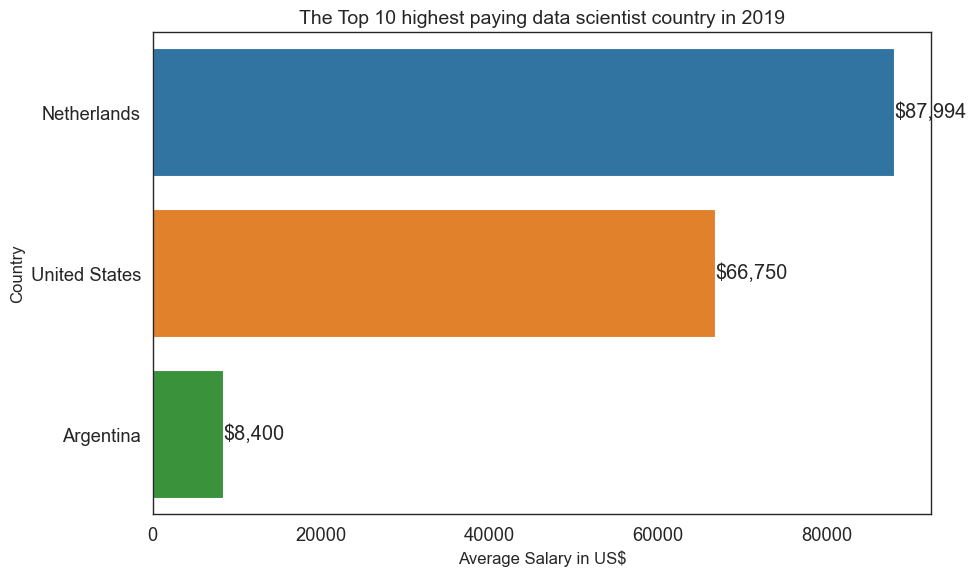

In [3801]:
fig, ax = plt.subplots(figsize = (10, 6))
ax=sns.barplot(x="Mean",  y="Country", data=Top_mean_salary )
ax.set_ylabel('Country', fontsize = 12)
ax.set_xlabel('Average Salary in US$', fontsize = 12)
plt.title('The Top 10 highest paying data scientist country in 2019', fontsize = 14)

for y, x in enumerate(Top_mean_salary['Mean']):
    label = "${:,}".format(int(x))
    plt.annotate(label, xy=(x, y), va='center')

plt.tight_layout()  
plt.show()

**Analysis**<br>


In 2019, the top three countries which have a highest mean annual salary of a data scientist are Ireland (275,851), Luxembourg (272,769), and the USA (265,211). Apart from that, the mean salary of the rest of the countries is less than (200,000) per year. Japan provides the highest mean annual salary among Asian countries (118,969)<br>
*Figures in Dollars* **$**

In [3802]:
mydf2018 = pd.read_csv(r"C:\\Users\\ASUS PC\\Downloads\\survey_results_public_2018.csv")


## Most Popular IDE's in 2018

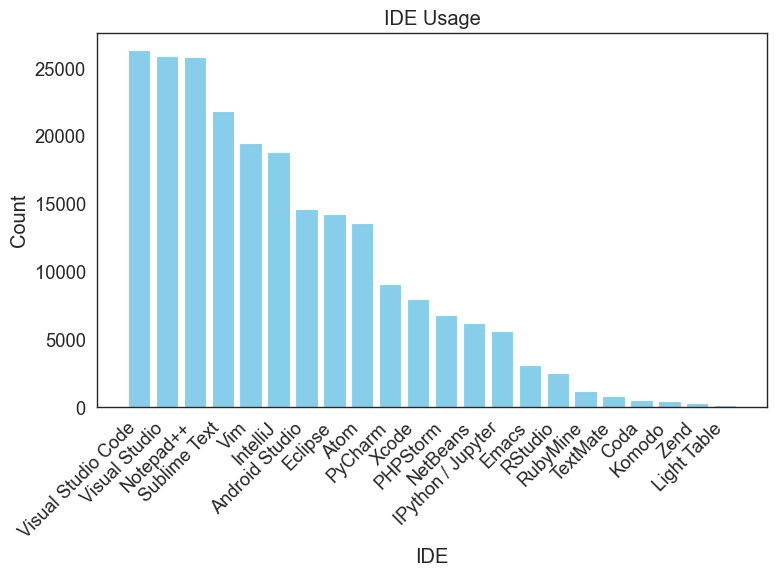

In [3803]:
# Split IDEs and explode into separate rows
individual_ides = mydf2018['IDE'].str.split(';').explode()

# Count occurrences of each IDE and sort by value
ide_counts_value_sorted = individual_ides.value_counts().sort_values(ascending=False)

# Plotting - Sorted by value
plt.figure(figsize=(8, 6))
plt.bar(ide_counts_value_sorted.index, ide_counts_value_sorted.values, color='skyblue')
plt.title('IDE Usage')
plt.xlabel('IDE')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Analysis of IDE Usage

1. **Popular IDEs**: Visual Studio Code, Visual Studio, and Notepad++ are among the most widely used IDEs, with high user counts ranging from 25,870 to 26,280.

2. **Text Editors**: Sublime Text, Vim, and IntelliJ are also popular choices, with user counts ranging from 19,477 to 21,810.

3. **General-purpose Editors**: TextMate, Coda, and Light Table are also used, although they have lower user counts compared to other IDEs.

4. **Emerging Trends**: IPython / Jupyter, Atom, and Emacs show significant adoption, indicating a growing interest in interactive computing environments, lightweight editors, and customizable text editors, respectively.

5. **Industry Standard**: Xcode, primarily used for macOS and iOS development, maintains a substantial user base due to its integration with Apple's development ecosystem.



## Coders perception about AI in 2018

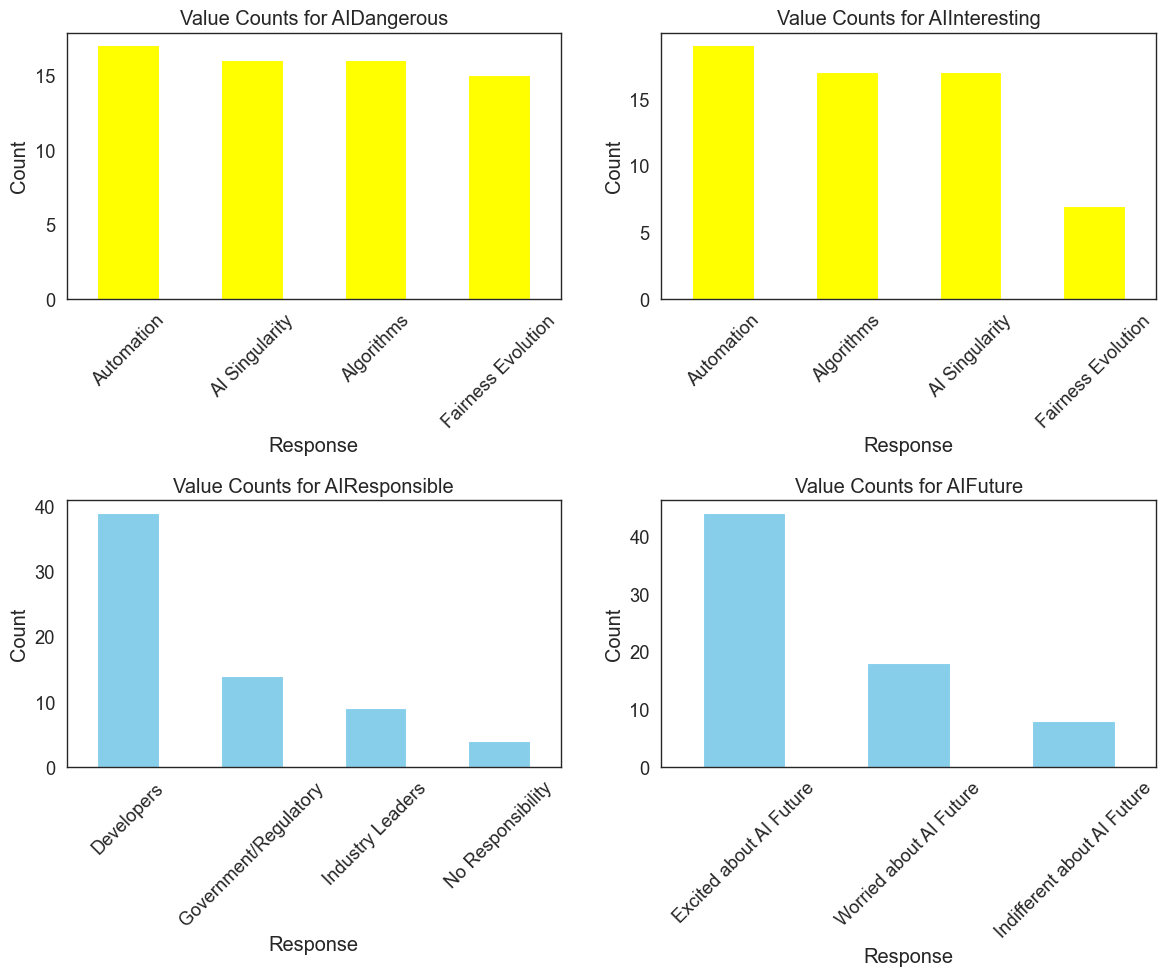

In [3804]:
import random
# Assuming df2018 is your DataFrame
df = df2018[['AIDangerous','AIInteresting','AIResponsible','AIFuture']]

# Strip leading and trailing whitespace from all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Mapping for shorter versions
short_mapping = {
    'Algorithms making important decisions': 'Algorithms',
    'Artificial intelligence surpassing human intelligence ("the singularity")': 'AI Singularity',
    'Evolving definitions of "fairness" in algorithmic versus human decisions': 'Fairness Evolution',
    "Increasing automation of jobs": 'Automation',
    "The developers or the people creating the AI": 'Developers',
    "A governmental or other regulatory body": 'Government/Regulatory',
    "Prominent industry leaders": 'Industry Leaders',
    "Nobody": 'No Responsibility',
    "I'm excited about the possibilities more than worried about the dangers.": 'Excited about AI Future',
    "I'm worried about the dangers more than I'm excited about the possibilities.": 'Worried about AI Future',
    "I don't care about it, or I haven't thought about it.": 'Indifferent about AI Future'
}

# Replace responses with shorter versions
df.replace(short_mapping, inplace=True)

# Function to create value count plots for each column
def plot_value_counts(column_name, ax):
    colors = ['skyblue','yellow']
    df[column_name].value_counts().plot(kind='bar', color=random.choice(colors), ax=ax)
    ax.set_title(f'Value Counts for {column_name}')
    ax.set_xlabel('Response')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot value counts for each column
for i, column in enumerate(df.columns):
    plot_value_counts(column, axes[i//2, i%2])

plt.tight_layout()
plt.show()


## Analysis

### AIDangerous:
- The most commonly cited concern is "Algorithms making important decisions," followed closely by "Artificial intelligence surpassing human intelligence" and "Evolving definitions of fairness."
- "Increasing automation of jobs" is also a significant concern but appears to be less frequently mentioned compared to the other categories.

### AIInteresting:
- The most interesting aspect for respondents seems to be "Increasing automation of jobs," followed by "Algorithms making important decisions" and "Artificial intelligence surpassing human intelligence."
- "Evolving definitions of fairness" appears to be less intriguing to respondents compared to other categories.

### AIResponsible:
- The majority of respondents believe that responsibility lies with "The developers or the people creating the AI."
- Fewer respondents attribute responsibility to "A governmental or other regulatory body," "Prominent industry leaders," or "Nobody."

### AIFuture:
- A significant proportion of respondents express excitement about the future of AI, indicating that they are "Excited about the possibilities more than worried about the dangers."
- However, there is also a notable percentage of respondents who are "Worried about the dangers more than excited about the possibilities."
- A smaller portion of respondents either "Don't care about it" or "Haven't thought about it."

Overall, these results suggest a complex and varied perspective on AI technology. While many see great potential in AI, there are also concerns about its implications, particularly regarding decision-making, automation of jobs, and the ethical considerations surrounding its development and regulation.


##  Predicting the growth of languages for upcoming years based on the survey answers (2018, 2019, 2020)

In [3807]:
print(df.columns)
print(survey_df_2019.columns)
print(df2020.columns)

Index(['AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture'], dtype='object')
Index(['Age', 'JobSatisfaction', 'SalaryUSD', 'Country', 'Dependents',
       'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'Hobbyist',
       'CompetenceLevel', 'CurrentJobSatis', 'JobStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith', 'Profession',
       'UndergradMajor', 'YearsCodePro', 'DevType'],
      dtype='object')
Index(['Age', 'Gender', 'SalaryUSD', 'Country', 'DevType', 'Hobbyist',
       'EdLevel', 'Employment', 'Ethnicity', 'CurrentJobSatis', 'JobStatus',
       'LanguageDesireNextYear', 'LanguageWorkedWith', 'Profession',
       'UndergradMajor', 'YearsCodePro', 'JobSeek'],
      dtype='object')


In [3806]:
df_18 = df['LanguageWorkedWith']
df_19 = survey_df_2019['LanguageWorkedWith']
df_20 = df2020['LanguageWorkedWith']

KeyError: 'LanguageWorkedWith'

In [ ]:

#splitting 'LanguageWorkedWith' on ';' 
language_2018= df_18['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2018')
language_2018['Language'] = language_2018.index
language_2018.reset_index(drop=True, inplace=True)
#language_2020.sort_values(by=['Count'], ascending=False, inplace=True)
language_2018 = language_2018[['Language', '2018']]
#language_2018

In [ ]:

#splitting 'LanguageWorkedWith' on ';' 
language_2019= df_19['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2019')
language_2019['Language'] = language_2019.index
language_2019.reset_index(drop=True, inplace=True)
#language_2020.sort_values(by=['Count'], ascending=False, inplace=True)
language_2019 = language_2019[['Language', '2019']]
#language_2019

In [ ]:
#splitting 'LanguageWorkedWith' on ';' 
language_2020= df_20['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts().to_frame('2020')
language_2020['Language'] = language_2020.index
language_2020.reset_index(drop=True, inplace=True)
#language_2020.sort_values(by=['Count'], ascending=False, inplace=True)
language_2020 = language_2020[['Language', '2020']]
#language_2020

In [ ]:
compare_df = pd.merge(language_2018, language_2019,on = ['Language'], how = 'outer')
language_all = pd.merge(compare_df, language_2020,on = ['Language'], how = 'outer')
language_all.fillna(0, inplace=True)
language_all['2018'] = language_all['2018']. astype(int)
language_all['2019'] = language_all['2019']. astype(int)
language_all['2020'] = language_all['2020']. astype(int)
language_all.set_index('Language', inplace=True)
#language_all

In [ ]:
(language_all/language_all.sum()).plot(kind='bar', figsize=(12,8))
plt.title('Programming Language Use by Respondents', fontsize = 14)
plt.xlabel('Languages', fontsize = 12)
plt.ylabel('Percentages', fontsize = 12)
plt.tight_layout()

###  **Analysing the growth of languages from 2018 to 2020 before predicting part**

The most language the developers use between 2018 to 2020 is JavaScript(14%). The second and third highest working language is HTML/CSS(13%) and SQL(11%). JavaScript and SQL had the same steady increasing trend over the three years. The percentage of HTML/CSS was slightly increased from 2018 to 2019. However, it dropped to the same level as 2018 in 2020. Python was responsible for about 9% in 2018. After then, it decreased to 8% in 2019 and it rose 1% in 2020.

There are some languages that were in only 2019; Elixir, Clojure, F#, Web assembly, and Erlang. Perl, Haskell, Julia was in the 2019 and 2020 surveys with small percentages.

In [ ]:
#Preparing data for ML
df_language_2018 = language_2018[['Language', '2018']]
df_language_2018 = df_language_2018.rename(columns={'2018': 'Number'})
df_language_2018['Year'] = '2018'
df_language_2018['Year_Total'] = df_language_2018['Number'].sum()
df_language_2018['Fraction'] = df_language_2018['Number']/df_language_2018['Number'].sum()
df_language_2018 = df_language_2018[['Year', 'Language', 'Number', 'Year_Total', 'Fraction']]
df_language_2018.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_language_2018
df_language_2019 = language_2019[['Language', '2019']]
df_language_2019 = df_language_2019.rename(columns={'2019': 'Number'})
df_language_2019['Year'] = '2019'
df_language_2019['Year_Total'] = df_language_2019['Number'].sum()
df_language_2019['Fraction'] = df_language_2019['Number']/df_language_2019['Number'].sum()
df_language_2019 = df_language_2019[['Year', 'Language', 'Number', 'Year_Total', 'Fraction']]
df_language_2019.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_language_2019
df_language_2020 = language_2020[['Language', '2020']]
df_language_2020 = df_language_2020.rename(columns={'2020': 'Number'})
df_language_2020['Year'] = '2020'
df_language_2020['Year_Total'] = df_language_2020['Number'].sum()
df_language_2020['Fraction'] = df_language_2020['Number']/df_language_2020['Number'].sum()
df_language_2020 = df_language_2020[['Year', 'Language', 'Number', 'Year_Total', 'Fraction']]
df_language_2020.sort_values(by=['Fraction'], ascending=False, inplace=True)
#df_language_2020

#Append Dataset 2018 x 2019 x 2020
df_language = pd.concat([df_language_2018[:10], df_language_2019[:10], df_language_2020[:10]] , axis=0)
#resetting the index values
df_language = df_language.reset_index(drop=True)
#df_language

In [ ]:
cols = ['Language', 'Fraction']
df_language_2018_ = df_language_2018[cols][:10]
#df_language_2018_
cols = ['Language', 'Fraction']
df_language_2019_ = df_language_2019[cols][:10]
#df_language_2019_
cols = ['Language', 'Fraction']
df_language_2020_ = df_language_2020[cols][:10]
#df_language_2020_

In [ ]:
df_language_2018_.set_index('Language', inplace = True)
df_language_2018_t = df_language_2018_.T
df_language_2018_t['Year'] = '2018'
df_language_2018_t.Year = pd.to_datetime(df_language_2018_t.Year)
df_language_2018_t = df_language_2018_t[['Year','JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'TypeScript', 'C++']]
#df_language_2018_t
df_language_2019_.set_index('Language', inplace = True)
df_language_2019_t = df_language_2019_.T
df_language_2019_t['Year'] = '2019'
df_language_2019_t.Year = pd.to_datetime(df_language_2019_t.Year)
df_language_2019_t = df_language_2019_t[['Year','JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'TypeScript', 'C++']]
#df_language_2019_t
df_language_2020_.set_index('Language', inplace = True)
df_language_2020_t = df_language_2020_.T
df_language_2020_t['Year'] = '2020'
df_language_2020_t.Year = pd.to_datetime(df_language_2020_t.Year)
df_language_2020_t = df_language_2020_t[['Year','JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'TypeScript', 'C++']]
#df_language_2020_t

#Append Dataset 2018 x 2019 x 2020
all_language = pd.concat([df_language_2018_t, df_language_2019_t, df_language_2020_t] , axis=0)
#resetting the index values
all_language = all_language.reset_index(drop=True)
all_language.set_index('Year', inplace = True)
all_language

In [ ]:
all_language.columns

In [ ]:
ax = all_language.plot(grid=True, lw=0.5, figsize=(14,6), marker='o')

#Show the legend outside of the plot.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.title('Fraction of total queries in the year for top programming languages', fontsize = 14)
plt.xlabel('Languages', fontsize = 12)
plt.ylabel('Fraction of total queries in the year (%)', fontsize = 12)

We are trying to answer the question "Predicting the growth of languages for upcoming years based on the survey answers (2018, 2019, 2020)."

Since we have only 3 years of datasets, there is not enough data to use the time series forecasting method to predict the future popularity of programming languages. With the very small number of observations, there is insufficient data to split the observations into training and testing. We need more observations to build the predictive model, this question we leave for further exploration in future projects.

## Can we predict the salary of Data Scientists?

In [ ]:
#Rename columns
cleaned_2018.rename(columns={'JobSatisfaction': 'CurrentJobSatis', 'JobSearchStatus': 'JobStatus', 'YearsCodingProf':'YearsCodePro'}, inplace =True)

In [ ]:
sal_df = ['Age', 'Country', 'EdLevel', 'DevType', 'YearsCodePro', 'SalaryUSD']
df1 = cleaned_2018
df2 = survey_df_2019
df3 = df2020

In [ ]:
#Append Dataset 2018 x 2019 x 2020
df_sal = pd.concat([df1[sal_df], df2[sal_df], df3[sal_df]], axis=0)
#resetting the index values
df_sal = df_sal.reset_index(drop=True)
df_sal.shape

(166, 6)

In [ ]:
#creating data scientist scientist df
all_ds = df_sal[df_sal['DevType'].str.contains('Data scientist') == True ]
all_ds = all_ds.reset_index(drop=True)
len(all_ds)

7

In [ ]:
all_ds['DevType'] = 'Data scientist'
all_ds

,Age,Country,EdLevel,DevType,YearsCodePro,SalaryUSD
0,28.0,Canada,Bachelors,Data scientist,3.0,366420.0
1,25.0,Argentina,Bachelors,Data scientist,3.0,8400.0
2,19.0,Netherlands,Associate,Data scientist,1.0,87994.0
3,25.0,United States,Bachelors,Data scientist,6.0,66750.0
4,34,United Kingdom,No Degree,Data scientist,3.0,77556.0
5,53,United Kingdom,Doctorate,Data scientist,28.0,74970.0
6,25,United States,Bachelors,Data scientist,8.59,79000.0


In [3808]:
#Divide SalaryUSD into 2 groups; SalaryUSD >= median and SalaryUSD < median 
all_ds['greater than median'] = all_ds['SalaryUSD'] >= all_ds['SalaryUSD'].median()
all_ds['SalaryUSD'].median() #56616.0 USD

77556.0

In [3809]:

#Encoding the target
labelencoder = preprocessing.LabelEncoder()
all_ds['gt_median'] = labelencoder.fit_transform(all_ds['greater than median'])

le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)
#{False: 0 (SalaryUSD < median), True: 1 (SalaryUSD >= median}

{False: 0, True: 1}


In [3810]:
X = all_ds.drop(['SalaryUSD', 'greater than median', 'gt_median', 'DevType'], axis = 1)
y = all_ds['gt_median']
X.shape
y

0    1
1    0
2    1
3    0
4    1
5    0
6    1
Name: gt_median, dtype: int64

In [3811]:
cats_lst = X.select_dtypes(include = ['object']).columns.tolist()
for col in cats_lst:
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
X.shape
X

,Age_25.0,Age_28.0,Age_34.0,Age_53.0,Country_Canada,Country_Netherlands,Country_United Kingdom,Country_United States,EdLevel_Bachelors,EdLevel_Doctorate,EdLevel_No Degree,YearsCodePro_3.0,YearsCodePro_6.0,YearsCodePro_8.59,YearsCodePro_28.0
0,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False
4,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False
5,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True
6,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False


In [3812]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=142)

# Model Training

In [ ]:
all_metrics = {}

def metrics_data(title, labels, predictions):
    """
    INPUT:
        title - Display title for classification algorithm
        labels - Actual values for target variable
        predictions - Predicted values for target variable
        
    OUTPUT:
        metrics - Dictionary of classification metrics for given title
    """
    metrics = {
        title: {
            "model": title,
            "accuracy": accuracy_score(labels, predictions),
            "precision": precision_score(labels, predictions),
            "recall": recall_score(labels, predictions),
            "f1-score": f1_score(labels, predictions),
            "r2":  r2_score(labels, predictions)
        }
    }
    print(metrics)
    return metrics

In [ ]:
#DecisionTreeClassifier
start = time.time()
modelDC = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 10)
modelDC.fit(X_train, y_train)
end = time.time()
TimeDC = end - start
print('Time: ', TimeDC)

#Evaluating model on test set
y_pred = modelDC.predict(X_test)
all_metrics.update(metrics_data("Decision Trees", y_test, y_pred))

#Evaluating model on train set
y_pred = modelDC.predict(X_train)
accuracyDC2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyDC2))

Time:  0.005160808563232422
{'Decision Trees': {'model': 'Decision Trees', 'accuracy': 0.3333333333333333, 'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'r2': -1.9999999999999996}}
Accuracy on train set: 0.5


In [ ]:
#MultinomialNB
start = time.time()
modelNB = MultinomialNB(alpha=0.005)
modelNB.fit(X_train, y_train)
end = time.time()
TimeNB = end - start

#Evaluating model on test set
y_pred = modelNB.predict(X_test)
all_metrics.update(metrics_data("Multinomial Naive Bayes", y_test, y_pred))

#Evaluating model on train set
y_pred = modelNB.predict(X_train)
accuracyNB2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyNB2))

{'Multinomial Naive Bayes': {'model': 'Multinomial Naive Bayes', 'accuracy': 0.3333333333333333, 'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'r2': -1.9999999999999996}}
Accuracy on train set: 1.0


In [ ]:
#GaussianNB
start = time.time()
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
end = time.time()
TimeGNB = end - start
print('Time: ', TimeGNB)

#Evaluating model on test set
y_pred = modelGNB.predict(X_test)
all_metrics.update(metrics_data("Gaussian Naive Bayes", y_test, y_pred))

#Evaluating model on train set
y_pred = modelGNB.predict(X_train)
accuracyGNB2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyGNB2))

Time:  0.008631229400634766
{'Gaussian Naive Bayes': {'model': 'Gaussian Naive Bayes', 'accuracy': 0.42857142857142855, 'precision': 0.6, 'recall': 0.3333333333333333, 'f1-score': 0.42857142857142855, 'r2': -1.488888888888889}}
Accuracy on train set: 0.7857142857142857


In [ ]:
#Logistic Regression
start = time.time()
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
end = time.time()
TimeLR = end - start
print('Time: ', TimeLR)

#Evaluating model on test set
y_pred = modelLR.predict(X_test)
all_metrics.update(metrics_data("Logistic Regression", y_test, y_pred))

#Evaluating model on train set
y_pred = modelLR.predict(X_train)
accuracyLR2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyLR2))

Time:  0.009811878204345703
{'Logistic Regression': {'model': 'Logistic Regression', 'accuracy': 0.7142857142857143, 'precision': 0.6923076923076923, 'recall': 1.0, 'f1-score': 0.8181818181818181, 'r2': -0.24444444444444446}}
Accuracy on train set: 0.7857142857142857


In [ ]:
#RandomForestClassifier
start = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
end = time.time()
TimeRFC = end - start
print('Time: ', TimeRFC)

#Evaluating model on test set
y_pred = rfc.predict(X_test)
all_metrics.update(metrics_data("Random Forest", y_test, y_pred))

#Evaluating model on train set
y_pred = rfc.predict(X_train)
accuracyRFC2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracyRFC2))

Time:  0.23129034042358398
{'Random Forest': {'model': 'Random Forest', 'accuracy': 0.6428571428571429, 'precision': 0.6666666666666666, 'recall': 0.8888888888888888, 'f1-score': 0.761904761904762, 'r2': -0.5555555555555556}}
Accuracy on train set: 1.0


In [ ]:
#LinearSVC
start = time.time()
svc = LinearSVC()
svc.fit(X_train, y_train) 
end = time.time()
TimeSVC = end - start
print('Time: ', TimeSVC)

#Evaluating model on test set
y_pred = svc.predict(X_test)
all_metrics.update(metrics_data("LinearSVC", y_test, y_pred))

#Evaluating model on train set
y_pred = svc.predict(X_train)
accuracySVC2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracySVC2))

Time:  0.0054416656494140625
{'LinearSVC': {'model': 'LinearSVC', 'accuracy': 0.5714285714285714, 'precision': 0.6363636363636364, 'recall': 0.7777777777777778, 'f1-score': 0.7000000000000001, 'r2': -0.8666666666666667}}
Accuracy on train set: 0.8928571428571429


In [ ]:
#Gradient Boosting Classifier
start = time.time()

grb= GradientBoostingClassifier()
grb.fit(X_train,y_train)
end = time.time()
Timegrb = end - start
print('Time: ', Timegrb)

#Evaluating model on test set
y_pred = grb.predict(X_test)
all_metrics.update(metrics_data("Gradient Boosting Classifier", y_test, y_pred))


#Evaluating model on train set
y_pred = grb.predict(X_train)
accuracygrb2 = accuracy_score(y_train, y_pred)
print('Accuracy on train set: {}'.format(accuracygrb2))


Time:  0.1327650547027588
{'Gradient Boosting Classifier': {'model': 'Gradient Boosting Classifier', 'accuracy': 0.5714285714285714, 'precision': 0.6363636363636364, 'recall': 0.7777777777777778, 'f1-score': 0.7000000000000001, 'r2': -0.8666666666666667}}
Accuracy on train set: 1.0


# Model performance comparison

In [ ]:
all_metrics = pd.DataFrame(all_metrics).T
all_metrics = all_metrics.reset_index(drop=True)
all_metrics

,model,accuracy,precision,recall,f1-score,r2
0,Decision Trees,0.642857,0.642857,1.0,0.782609,-0.555556
1,Multinomial Naive Bayes,0.571429,0.666667,0.666667,0.666667,-0.866667
2,Gaussian Naive Bayes,0.428571,0.6,0.333333,0.428571,-1.488889
3,Logistic Regression,0.714286,0.692308,1.0,0.818182,-0.244444
4,Random Forest,0.642857,0.666667,0.888889,0.761905,-0.555556
5,LinearSVC,0.571429,0.636364,0.777778,0.7,-0.866667
6,Gradient Boosting Classifier,0.571429,0.636364,0.777778,0.7,-0.866667


In [ ]:
#Creating new df to store model performances
Model = ['Decision Trees', 'Multinomial Naive Bayes', 'Gaussian Naive Bayes', 'Logistic Regression', 'Random Forest', 'LinearSVC','Gradient Boosting Classifier']
Accuracy_train = [accuracyDC2, accuracyNB2, accuracyGNB2, accuracyLR2, accuracyRFC2, accuracySVC2,accuracygrb2]
Time = [TimeDC, TimeNB, TimeGNB, TimeLR, TimeRFC, TimeSVC,Timegrb]

#Create df from lists
cols = ['Model', 'Accuracy_train', 'Time']
data = list(zip(Model, Accuracy_train, Time))

performance = pd.DataFrame(data, columns=cols)
performance

,Model,Accuracy_train,Time
0,Decision Trees,0.678571,0.003900
1,Multinomial Naive Bayes,0.821429,0.010132
2,Gaussian Naive Bayes,0.785714,0.008631
3,Logistic Regression,0.785714,0.009812
4,Random Forest,1.000000,0.231290
5,LinearSVC,0.892857,0.005442
6,Gradient Boosting Classifier,1.000000,0.132765


In [ ]:
#Join result2018 with weather2018 to get the Maximum temperature (Degree C)
all_performance = pd.merge(left = all_metrics , right = performance ,
                 left_on = ['model'], right_on = ['Model'], how = 'left')
drop_cols = ['Model']
all_performance.drop(drop_cols, axis=1, inplace=True)

all_performance

,model,accuracy,precision,recall,f1-score,r2,Accuracy_train,Time
0,Decision Trees,0.642857,0.642857,1.0,0.782609,-0.555556,0.678571,0.003900
1,Multinomial Naive Bayes,0.571429,0.666667,0.666667,0.666667,-0.866667,0.821429,0.010132
2,Gaussian Naive Bayes,0.428571,0.6,0.333333,0.428571,-1.488889,0.785714,0.008631
3,Logistic Regression,0.714286,0.692308,1.0,0.818182,-0.244444,0.785714,0.009812
4,Random Forest,0.642857,0.666667,0.888889,0.761905,-0.555556,1.000000,0.231290
5,LinearSVC,0.571429,0.636364,0.777778,0.7,-0.866667,0.892857,0.005442
6,Gradient Boosting Classifier,0.571429,0.636364,0.777778,0.7,-0.866667,1.000000,0.132765


Unfortunately, none of the models has good enough r2 values. The best model is Logistic Regression with $R^2$ just approximately 0.4. We cannot confidently say that Logistic Regression is a good fit to predict the salary of Data Scientists.But at the same time even after applying a boosting algorithm like Gradient Boosting Classifier logistic regression and Random Forest still gets a lead in case of model accuracy.

**This questionS we leave for further exploration in future projects.**

## Hamming Loss (HL) and Jacard Score On Models

- Hamming loss is the fraction of labels that are incorrectly predicted ( evaluation metrics for a classifier model.) 
- The Jaccard Index, also known as the Jaccard similarity coefficient, is a statistic used in understanding the similarities between sample sets. (To measure Similarity)

In [ ]:
def avg_jacard(y_true,y_pred):

    jacard = np.minimum(y_true,y_pred).sum(axis=0) / np.maximum(y_true,y_pred).sum(axis=0)
    
    return jacard.mean()

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)))
    print("---")    

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 0.6666666666666666
Hamming loss: 0.2857142857142857
---


In [ ]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 0.5384615384615384
Hamming loss: 0.42857142857142855
---


In [ ]:
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
grb= GradientBoostingClassifier()



for classifier in [sgd, lr, mn, svc,grb,]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  SGDClassifier
Jacard score: 0.6153846153846154
Hamming loss: 0.35714285714285715
---
Clf:  LogisticRegression
Jacard score: 0.6923076923076923
Hamming loss: 0.2857142857142857
---
Clf:  MultinomialNB
Jacard score: 0.6923076923076923
Hamming loss: 0.2857142857142857
---
Clf:  LinearSVC
Jacard score: 0.5384615384615384
Hamming loss: 0.42857142857142855
---
Clf:  GradientBoostingClassifier
Jacard score: 0.5384615384615384
Hamming loss: 0.42857142857142855
---


Findings: It has been found that better Hamming loss has been found in Logistic Regression and MultinomialNB **which is 0.28571**<br>
Jaccard similarity scores give us the distribution of label sets when using the models.

## Predicting what causing Job satisfaction

An examination of work satisfaction variables based on Stack Over Flow survey data from 2020. Job satisfaction can be defined by factors such as compensation, benefits, work environment, team members, work-life balance, education level, place, and so on. By analyzing the Stack Over Flow survey data from 2020, I will try to find some features that are negatively and positively affecting job satisfaction in various countries.

In [3860]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        19
Slightly satisfied                     9
Slightly dissatisfied                  8
Very dissatisfied                      6
Neither satisfied nor dissatisfied     3
Name: count, dtype: int64

In [3861]:
participation_rate = df2020['CurrentJobSatis'].value_counts().keys().tolist()
print(participation_rate)
count = df2020['CurrentJobSatis'].value_counts().tolist()
print(count)

['Very satisfied', 'Slightly satisfied', 'Slightly dissatisfied', 'Very dissatisfied', 'Neither satisfied nor dissatisfied']
[19, 9, 8, 6, 3]


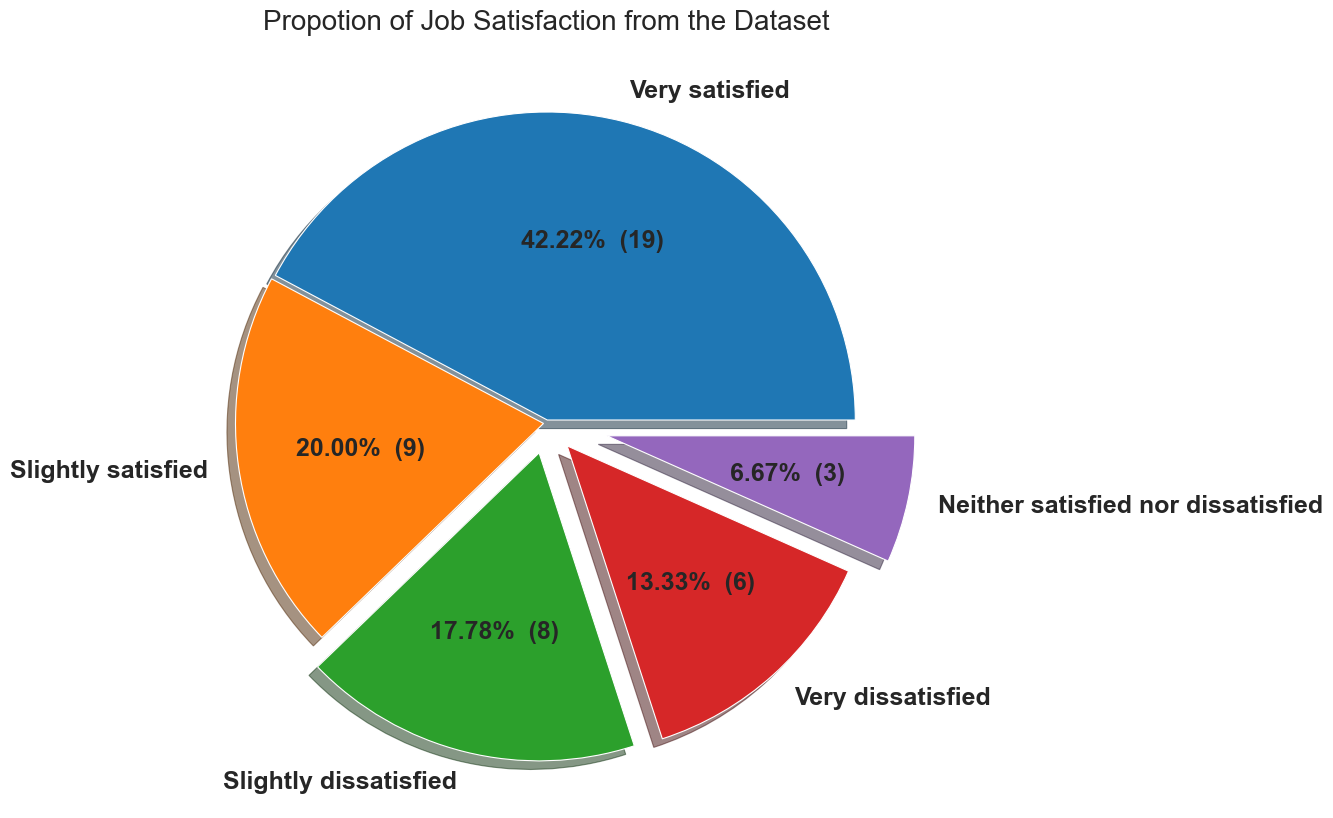

In [3862]:
plt.pie(count, explode = (0.01,0.01,0.1,0.1,0.2), labels = participation_rate, shadow=True, autopct=lambda p : f'{p:.2f}%  ({p * sum(count)/100:,.0f})', textprops={'fontsize':18, 'weight':'bold'})
plt.title("Propotion of Job Satisfaction from the Dataset",fontsize = 20)
plt.show()

In [3880]:
# Applying one hot encoding
df_indicator = df.isnull().astype(int).add_suffix('_nan')
df = pd.concat([df, df_indicator], axis=1)

In [3881]:
numericals = ["Age","SalaryUSD","YearsCodePro"]
categoricals = ["Country","EdLevel","Employment","Hobbyist","UndergradMajor"]

In [3882]:
pd.set_option('display.max_columns', None)

In [3883]:
df2020['CurrentJobSatis'].value_counts()

CurrentJobSatis
Very satisfied                        19
Slightly satisfied                     9
Slightly dissatisfied                  8
Very dissatisfied                      6
Neither satisfied nor dissatisfied     3
Name: count, dtype: int64

**Performing further Spliting of CurrentJobSatis Coloumn**
- Delete "Neither satisfied nor dissatisfied"
- Combine "Very satisfied" and "Slightly satisfied", label as "Satisfied" -->1
- Combine "Very dissatisfied" and "Slightly dissatisfied", label as "Dissatisfied"-->0
- Delete rows "Neither satisfied nor dissatisfied"

In [3884]:

df = df2020.drop(df2020[df2020.CurrentJobSatis == "Neither satisfied nor dissatisfied"].index)

df.CurrentJobSatis = [1 if each == "Very satisfied" else 
             1 if each == "Slightly satisfied" else 
             0 if each == "Very dissatisfied"else 
             0 if each == "Slightly dissatisfied" else
             each for each in df.CurrentJobSatis]

In [3885]:
# Dropping nan in Converted Salary if any
df = df.dropna()

In [3886]:
cols= ["Age","SalaryUSD","YearsCodePro", "Country","EdLevel","Employment","Hobbyist","UndergradMajor", "CurrentJobSatis"]
df = df[cols]
df.head(5)

,Age,SalaryUSD,YearsCodePro,Country,EdLevel,Employment,Hobbyist,UndergradMajor,CurrentJobSatis
0,36,116000.0,13.0,United States,Bachelors,Full-time,Yes,Computer Science,0
1,22,32315.0,4.0,United Kingdom,Bachelors,Full-time,Yes,Math/Stat,1
2,23,40070.0,2.0,United Kingdom,Bachelors,Full-time,Yes,Computer Science,0
3,49,14268.0,7.0,Spain,No Degree,Full-time,No,Math/Stat,0
4,53,38916.0,20.0,Netherlands,No Degree,Full-time,Yes,No major,1


In [3887]:
# one hot encoding
df = pd.get_dummies(df,  columns = categoricals )

In [3888]:
# Normalization of numerical features
for each in numericals:
    df[each] = (df[each] - df[each].min()) / (df[each].max() - df[each].min())

In [3889]:
#df.head(5)

In [3890]:
# Split data into X and y
X = df.drop("CurrentJobSatis", axis = 1)
y = df.CurrentJobSatis

In [3891]:
X

,Age,SalaryUSD,YearsCodePro,Country_Belgium,Country_Brazil,Country_Canada,Country_Czech Republic,Country_France,Country_Germany,Country_Greece,Country_Indonesia,Country_Israel,Country_Italy,Country_Netherlands,Country_Poland,Country_Spain,Country_United Kingdom,Country_United States,EdLevel_Associate,EdLevel_Bachelors,EdLevel_Doctorate,EdLevel_No Degree,EdLevel_Professional,Employment_Full-time,Employment_Not employed,Employment_Part-time,Employment_Self-employed,Employment_Student,Hobbyist_No,Hobbyist_Yes,UndergradMajor_Arts and Science,UndergradMajor_Computer Science,UndergradMajor_Engineering,UndergradMajor_Info Systems,UndergradMajor_Math/Stat,UndergradMajor_No major,UndergradMajor_Other Science,UndergradMajor_Web Design/Dev
0,0.484848,0.719681,0.444444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
1,0.060606,0.186533,0.111111,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,0.090909,0.235939,0.037037,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
3,0.878788,0.071558,0.222222,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,1.000000,0.228587,0.703704,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
5,0.212121,0.401137,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
6,0.757576,0.672383,0.814815,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False
7,0.151515,0.483958,0.074074,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
9,0.121212,0.511990,0.074074,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
10,0.757576,0.566034,0.703704,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False


In [3892]:
y

0     0
1     1
2     0
3     0
4     1
5     1
6     1
7     0
9     0
10    1
11    1
12    0
13    1
14    1
15    1
17    1
18    1
19    1
20    0
21    1
22    1
23    1
25    1
26    1
30    0
31    1
33    0
34    1
35    1
36    1
37    1
38    0
39    0
40    1
41    1
43    1
44    1
45    0
46    0
47    1
48    0
49    1
Name: CurrentJobSatis, dtype: int64

In [3893]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

**Checking Model Coefficent**

In [3894]:
from sklearn.metrics import mean_absolute_error

param_grid = {'min_samples_leaf': [10, 15, 20], 'max_depth': [20, 30, 40]}
grid = GridSearchCV(RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True),
                    param_grid=param_grid,
                    scoring='neg_mean_absolute_error',
                    cv=5,
                    return_train_score=True)

X_train_grit = X_train.sample(frac=0.5, random_state=42)
grid.fit(X_train_grit, y_train.loc[X_train_grit.index])

print("Best mean cross-validation score: {:.3f}".format(-grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

# Predict on test set
y_pred = grid.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mean_target = y_test.mean()

# Calculate accuracy
accuracy = 1 - (mae / mean_target)
accuracy_percentage = accuracy * 100
print("Test set accuracy: {:.2f}%".format(accuracy_percentage))

Best mean cross-validation score: 0.361
Best parameters: {'max_depth': 30, 'min_samples_leaf': 20}
Test set accuracy: 35.05%


**Here Random Forest is used to Predicting Job satisfaction, model did not yield much better output and turned out to be very complex to get insights.** Random forest Regressor, Logistic Regression which may yield good results.

In [3896]:
from sklearn.svm import SVC

# define the model
svm_model = SVC()
# fit the model
svm_model.fit(X_train, y_train)

# make predictions for test data and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

Accuracy: 64.29%


# Trying with Logistic Regression

Used Sklearn library to create a Logistic Regression model.

Before creating a model, need to create data, Using model coefficients, features that have negative and positive effects on job satisfaction to be calculated.

In [3904]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Make predictions for test data
y_pred = model.predict(X_test)

# Compute accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.2f" % f1)

# Compute ROC curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

Accuracy: 78.57%
Precision: 0.75
Recall: 1.00
F1 Score: 0.86


***Explanation of Metrics:***

1. **Accuracy:** Measures the overall correctness of the model's predictions, calculated as the ratio of correctly predicted instances to the total number of instances.

2. **Precision:** Also called positive predictive value, it measures the ratio of correctly predicted positive observations to the total predicted positives. It focuses on the accuracy of the positive predictions.

3. **Recall:** Also called sensitivity, it measures the ratio of correctly predicted positive observations to all actual positives. It focuses on how many actual positives the model captures through labeling them as positive.

4. **F1 Score:** The harmonic mean of precision and recall. It provides a single score that balances both precision and recall.

5. **ROC Curve (Receiver Operating Characteristic Curve):** A graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It shows the trade-off between sensitivity (recall) and specificity (true negative rate).

6. **AUC (Area Under the ROC Curve):** Represents the degree of separability, i.e., how well the model is capable of distinguishing between classes. A higher AUC indicates better model performance.

7. **Confusion Matrix:** A table that describes the performance of a classification model, showing the counts of true positives, false positives, true negatives, and false negatives. It helps visualize the performance of the algorithm.

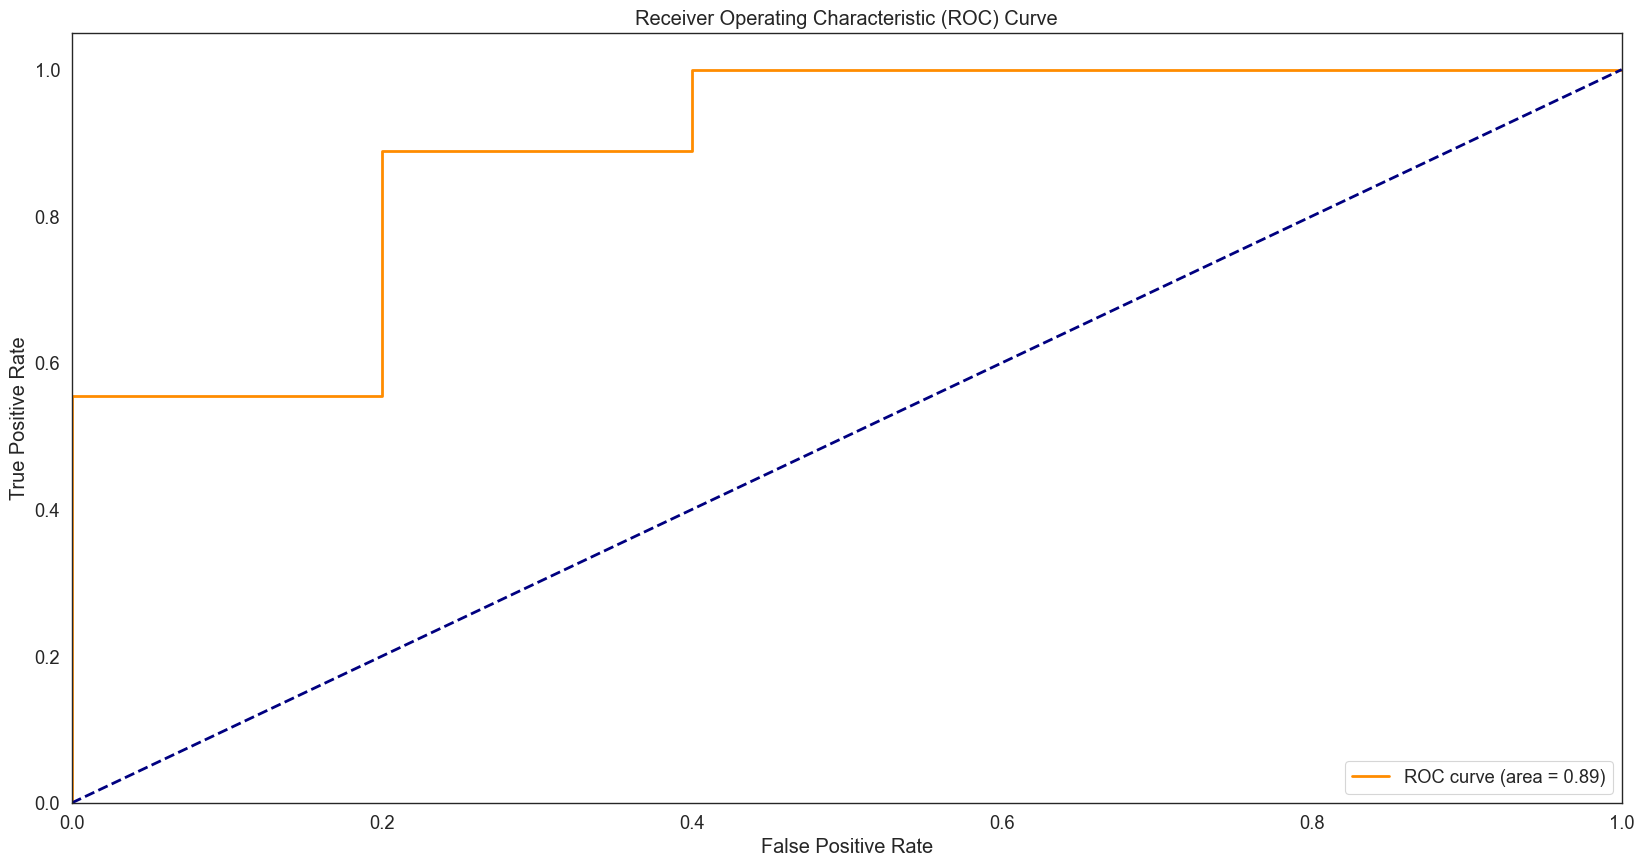

In [3905]:
#ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

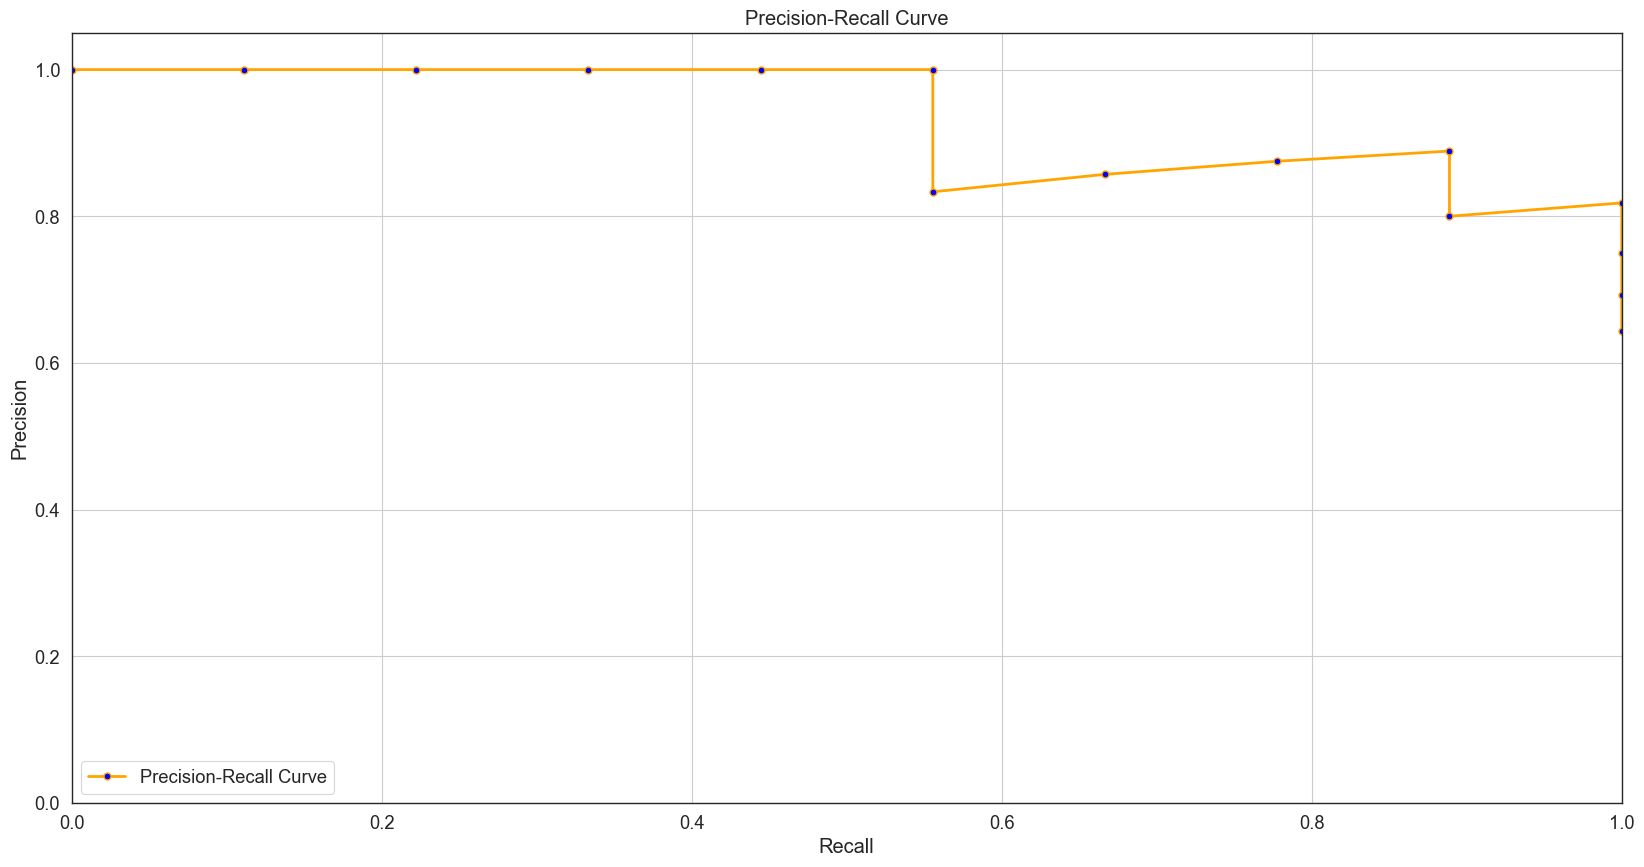

In [3906]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='orange', linestyle='-', linewidth=2, marker='o', markersize=5, markerfacecolor='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


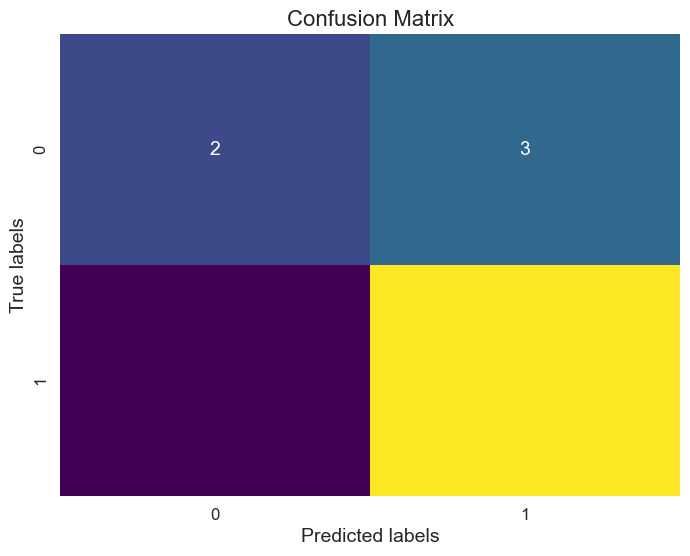

In [3907]:
# Plot confusion matrix with a different colormap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="viridis", cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

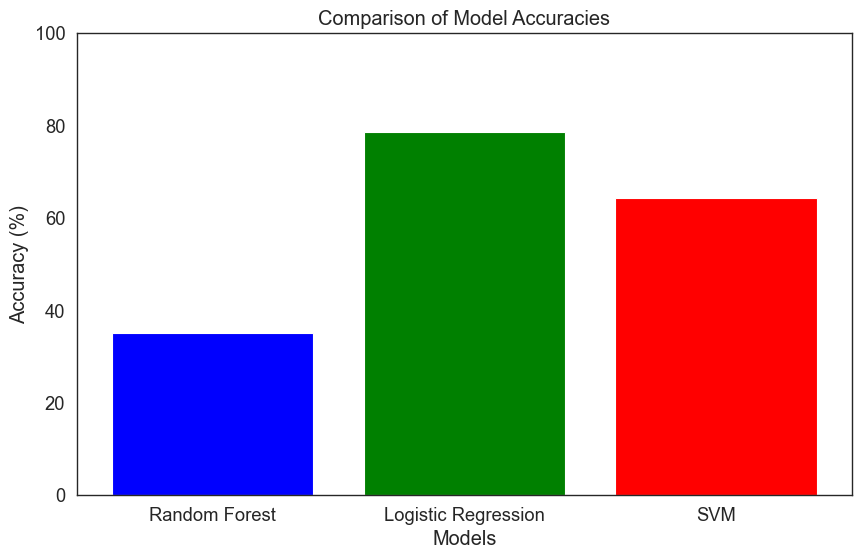

In [3897]:
import matplotlib.pyplot as plt

# Model accuracies
accuracies = [accuracy * 100.0, accuracy_logistic * 100.0, accuracy_svm * 100.0]
models = ['Random Forest', 'Logistic Regression', 'SVM']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Set y-axis limit to 100 for clarity
plt.show()

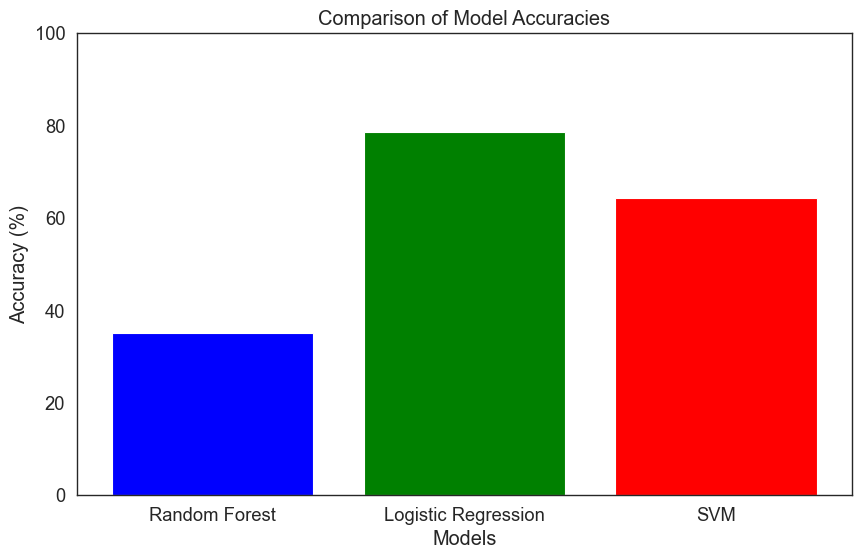

In [3897]:
import matplotlib.pyplot as plt

# Model accuracies
accuracies = [accuracy * 100.0, accuracy_logistic * 100.0, accuracy_svm * 100.0]
models = ['Random Forest', 'Logistic Regression', 'SVM']

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Set y-axis limit to 100 for clarity
plt.show()

We have recieved **78.57% Accuracy** through Logistic Regression which is good enough to move ahead with predictions.

## Plotting Features affecting Job Satisfaction

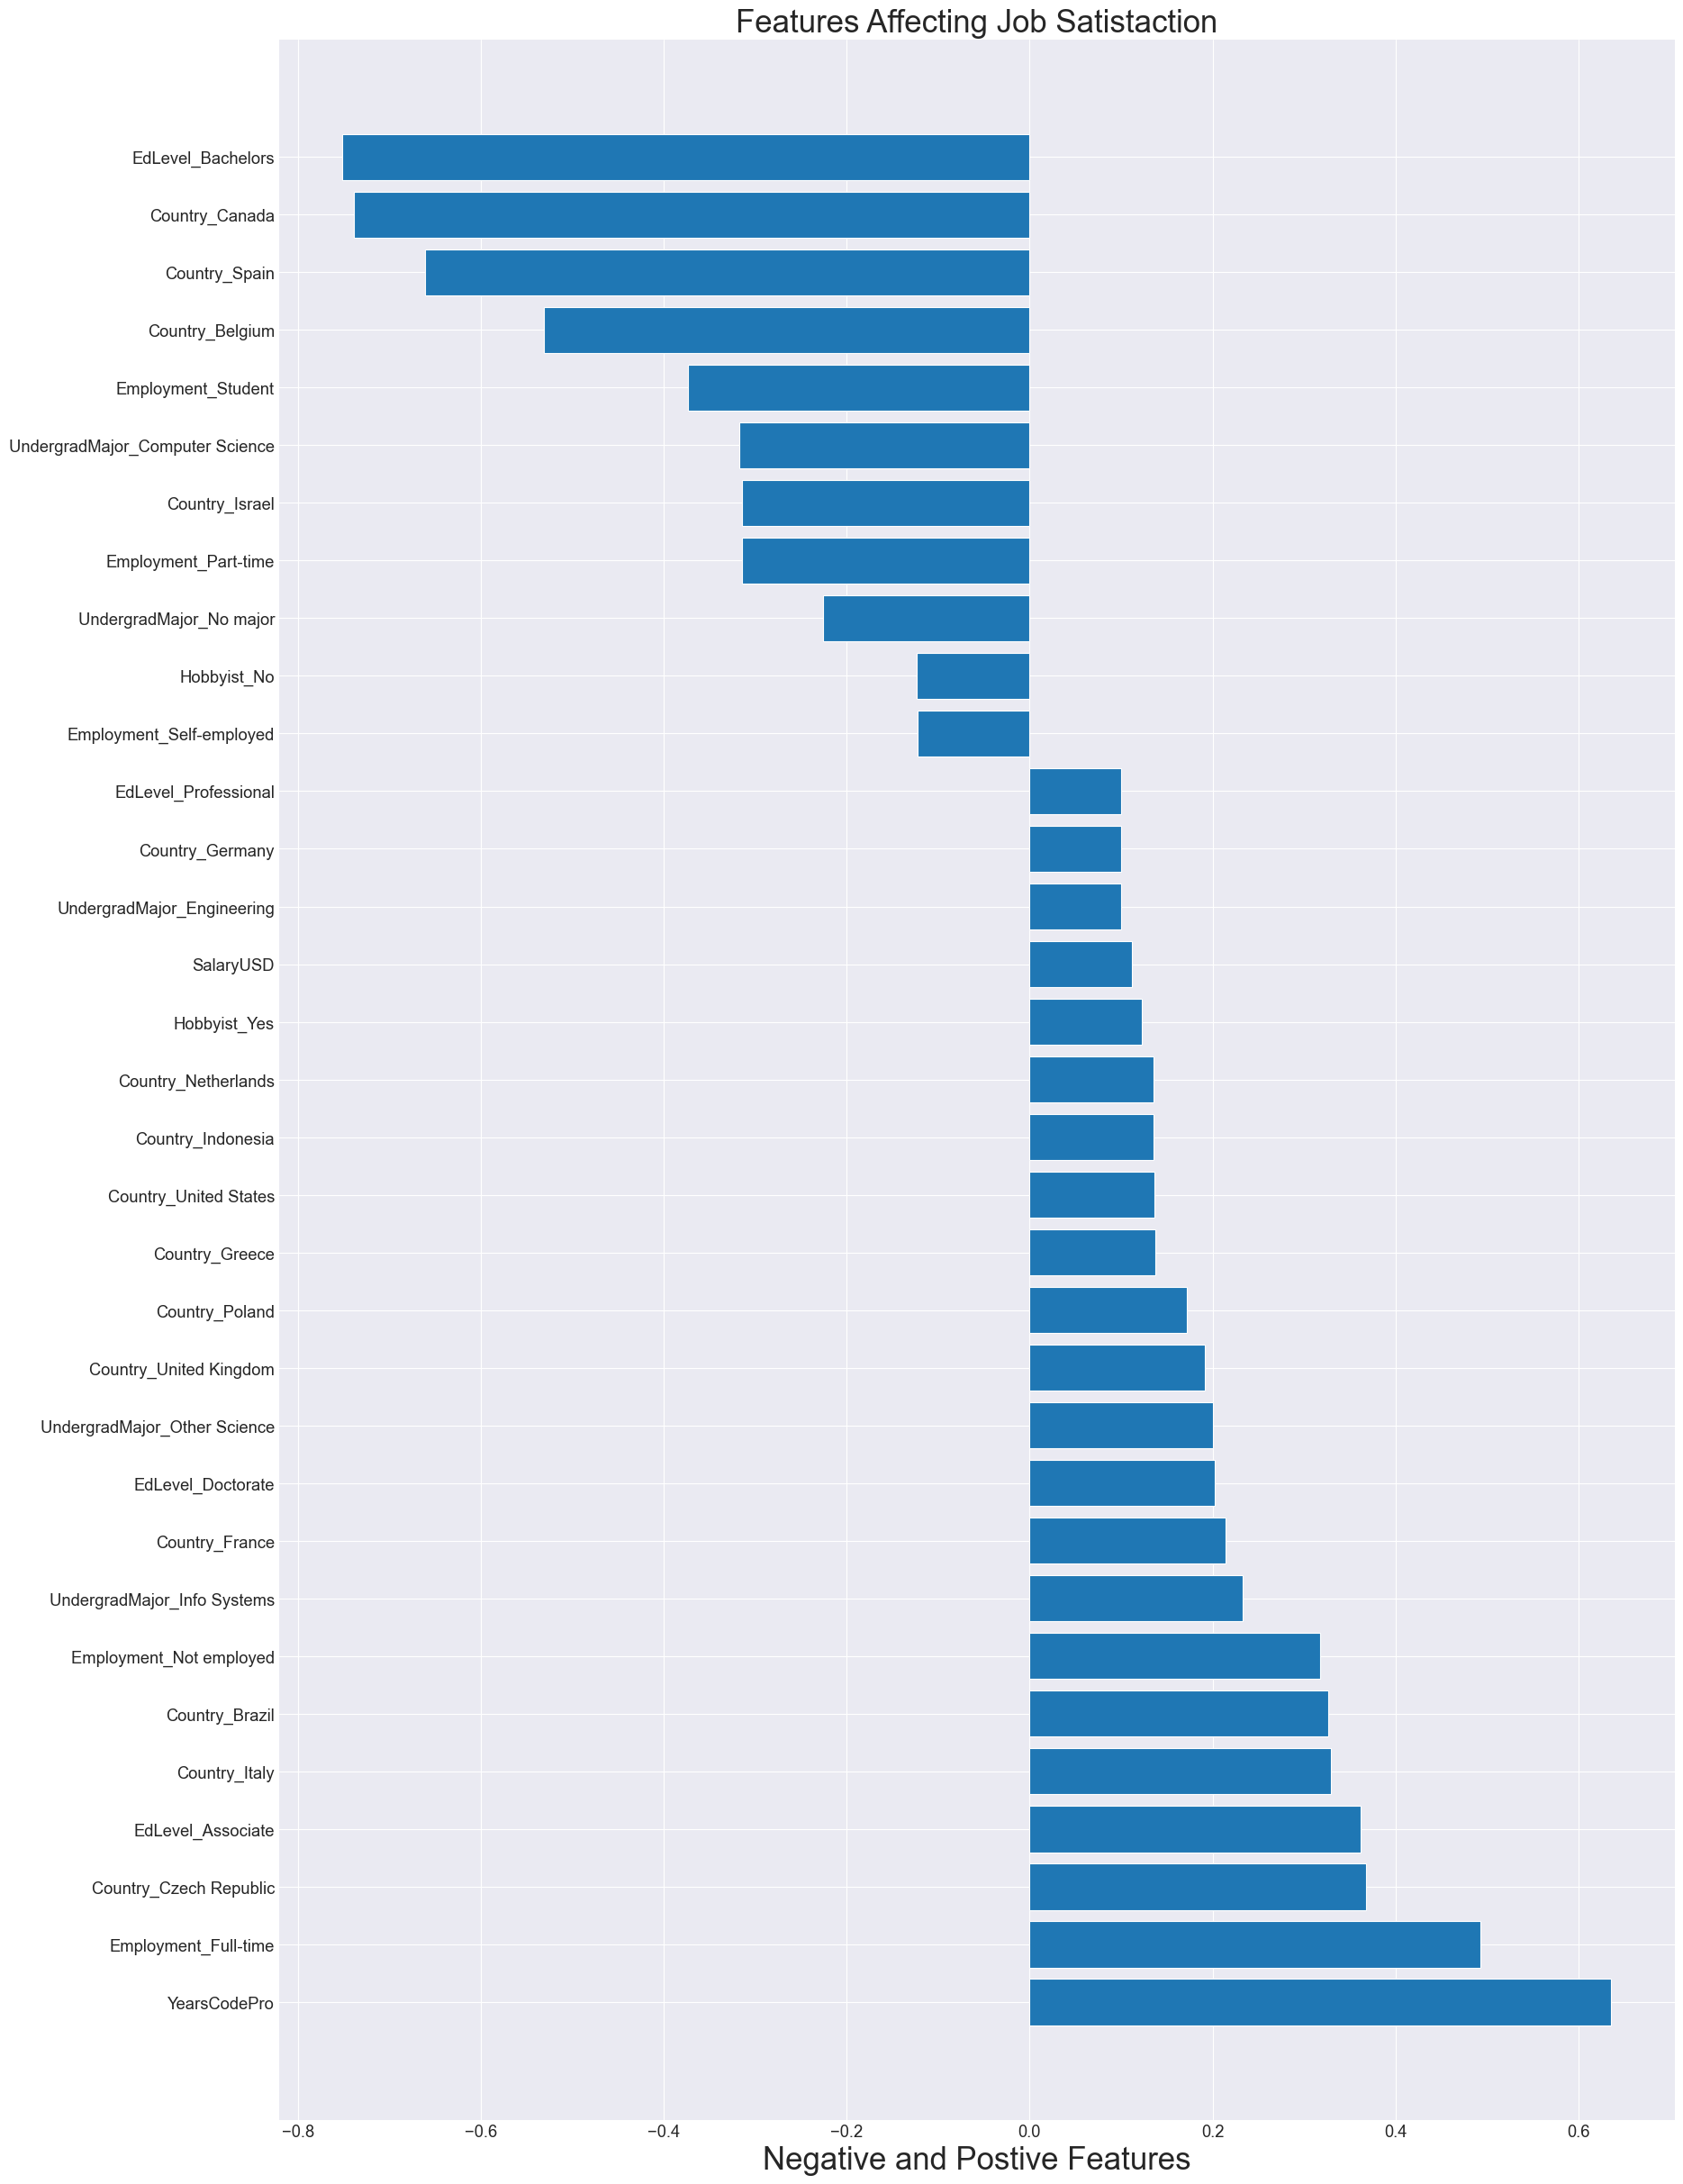

In [ ]:
results_df = pd.DataFrame()
results_df["Rates"] = importance.tolist()
results_df["Columns"] = X.columns

new_index = results_df.Rates.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results.Rates) > 0.1]

plt.figure(figsize =(20,30))
plt.barh(filtered_results.Columns, filtered_results.Rates)
plt.xlabel("Negative and Postive Features", fontsize = 25)
plt.title("Features Affecting Job Satistaction",fontsize = 25)

plt.show()

The top 2 features negatively affecting Job Satisfaction are age, country. So, in the elderly ages, job satisfaction may decrease because of the personal expectation increases. In the same way, as the professional coding years are increasing, satisfaction may decrease.

- Among the countries; most dissatisfied countries are Angolia, Rwanda, Krygyzstan, Sudan.
- UndergradMajor and other Science, are mostly satisfied.
- Most satisfied countries Malta, Ghana, Cyprus.

# Conclusion

Overall, we performed various analyses on the Stack overflow developer survey and derived insights from it. We found which country has the highest no of respondents, which is the most popular language, education level of respondents, different roles of developers, and so on.<br>
Additionally, we performed machine learning models to predict the growth of languages, the salary of data scientists, what is causing job satisfaction. 